In [13]:
import pandas as pd
import numpy as np
import os
os.chdir('Masbasis_2020')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Masbasis_2020'

In [14]:
####preparing the dataset from first time point 18.06.2020
M_180620=pd.read_excel('Masbasis_Mica_180620.xlsx')
M_180620.columns

Index(['id', '_Bluemean', '_Bluemedia', '_Bluestdev', '_Greenmean',
       '_Greenmedi', '_Greenstde', '_Redmean', '_Redmedian', '_Redstdev',
       '_RedEdgeme', '_RedEdge_1', '_RedEdgest', '_NIRmean', '_NIRmedian',
       '_NIRstdev', '_NDVImean', '_NDVImedia', '_NDVIstdev', '_MTCImean',
       '_MTCImedia', '_MTCIstdev', '_EVImean', '_EVImedian', '_EVIstdev',
       '_DVImean', '_DVImedian', '_DVIstdev', '_RVImean', '_RVImedian',
       '_RVIstdev', '_VARImean', '_VARImedia', '_VARIstdev', '_EXGmean',
       '_EXGmedian', '_EXGstdev', '_EXGRmean', '_EXGRmedia', '_EXGRstdev',
       '_GLImean', '_GLImedian', '_GLIstdev', '_GNDVImean', '_GNDVImedi',
       '_GNDVIstde'],
      dtype='object')

In [15]:
M_180620_MICA_MEAN=pd.DataFrame(M_180620, columns=['id','_Bluemean',  '_Greenmean',  '_Redmean', 
       '_RedEdgeme',  '_NIRmean','_NDVImean', '_MTCImean'])
M_180620_MICA_MEAN.rename(columns={'id':'plot','_Bluemean':'Blue',  '_Greenmean':'Green',  '_Redmean':'Red', 
       '_RedEdgeme':'RedEdge',  '_NIRmean':'NIR','_NDVImean':'NDVI', '_MTCImean':'MTCI'},inplace=True)


In [16]:
####MTCI_CI is the calulated MTCI based on median value of plots
###MTCI is the extracted from pix4D 
######indices definition
M_180620_MICA_MEAN['DVI']=M_180620_MICA_MEAN['NIR']-M_180620_MICA_MEAN['Red']
M_180620_MICA_MEAN['GDVI']=M_180620_MICA_MEAN['NIR']-M_180620_MICA_MEAN['Green']
M_180620_MICA_MEAN['MTCI_CI']=(M_180620_MICA_MEAN['NIR']-M_180620_MICA_MEAN['RedEdge'])/(M_180620_MICA_MEAN['RedEdge']-M_180620_MICA_MEAN['Red'])
M_180620_MICA_MEAN['EXG']=(2*M_180620_MICA_MEAN['Green'])-M_180620_MICA_MEAN['Red']-M_180620_MICA_MEAN['Blue']
M_180620_MICA_MEAN['EXGR']=(3*M_180620_MICA_MEAN['Green'])-(2.4*M_180620_MICA_MEAN['Red'])-M_180620_MICA_MEAN['Blue']

import math
from math import sqrt
M_180620_MICA_MEAN['RDVI']=(M_180620_MICA_MEAN['NIR']-M_180620_MICA_MEAN['Red'])/np.sqrt(M_180620_MICA_MEAN[['NIR','Red']].sum(axis=1))
M_180620_MICA_MEAN['TDVI']=1.5*(M_180620_MICA_MEAN['NIR']-M_180620_MICA_MEAN['Red'])/np.sqrt((np.power(M_180620_MICA_MEAN['NIR'],2)+ M_180620_MICA_MEAN['Red']+0.5 ))
M_180620_MICA_MEAN['GNDVI']=(M_180620_MICA_MEAN['NIR']-M_180620_MICA_MEAN['Green'])/(M_180620_MICA_MEAN['NIR']+M_180620_MICA_MEAN['Green'])
M_180620_MICA_MEAN['NDRE']=(M_180620_MICA_MEAN['NIR']-M_180620_MICA_MEAN['RedEdge'])/(M_180620_MICA_MEAN['NIR']+M_180620_MICA_MEAN['RedEdge'])
M_180620_MICA_MEAN['SCCI']=M_180620_MICA_MEAN['NDRE']/M_180620_MICA_MEAN['NDVI']
M_180620_MICA_MEAN['EVI']=2.5*(M_180620_MICA_MEAN['NIR']-M_180620_MICA_MEAN['Red'])/(M_180620_MICA_MEAN['NIR']-6*(M_180620_MICA_MEAN['Red'])-(7.5*M_180620_MICA_MEAN['Blue'])-1)
M_180620_MICA_MEAN['TVI']=0.5*(120*(M_180620_MICA_MEAN['NIR']-M_180620_MICA_MEAN['Green'])-200*(M_180620_MICA_MEAN['Red']-M_180620_MICA_MEAN['Green']))
M_180620_MICA_MEAN['VARI']=(M_180620_MICA_MEAN['Green']-M_180620_MICA_MEAN['Red'])/(M_180620_MICA_MEAN['Green']+M_180620_MICA_MEAN['Red']-M_180620_MICA_MEAN['Blue'])
M_180620_MICA_MEAN['GARI']=(M_180620_MICA_MEAN['NIR']-M_180620_MICA_MEAN['Green'])-(1.7*(M_180620_MICA_MEAN['Blue']-M_180620_MICA_MEAN['Red']))/(M_180620_MICA_MEAN['NIR']+M_180620_MICA_MEAN['Green'])-(1.7*(M_180620_MICA_MEAN['Blue']-M_180620_MICA_MEAN['Red']))
M_180620_MICA_MEAN['GCI']=(M_180620_MICA_MEAN['NIR']/M_180620_MICA_MEAN['Green'])-1
M_180620_MICA_MEAN['GLI']=(M_180620_MICA_MEAN['Green']-M_180620_MICA_MEAN['Red']-M_180620_MICA_MEAN['Blue'])/(2*M_180620_MICA_MEAN['Green']+M_180620_MICA_MEAN['Red']+M_180620_MICA_MEAN['Blue'])
M_180620_MICA_MEAN['NLI']=(np.power(M_180620_MICA_MEAN['NIR'],2)-M_180620_MICA_MEAN['Red'])/(np.power(M_180620_MICA_MEAN['NIR'],2)+M_180620_MICA_MEAN['Red'])
M_180620_MICA_MEAN['MNLI']=(np.power(M_180620_MICA_MEAN['NIR'],2)-M_180620_MICA_MEAN['Red'])*1.5/(np.power(M_180620_MICA_MEAN['NIR'],2)+M_180620_MICA_MEAN['Red'] + 0.5)
M_180620_MICA_MEAN['SAVI']= ((M_180620_MICA_MEAN['NIR']-M_180620_MICA_MEAN['Red'])*1.5)/(M_180620_MICA_MEAN['NIR']+ M_180620_MICA_MEAN['Red']+ 0.5) 
M_180620_MICA_MEAN['GSAVI']= ((M_180620_MICA_MEAN['NIR']-M_180620_MICA_MEAN['Green'])*1.5)/(M_180620_MICA_MEAN['NIR']+ M_180620_MICA_MEAN['Green']+ 0.5)                                    
M_180620_MICA_MEAN['OSAVI']= ((M_180620_MICA_MEAN['NIR']-M_180620_MICA_MEAN['Red']))/(M_180620_MICA_MEAN['NIR']+ M_180620_MICA_MEAN['Red']+ 0.16)
M_180620_MICA_MEAN['GOSAVI']= ((M_180620_MICA_MEAN['NIR']-M_180620_MICA_MEAN['Green']))/(M_180620_MICA_MEAN['NIR']+ (M_180620_MICA_MEAN['Green'])+ 0.16)
M_180620_MICA_MEAN['MSAVI2']=(2*M_180620_MICA_MEAN['NIR'])+1-np.sqrt(np.power((2*M_180620_MICA_MEAN['NIR']+1),2)-8*(M_180620_MICA_MEAN['NIR']-M_180620_MICA_MEAN['Red']))/2
M_180620_MICA_MEAN['MSR']=(M_180620_MICA_MEAN['NIR']/M_180620_MICA_MEAN['Red'])-(1/np.sqrt(M_180620_MICA_MEAN['NIR']/M_180620_MICA_MEAN['Red']))
M_180620_MICA_MEAN['GRVI']=(M_180620_MICA_MEAN['NIR']/M_180620_MICA_MEAN['Green'])
M_180620_MICA_MEAN['WDRVI']=((0.1*M_180620_MICA_MEAN['NIR'])-M_180620_MICA_MEAN['Red'])/((0.1*M_180620_MICA_MEAN['NIR'])+M_180620_MICA_MEAN['Red'])
M_180620_MICA_MEAN['SR']=(M_180620_MICA_MEAN['NIR']/M_180620_MICA_MEAN['Red'])

In [17]:

M_180620_MICA_MEDIAN=pd.DataFrame(M_180620, columns=['id','_Bluemedia','_Greenmedi','_Redmedian',
      '_RedEdge_1','_NIRmedian', '_NDVImedia','_MTCImedia'])
M_180620_MICA_MEDIAN.rename(columns={'id':'plot','_Bluemedia':'Blue','_Greenmedi':'Green','_Redmedian':'Red',
      '_RedEdge_1':'RedEdge','_NIRmedian':'NIR', '_NDVImedia':'NDVI','_MTCImedia':'MTCI'}, inplace=True)
    
###Indices definition


In [18]:
######indices definition
M_180620_MICA_MEDIAN['DVI']=M_180620_MICA_MEDIAN['NIR']-M_180620_MICA_MEDIAN['Red']
M_180620_MICA_MEDIAN['GDVI']=M_180620_MICA_MEDIAN['NIR']-M_180620_MICA_MEDIAN['Green']
M_180620_MICA_MEDIAN['MTCI_CI']=(M_180620_MICA_MEDIAN['NIR']-M_180620_MICA_MEDIAN['RedEdge'])/(M_180620_MICA_MEDIAN['RedEdge']-M_180620_MICA_MEDIAN['Red'])
M_180620_MICA_MEDIAN['EXG']=(2*M_180620_MICA_MEDIAN['Green'])-M_180620_MICA_MEDIAN['Red']-M_180620_MICA_MEDIAN['Blue']
M_180620_MICA_MEDIAN['EXGR']=(3*M_180620_MICA_MEDIAN['Green'])-(2.4*M_180620_MICA_MEDIAN['Red'])-M_180620_MICA_MEDIAN['Blue']

import math
from math import sqrt
M_180620_MICA_MEDIAN['RDVI']=(M_180620_MICA_MEDIAN['NIR']-M_180620_MICA_MEDIAN['Red'])/np.sqrt(M_180620_MICA_MEDIAN[['NIR','Red']].sum(axis=1))
M_180620_MICA_MEDIAN['TDVI']=1.5*(M_180620_MICA_MEDIAN['NIR']-M_180620_MICA_MEDIAN['Red'])/np.sqrt((np.power(M_180620_MICA_MEDIAN['NIR'],2)+ M_180620_MICA_MEDIAN['Red']+0.5 ))
M_180620_MICA_MEDIAN['GNDVI']=(M_180620_MICA_MEDIAN['NIR']-M_180620_MICA_MEDIAN['Green'])/(M_180620_MICA_MEDIAN['NIR']+M_180620_MICA_MEDIAN['Green'])
M_180620_MICA_MEDIAN['NDRE']=(M_180620_MICA_MEDIAN['NIR']-M_180620_MICA_MEDIAN['RedEdge'])/(M_180620_MICA_MEDIAN['NIR']+M_180620_MICA_MEDIAN['RedEdge'])
M_180620_MICA_MEDIAN['SCCI']=M_180620_MICA_MEDIAN['NDRE']/M_180620_MICA_MEDIAN['NDVI']
M_180620_MICA_MEDIAN['EVI']=2.5*(M_180620_MICA_MEDIAN['NIR']-M_180620_MICA_MEDIAN['Red'])/(M_180620_MICA_MEDIAN['NIR']-6*(M_180620_MICA_MEDIAN['Red'])-(7.5*M_180620_MICA_MEDIAN['Blue'])-1)
M_180620_MICA_MEDIAN['TVI']=0.5*(120*(M_180620_MICA_MEDIAN['NIR']-M_180620_MICA_MEDIAN['Green'])-200*(M_180620_MICA_MEDIAN['Red']-M_180620_MICA_MEDIAN['Green']))
M_180620_MICA_MEDIAN['VARI']=(M_180620_MICA_MEDIAN['Green']-M_180620_MICA_MEDIAN['Red'])/(M_180620_MICA_MEDIAN['Green']+M_180620_MICA_MEDIAN['Red']-M_180620_MICA_MEDIAN['Blue'])
M_180620_MICA_MEDIAN['GARI']=(M_180620_MICA_MEDIAN['NIR']-M_180620_MICA_MEDIAN['Green'])-(1.7*(M_180620_MICA_MEDIAN['Blue']-M_180620_MICA_MEDIAN['Red']))/(M_180620_MICA_MEDIAN['NIR']+M_180620_MICA_MEDIAN['Green'])-(1.7*(M_180620_MICA_MEDIAN['Blue']-M_180620_MICA_MEDIAN['Red']))
M_180620_MICA_MEDIAN['GCI']=(M_180620_MICA_MEDIAN['NIR']/M_180620_MICA_MEDIAN['Green'])-1
M_180620_MICA_MEDIAN['GLI']=(M_180620_MICA_MEDIAN['Green']-M_180620_MICA_MEDIAN['Red']-M_180620_MICA_MEDIAN['Blue'])/(2*M_180620_MICA_MEDIAN['Green']+M_180620_MICA_MEDIAN['Red']+M_180620_MICA_MEDIAN['Blue'])
M_180620_MICA_MEDIAN['NLI']=(np.power(M_180620_MICA_MEDIAN['NIR'],2)-M_180620_MICA_MEDIAN['Red'])/(np.power(M_180620_MICA_MEDIAN['NIR'],2)+M_180620_MICA_MEDIAN['Red'])
M_180620_MICA_MEDIAN['MNLI']=(np.power(M_180620_MICA_MEDIAN['NIR'],2)-M_180620_MICA_MEDIAN['Red'])*1.5/(np.power(M_180620_MICA_MEDIAN['NIR'],2)+M_180620_MICA_MEDIAN['Red'] + 0.5)
M_180620_MICA_MEDIAN['SAVI']= ((M_180620_MICA_MEDIAN['NIR']-M_180620_MICA_MEDIAN['Red'])*1.5)/(M_180620_MICA_MEDIAN['NIR']+ M_180620_MICA_MEDIAN['Red']+ 0.5) 
M_180620_MICA_MEDIAN['GSAVI']= ((M_180620_MICA_MEDIAN['NIR']-M_180620_MICA_MEDIAN['Green'])*1.5)/(M_180620_MICA_MEDIAN['NIR']+ M_180620_MICA_MEDIAN['Green']+ 0.5)                                    
M_180620_MICA_MEDIAN['OSAVI']= ((M_180620_MICA_MEDIAN['NIR']-M_180620_MICA_MEDIAN['Red']))/(M_180620_MICA_MEDIAN['NIR']+ M_180620_MICA_MEDIAN['Red']+ 0.16)
M_180620_MICA_MEDIAN['GOSAVI']= ((M_180620_MICA_MEDIAN['NIR']-M_180620_MICA_MEDIAN['Green']))/(M_180620_MICA_MEDIAN['NIR']+ (M_180620_MICA_MEDIAN['Green'])+ 0.16)
M_180620_MICA_MEDIAN['MSAVI2']=(2*M_180620_MICA_MEDIAN['NIR'])+1-np.sqrt(np.power((2*M_180620_MICA_MEDIAN['NIR']+1),2)-8*(M_180620_MICA_MEDIAN['NIR']-M_180620_MICA_MEDIAN['Red']))/2
M_180620_MICA_MEDIAN['MSR']=(M_180620_MICA_MEDIAN['NIR']/M_180620_MICA_MEDIAN['Red'])-(1/np.sqrt(M_180620_MICA_MEDIAN['NIR']/M_180620_MICA_MEDIAN['Red']))
M_180620_MICA_MEDIAN['GRVI']=(M_180620_MICA_MEDIAN['NIR']/M_180620_MICA_MEDIAN['Green'])
M_180620_MICA_MEDIAN['WDRVI']=((0.1*M_180620_MICA_MEDIAN['NIR'])-M_180620_MICA_MEDIAN['Red'])/((0.1*M_180620_MICA_MEDIAN['NIR'])+M_180620_MICA_MEDIAN['Red'])
M_180620_MICA_MEDIAN['SR']=(M_180620_MICA_MEDIAN['NIR']/M_180620_MICA_MEDIAN['Red'])


In [19]:
import datetime
from datetime import date
M_180620_MICA_MEDIAN['Time']=pd.to_datetime('2020-06-18'.replace("'",""))


In [20]:
import datetime
from datetime import date
M_180620_MICA_MEAN['Time']=pd.to_datetime('2020-06-18'.replace("'",""))
M_180620_MICA_MEDIAN['Time']=pd.to_datetime('2020-06-18'.replace("'",""))
###Write to excel
with pd.ExcelWriter('Masbasis_Mica_Indices_180620.xlsx') as writer:
    M_180620_MICA_MEAN. to_excel(writer, sheet_name='mean')
    M_180620_MICA_MEDIAN. to_excel(writer, sheet_name='median')
writer.save()   

In [21]:
####loading dateset 
M_240620_Mica=pd.read_excel('Masbasis_Mica_240620.xlsx')
M_240620_Mica.columns


Index(['id', '_Bluemea_1', '_Bluemed_1', '_Bluestd_1', '_Greenme_1',
       '_Greenme_2', '_Greenst_1', '_Redmean_1', '_Redmedi_1', '_Redstde_1',
       '_RedEdge_2', '_RedEdge_3', '_RedEdge_4', '_NIRmean', '_NIRmedian',
       '_NIRstdev', '_NDVImean', '_NDVImedia', '_NDVIstdev', '_MTCImean',
       '_MTCImedia', '_MTCIstdev'],
      dtype='object')

In [22]:
###mean valuse
M_240620_MICA_MEAN=pd.DataFrame(M_240620_Mica, columns=['id','_Bluemea_1',  '_Greenme_1',
      '_Redmean_1',  '_RedEdge_2', '_NIRmean',  '_NDVImean',  '_MTCImean'])
M_240620_MICA_MEAN.rename(columns={'id':'plot','_Bluemea_1':'Blue',  '_Greenme_1':'Green',
      '_Redmean_1':'Red',  '_RedEdge_2':'RedEdge', '_NIRmean':'NIR',  '_NDVImean':'NDVI',  '_MTCImean':'MTCI'}, inplace=True)
#median valuse
M_240620_MICA_MEDIAN=pd.DataFrame(M_240620_Mica, columns=['_Bluemed_1', 
       '_Greenme_2',  '_Redmedi_1',  '_RedEdge_3',  '_NIRmedian', '_NDVImedia', '_MTCImedia'])
M_240620_MICA_MEDIAN.rename(columns={'_Bluemed_1':'Blue', 
       '_Greenme_2':'Green',  '_Redmedi_1':'Red',  '_RedEdge_3':'RedEdge',  '_NIRmedian':'NIR', '_NDVImedia':'NDVI', '_MTCImedia':'MTCI'}, inplace=True)


In [23]:
###indices
######indices definition
M_240620_MICA_MEAN['DVI']=M_240620_MICA_MEAN['NIR']-M_240620_MICA_MEAN['Red']
M_240620_MICA_MEAN['GDVI']=M_240620_MICA_MEAN['NIR']-M_240620_MICA_MEAN['Green']
M_240620_MICA_MEAN['MTCI_CI']=(M_240620_MICA_MEAN['NIR']-M_240620_MICA_MEAN['RedEdge'])/(M_240620_MICA_MEAN['RedEdge']-M_240620_MICA_MEAN['Red'])
M_240620_MICA_MEAN['EXG']=(2*M_240620_MICA_MEAN['Green'])-M_240620_MICA_MEAN['Red']-M_240620_MICA_MEAN['Blue']
M_240620_MICA_MEAN['EXGR']=(3*M_240620_MICA_MEAN['Green'])-(2.4*M_240620_MICA_MEAN['Red'])-M_240620_MICA_MEAN['Blue']

import math
from math import sqrt
M_240620_MICA_MEAN['RDVI']=(M_240620_MICA_MEAN['NIR']-M_240620_MICA_MEAN['Red'])/np.sqrt(M_240620_MICA_MEAN[['NIR','Red']].sum(axis=1))
M_240620_MICA_MEAN['TDVI']=1.5*(M_240620_MICA_MEAN['NIR']-M_240620_MICA_MEAN['Red'])/np.sqrt((np.power(M_240620_MICA_MEAN['NIR'],2)+ M_240620_MICA_MEAN['Red']+0.5 ))
M_240620_MICA_MEAN['GNDVI']=(M_240620_MICA_MEAN['NIR']-M_240620_MICA_MEAN['Green'])/(M_240620_MICA_MEAN['NIR']+M_240620_MICA_MEAN['Green'])
M_240620_MICA_MEAN['NDRE']=(M_240620_MICA_MEAN['NIR']-M_240620_MICA_MEAN['RedEdge'])/(M_240620_MICA_MEAN['NIR']+M_240620_MICA_MEAN['RedEdge'])
M_240620_MICA_MEAN['SCCI']=M_240620_MICA_MEAN['NDRE']/M_240620_MICA_MEAN['NDVI']
M_240620_MICA_MEAN['EVI']=2.5*(M_240620_MICA_MEAN['NIR']-M_240620_MICA_MEAN['Red'])/(M_240620_MICA_MEAN['NIR']-6*(M_240620_MICA_MEAN['Red'])-(7.5*M_240620_MICA_MEAN['Blue'])-1)
M_240620_MICA_MEAN['TVI']=0.5*(120*(M_240620_MICA_MEAN['NIR']-M_240620_MICA_MEAN['Green'])-200*(M_240620_MICA_MEAN['Red']-M_240620_MICA_MEAN['Green']))
M_240620_MICA_MEAN['VARI']=(M_240620_MICA_MEAN['Green']-M_240620_MICA_MEAN['Red'])/(M_240620_MICA_MEAN['Green']+M_240620_MICA_MEAN['Red']-M_240620_MICA_MEAN['Blue'])
M_240620_MICA_MEAN['GARI']=(M_240620_MICA_MEAN['NIR']-M_240620_MICA_MEAN['Green'])-(1.7*(M_240620_MICA_MEAN['Blue']-M_240620_MICA_MEAN['Red']))/(M_240620_MICA_MEAN['NIR']+M_240620_MICA_MEAN['Green'])-(1.7*(M_240620_MICA_MEAN['Blue']-M_240620_MICA_MEAN['Red']))
M_240620_MICA_MEAN['GCI']=(M_240620_MICA_MEAN['NIR']/M_240620_MICA_MEAN['Green'])-1
M_240620_MICA_MEAN['GLI']=(M_240620_MICA_MEAN['Green']-M_240620_MICA_MEAN['Red']-M_240620_MICA_MEAN['Blue'])/(2*M_240620_MICA_MEAN['Green']+M_240620_MICA_MEAN['Red']+M_240620_MICA_MEAN['Blue'])
M_240620_MICA_MEAN['NLI']=(np.power(M_240620_MICA_MEAN['NIR'],2)-M_240620_MICA_MEAN['Red'])/(np.power(M_240620_MICA_MEAN['NIR'],2)+M_240620_MICA_MEAN['Red'])
M_240620_MICA_MEAN['MNLI']=(np.power(M_240620_MICA_MEAN['NIR'],2)-M_240620_MICA_MEAN['Red'])*1.5/(np.power(M_240620_MICA_MEAN['NIR'],2)+M_240620_MICA_MEAN['Red'] + 0.5)
M_240620_MICA_MEAN['SAVI']= ((M_240620_MICA_MEAN['NIR']-M_240620_MICA_MEAN['Red'])*1.5)/(M_240620_MICA_MEAN['NIR']+ M_240620_MICA_MEAN['Red']+ 0.5) 
M_240620_MICA_MEAN['GSAVI']= ((M_240620_MICA_MEAN['NIR']-M_240620_MICA_MEAN['Green'])*1.5)/(M_240620_MICA_MEAN['NIR']+ M_240620_MICA_MEAN['Green']+ 0.5)                                    
M_240620_MICA_MEAN['OSAVI']= ((M_240620_MICA_MEAN['NIR']-M_240620_MICA_MEAN['Red']))/(M_240620_MICA_MEAN['NIR']+ M_240620_MICA_MEAN['Red']+ 0.16)
M_240620_MICA_MEAN['GOSAVI']= ((M_240620_MICA_MEAN['NIR']-M_240620_MICA_MEAN['Green']))/(M_240620_MICA_MEAN['NIR']+ (M_240620_MICA_MEAN['Green'])+ 0.16)
M_240620_MICA_MEAN['MSAVI2']=(2*M_240620_MICA_MEAN['NIR'])+1-np.sqrt(np.power((2*M_240620_MICA_MEAN['NIR']+1),2)-8*(M_240620_MICA_MEAN['NIR']-M_240620_MICA_MEAN['Red']))/2
M_240620_MICA_MEAN['MSR']=(M_240620_MICA_MEAN['NIR']/M_240620_MICA_MEAN['Red'])-(1/np.sqrt(M_240620_MICA_MEAN['NIR']/M_240620_MICA_MEAN['Red']))
M_240620_MICA_MEAN['GRVI']=(M_240620_MICA_MEAN['NIR']/M_240620_MICA_MEAN['Green'])
M_240620_MICA_MEAN['WDRVI']=((0.1*M_240620_MICA_MEAN['NIR'])-M_240620_MICA_MEAN['Red'])/((0.1*M_240620_MICA_MEAN['NIR'])+M_240620_MICA_MEAN['Red'])
M_240620_MICA_MEAN['SR']=(M_240620_MICA_MEAN['NIR']/M_240620_MICA_MEAN['Red'])

In [24]:
####median Indices

######indices definition
M_240620_MICA_MEDIAN['DVI']=M_240620_MICA_MEDIAN['NIR']-M_240620_MICA_MEDIAN['Red']
M_240620_MICA_MEDIAN['GDVI']=M_240620_MICA_MEDIAN['NIR']-M_240620_MICA_MEDIAN['Green']
M_240620_MICA_MEDIAN['MTCI_CI']=(M_240620_MICA_MEDIAN['NIR']-M_240620_MICA_MEDIAN['RedEdge'])/(M_240620_MICA_MEDIAN['RedEdge']-M_240620_MICA_MEDIAN['Red'])
M_240620_MICA_MEDIAN['EXG']=(2*M_240620_MICA_MEDIAN['Green'])-M_240620_MICA_MEDIAN['Red']-M_240620_MICA_MEDIAN['Blue']
M_240620_MICA_MEDIAN['EXGR']=(3*M_240620_MICA_MEDIAN['Green'])-(2.4*M_240620_MICA_MEDIAN['Red'])-M_240620_MICA_MEDIAN['Blue']

import math
from math import sqrt
M_240620_MICA_MEDIAN['RDVI']=(M_240620_MICA_MEDIAN['NIR']-M_240620_MICA_MEDIAN['Red'])/np.sqrt(M_240620_MICA_MEDIAN[['NIR','Red']].sum(axis=1))
M_240620_MICA_MEDIAN['TDVI']=1.5*(M_240620_MICA_MEDIAN['NIR']-M_240620_MICA_MEDIAN['Red'])/np.sqrt((np.power(M_240620_MICA_MEDIAN['NIR'],2)+ M_240620_MICA_MEDIAN['Red']+0.5 ))
M_240620_MICA_MEDIAN['GNDVI']=(M_240620_MICA_MEDIAN['NIR']-M_240620_MICA_MEDIAN['Green'])/(M_240620_MICA_MEDIAN['NIR']+M_240620_MICA_MEDIAN['Green'])
M_240620_MICA_MEDIAN['NDRE']=(M_240620_MICA_MEDIAN['NIR']-M_240620_MICA_MEDIAN['RedEdge'])/(M_240620_MICA_MEDIAN['NIR']+M_240620_MICA_MEDIAN['RedEdge'])
M_240620_MICA_MEDIAN['SCCI']=M_240620_MICA_MEDIAN['NDRE']/M_240620_MICA_MEDIAN['NDVI']
M_240620_MICA_MEDIAN['EVI']=2.5*(M_240620_MICA_MEDIAN['NIR']-M_240620_MICA_MEDIAN['Red'])/(M_240620_MICA_MEDIAN['NIR']-6*(M_240620_MICA_MEDIAN['Red'])-(7.5*M_240620_MICA_MEDIAN['Blue'])-1)
M_240620_MICA_MEDIAN['TVI']=0.5*(120*(M_240620_MICA_MEDIAN['NIR']-M_240620_MICA_MEDIAN['Green'])-200*(M_240620_MICA_MEDIAN['Red']-M_240620_MICA_MEDIAN['Green']))
M_240620_MICA_MEDIAN['VARI']=(M_240620_MICA_MEDIAN['Green']-M_240620_MICA_MEDIAN['Red'])/(M_240620_MICA_MEDIAN['Green']+M_240620_MICA_MEDIAN['Red']-M_240620_MICA_MEDIAN['Blue'])
M_240620_MICA_MEDIAN['GARI']=(M_240620_MICA_MEDIAN['NIR']-M_240620_MICA_MEDIAN['Green'])-(1.7*(M_240620_MICA_MEDIAN['Blue']-M_240620_MICA_MEDIAN['Red']))/(M_240620_MICA_MEDIAN['NIR']+M_240620_MICA_MEDIAN['Green'])-(1.7*(M_240620_MICA_MEDIAN['Blue']-M_240620_MICA_MEDIAN['Red']))
M_240620_MICA_MEDIAN['GCI']=(M_240620_MICA_MEDIAN['NIR']/M_240620_MICA_MEDIAN['Green'])-1
M_240620_MICA_MEDIAN['GLI']=(M_240620_MICA_MEDIAN['Green']-M_240620_MICA_MEDIAN['Red']-M_240620_MICA_MEDIAN['Blue'])/(2*M_240620_MICA_MEDIAN['Green']+M_240620_MICA_MEDIAN['Red']+M_240620_MICA_MEDIAN['Blue'])
M_240620_MICA_MEDIAN['NLI']=(np.power(M_240620_MICA_MEDIAN['NIR'],2)-M_240620_MICA_MEDIAN['Red'])/(np.power(M_240620_MICA_MEDIAN['NIR'],2)+M_240620_MICA_MEDIAN['Red'])
M_240620_MICA_MEDIAN['MNLI']=(np.power(M_240620_MICA_MEDIAN['NIR'],2)-M_240620_MICA_MEDIAN['Red'])*1.5/(np.power(M_240620_MICA_MEDIAN['NIR'],2)+M_240620_MICA_MEDIAN['Red'] + 0.5)
M_240620_MICA_MEDIAN['SAVI']= ((M_240620_MICA_MEDIAN['NIR']-M_240620_MICA_MEDIAN['Red'])*1.5)/(M_240620_MICA_MEDIAN['NIR']+ M_240620_MICA_MEDIAN['Red']+ 0.5) 
M_240620_MICA_MEDIAN['GSAVI']= ((M_240620_MICA_MEDIAN['NIR']-M_240620_MICA_MEDIAN['Green'])*1.5)/(M_240620_MICA_MEDIAN['NIR']+ M_240620_MICA_MEDIAN['Green']+ 0.5)                                    
M_240620_MICA_MEDIAN['OSAVI']= ((M_240620_MICA_MEDIAN['NIR']-M_240620_MICA_MEDIAN['Red']))/(M_240620_MICA_MEDIAN['NIR']+ M_240620_MICA_MEDIAN['Red']+ 0.16)
M_240620_MICA_MEDIAN['GOSAVI']= ((M_240620_MICA_MEDIAN['NIR']-M_240620_MICA_MEDIAN['Green']))/(M_240620_MICA_MEDIAN['NIR']+ (M_240620_MICA_MEDIAN['Green'])+ 0.16)
M_240620_MICA_MEDIAN['MSAVI2']=(2*M_240620_MICA_MEDIAN['NIR'])+1-np.sqrt(np.power((2*M_240620_MICA_MEDIAN['NIR']+1),2)-8*(M_240620_MICA_MEDIAN['NIR']-M_240620_MICA_MEDIAN['Red']))/2
M_240620_MICA_MEDIAN['MSR']=(M_240620_MICA_MEDIAN['NIR']/M_240620_MICA_MEDIAN['Red'])-(1/np.sqrt(M_240620_MICA_MEDIAN['NIR']/M_240620_MICA_MEDIAN['Red']))
M_240620_MICA_MEDIAN['GRVI']=(M_240620_MICA_MEDIAN['NIR']/M_240620_MICA_MEDIAN['Green'])
M_240620_MICA_MEDIAN['WDRVI']=((0.1*M_240620_MICA_MEDIAN['NIR'])-M_240620_MICA_MEDIAN['Red'])/((0.1*M_240620_MICA_MEDIAN['NIR'])+M_240620_MICA_MEDIAN['Red'])
M_240620_MICA_MEDIAN['SR']=(M_240620_MICA_MEDIAN['NIR']/M_240620_MICA_MEDIAN['Red'])


In [25]:
import datetime
from datetime import date
M_240620_MICA_MEAN['Time']=pd.to_datetime('2020-06-24'.replace("'",""))
M_240620_MICA_MEDIAN['Time']=pd.to_datetime('2020-06-24'.replace("'",""))
with pd.ExcelWriter('Masbasis_240620_indices.xlsx') as writer:
    M_240620_MICA_MEAN. to_excel(writer, sheet_name='mean')
    M_240620_MICA_MEDIAN. to_excel(writer, sheet_name='median')
writer.save()   

In [26]:
######data from 260620
M_260620_MICA=pd.read_excel('Masbasis_Mica_260620.xlsx')
M_260620_MICA.columns

Index(['id', '_Bluemean', '_Bluemedia', '_Bluestdev', '_Greenmean',
       '_Greenmedi', '_Greenstde', '_REdmean', '_REdmedian', '_REdstdev',
       '_RedEdge_5', '_RedEdge_6', '_RedEdge_7', '_NIRmean_1', '_NIRmedi_1',
       '_NIRstde_1', '_NDVImea_1', '_NDVImed_1', '_NDVIstd_1', '_MTCImea_1',
       '_MTCImed_1', '_MTCIstd_1', '_EVImean', '_EVImedian', '_EVIstdev',
       '_DVImean', '_DVImedian', '_DVIstdev', '_EXGmean', '_EXGmedian',
       '_EXGstdev', '_EXGRmean', '_EXGRmedia', '_EXGRstdev', '_GLImean',
       '_GLImedian', '_GLIstdev', '_GNDVImean', '_GNDVImedi', '_GNDVIstde',
       '_GVimean', '_GVimedian', '_GVistdev', '_VARImean', '_VARImedia',
       '_VARIstdev'],
      dtype='object')

In [27]:
############mean and median seperation
M_260620_MICA_MEAN=pd.DataFrame(M_260620_MICA, columns=['id','_Bluemean', '_Greenmean',
     '_REdmean',  '_RedEdge_5',  '_NIRmean_1','_NDVImea_1', '_MTCImea_1'])
M_260620_MICA_MEAN.rename(columns={'id':'plot','_Bluemean':'Blue', '_Greenmean':'Green',
     '_REdmean':'Red',  '_RedEdge_5':'RedEdge',  '_NIRmean_1':'NIR','_NDVImea_1':'NDVI', '_MTCImea_1':'MTCI'}, inplace=True)
######indices


######indices definition
M_260620_MICA_MEAN['DVI']=M_260620_MICA_MEAN['NIR']-M_260620_MICA_MEAN['Red']
M_260620_MICA_MEAN['GDVI']=M_260620_MICA_MEAN['NIR']-M_260620_MICA_MEAN['Green']
M_260620_MICA_MEAN['MTCI_CI']=(M_260620_MICA_MEAN['NIR']-M_260620_MICA_MEAN['RedEdge'])/(M_260620_MICA_MEAN['RedEdge']-M_260620_MICA_MEAN['Red'])
M_260620_MICA_MEAN['EXG']=(2*M_260620_MICA_MEAN['Green'])-M_260620_MICA_MEAN['Red']-M_260620_MICA_MEAN['Blue']
M_260620_MICA_MEAN['EXGR']=(3*M_260620_MICA_MEAN['Green'])-(2.4*M_260620_MICA_MEAN['Red'])-M_260620_MICA_MEAN['Blue']

import math
from math import sqrt
M_260620_MICA_MEAN['RDVI']=(M_260620_MICA_MEAN['NIR']-M_260620_MICA_MEAN['Red'])/np.sqrt(M_260620_MICA_MEAN[['NIR','Red']].sum(axis=1))
M_260620_MICA_MEAN['TDVI']=1.5*(M_260620_MICA_MEAN['NIR']-M_260620_MICA_MEAN['Red'])/np.sqrt((np.power(M_260620_MICA_MEAN['NIR'],2)+ M_260620_MICA_MEAN['Red']+0.5 ))
M_260620_MICA_MEAN['GNDVI']=(M_260620_MICA_MEAN['NIR']-M_260620_MICA_MEAN['Green'])/(M_260620_MICA_MEAN['NIR']+M_260620_MICA_MEAN['Green'])
M_260620_MICA_MEAN['NDRE']=(M_260620_MICA_MEAN['NIR']-M_260620_MICA_MEAN['RedEdge'])/(M_260620_MICA_MEAN['NIR']+M_260620_MICA_MEAN['RedEdge'])
M_260620_MICA_MEAN['SCCI']=M_260620_MICA_MEAN['NDRE']/M_260620_MICA_MEAN['NDVI']
M_260620_MICA_MEAN['EVI']=2.5*(M_260620_MICA_MEAN['NIR']-M_260620_MICA_MEAN['Red'])/(M_260620_MICA_MEAN['NIR']-6*(M_260620_MICA_MEAN['Red'])-(7.5*M_260620_MICA_MEAN['Blue'])-1)
M_260620_MICA_MEAN['TVI']=0.5*(120*(M_260620_MICA_MEAN['NIR']-M_260620_MICA_MEAN['Green'])-200*(M_260620_MICA_MEAN['Red']-M_260620_MICA_MEAN['Green']))
M_260620_MICA_MEAN['VARI']=(M_260620_MICA_MEAN['Green']-M_260620_MICA_MEAN['Red'])/(M_260620_MICA_MEAN['Green']+M_260620_MICA_MEAN['Red']-M_260620_MICA_MEAN['Blue'])
M_260620_MICA_MEAN['GARI']=(M_260620_MICA_MEAN['NIR']-M_260620_MICA_MEAN['Green'])-(1.7*(M_260620_MICA_MEAN['Blue']-M_260620_MICA_MEAN['Red']))/(M_260620_MICA_MEAN['NIR']+M_260620_MICA_MEAN['Green'])-(1.7*(M_260620_MICA_MEAN['Blue']-M_260620_MICA_MEAN['Red']))
M_260620_MICA_MEAN['GCI']=(M_260620_MICA_MEAN['NIR']/M_260620_MICA_MEAN['Green'])-1
M_260620_MICA_MEAN['GLI']=(M_260620_MICA_MEAN['Green']-M_260620_MICA_MEAN['Red']-M_260620_MICA_MEAN['Blue'])/(2*M_260620_MICA_MEAN['Green']+M_260620_MICA_MEAN['Red']+M_260620_MICA_MEAN['Blue'])
M_260620_MICA_MEAN['NLI']=(np.power(M_260620_MICA_MEAN['NIR'],2)-M_260620_MICA_MEAN['Red'])/(np.power(M_260620_MICA_MEAN['NIR'],2)+M_260620_MICA_MEAN['Red'])
M_260620_MICA_MEAN['MNLI']=(np.power(M_260620_MICA_MEAN['NIR'],2)-M_260620_MICA_MEAN['Red'])*1.5/(np.power(M_260620_MICA_MEAN['NIR'],2)+M_260620_MICA_MEAN['Red'] + 0.5)
M_260620_MICA_MEAN['SAVI']= ((M_260620_MICA_MEAN['NIR']-M_260620_MICA_MEAN['Red'])*1.5)/(M_260620_MICA_MEAN['NIR']+ M_260620_MICA_MEAN['Red']+ 0.5) 
M_260620_MICA_MEAN['GSAVI']= ((M_260620_MICA_MEAN['NIR']-M_260620_MICA_MEAN['Green'])*1.5)/(M_260620_MICA_MEAN['NIR']+ M_260620_MICA_MEAN['Green']+ 0.5)                                    
M_260620_MICA_MEAN['OSAVI']= ((M_260620_MICA_MEAN['NIR']-M_260620_MICA_MEAN['Red']))/(M_260620_MICA_MEAN['NIR']+ M_260620_MICA_MEAN['Red']+ 0.16)
M_260620_MICA_MEAN['GOSAVI']= ((M_260620_MICA_MEAN['NIR']-M_260620_MICA_MEAN['Green']))/(M_260620_MICA_MEAN['NIR']+ (M_260620_MICA_MEAN['Green'])+ 0.16)
M_260620_MICA_MEAN['MSAVI2']=(2*M_260620_MICA_MEAN['NIR'])+1-np.sqrt(np.power((2*M_260620_MICA_MEAN['NIR']+1),2)-8*(M_260620_MICA_MEAN['NIR']-M_260620_MICA_MEAN['Red']))/2
M_260620_MICA_MEAN['MSR']=(M_260620_MICA_MEAN['NIR']/M_260620_MICA_MEAN['Red'])-(1/np.sqrt(M_260620_MICA_MEAN['NIR']/M_260620_MICA_MEAN['Red']))
M_260620_MICA_MEAN['GRVI']=(M_260620_MICA_MEAN['NIR']/M_260620_MICA_MEAN['Green'])
M_260620_MICA_MEAN['WDRVI']=((0.1*M_260620_MICA_MEAN['NIR'])-M_260620_MICA_MEAN['Red'])/((0.1*M_260620_MICA_MEAN['NIR'])+M_260620_MICA_MEAN['Red'])
M_260620_MICA_MEAN['SR']=(M_260620_MICA_MEAN['NIR']/M_260620_MICA_MEAN['Red'])


In [28]:
############mean and median seperation
M_260620_MICA_MEDIAN=pd.DataFrame(M_260620_MICA, columns=['id','_Bluemedia','_Greenmedi',  '_REdmedian',
       '_RedEdge_6',  '_NIRmedi_1','_NDVImed_1', '_MTCImed_1'])
M_260620_MICA_MEDIAN.rename(columns={'id':'plot','_Bluemedia':'Blue','_Greenmedi':'Green',  '_REdmedian':'Red',
       '_RedEdge_6':'RedEdge',  '_NIRmedi_1':'NIR','_NDVImed_1':'NDVI', '_MTCImed_1':'MTCI'}, inplace=True)

######indices
######indices definition
M_260620_MICA_MEDIAN['DVI']=M_260620_MICA_MEDIAN['NIR']-M_260620_MICA_MEDIAN['Red']
M_260620_MICA_MEDIAN['GDVI']=M_260620_MICA_MEDIAN['NIR']-M_260620_MICA_MEDIAN['Green']
M_260620_MICA_MEDIAN['MTCI_CI']=(M_260620_MICA_MEDIAN['NIR']-M_260620_MICA_MEDIAN['RedEdge'])/(M_260620_MICA_MEDIAN['RedEdge']-M_260620_MICA_MEDIAN['Red'])
M_260620_MICA_MEDIAN['EXG']=(2*M_260620_MICA_MEDIAN['Green'])-M_260620_MICA_MEDIAN['Red']-M_260620_MICA_MEDIAN['Blue']
M_260620_MICA_MEDIAN['EXGR']=(3*M_260620_MICA_MEDIAN['Green'])-(2.4*M_260620_MICA_MEDIAN['Red'])-M_260620_MICA_MEDIAN['Blue']

import math
from math import sqrt
M_260620_MICA_MEDIAN['RDVI']=(M_260620_MICA_MEDIAN['NIR']-M_260620_MICA_MEDIAN['Red'])/np.sqrt(M_260620_MICA_MEDIAN[['NIR','Red']].sum(axis=1))
M_260620_MICA_MEDIAN['TDVI']=1.5*(M_260620_MICA_MEDIAN['NIR']-M_260620_MICA_MEDIAN['Red'])/np.sqrt((np.power(M_260620_MICA_MEDIAN['NIR'],2)+ M_260620_MICA_MEDIAN['Red']+0.5 ))
M_260620_MICA_MEDIAN['GNDVI']=(M_260620_MICA_MEDIAN['NIR']-M_260620_MICA_MEDIAN['Green'])/(M_260620_MICA_MEDIAN['NIR']+M_260620_MICA_MEDIAN['Green'])
M_260620_MICA_MEDIAN['NDRE']=(M_260620_MICA_MEDIAN['NIR']-M_260620_MICA_MEDIAN['RedEdge'])/(M_260620_MICA_MEDIAN['NIR']+M_260620_MICA_MEDIAN['RedEdge'])
M_260620_MICA_MEDIAN['SCCI']=M_260620_MICA_MEDIAN['NDRE']/M_260620_MICA_MEDIAN['NDVI']
M_260620_MICA_MEDIAN['EVI']=2.5*(M_260620_MICA_MEDIAN['NIR']-M_260620_MICA_MEDIAN['Red'])/(M_260620_MICA_MEDIAN['NIR']-6*(M_260620_MICA_MEDIAN['Red'])-(7.5*M_260620_MICA_MEDIAN['Blue'])-1)
M_260620_MICA_MEDIAN['TVI']=0.5*(120*(M_260620_MICA_MEDIAN['NIR']-M_260620_MICA_MEDIAN['Green'])-200*(M_260620_MICA_MEDIAN['Red']-M_260620_MICA_MEDIAN['Green']))
M_260620_MICA_MEDIAN['VARI']=(M_260620_MICA_MEDIAN['Green']-M_260620_MICA_MEDIAN['Red'])/(M_260620_MICA_MEDIAN['Green']+M_260620_MICA_MEDIAN['Red']-M_260620_MICA_MEDIAN['Blue'])
M_260620_MICA_MEDIAN['GARI']=(M_260620_MICA_MEDIAN['NIR']-M_260620_MICA_MEDIAN['Green'])-(1.7*(M_260620_MICA_MEDIAN['Blue']-M_260620_MICA_MEDIAN['Red']))/(M_260620_MICA_MEDIAN['NIR']+M_260620_MICA_MEDIAN['Green'])-(1.7*(M_260620_MICA_MEDIAN['Blue']-M_260620_MICA_MEDIAN['Red']))
M_260620_MICA_MEDIAN['GCI']=(M_260620_MICA_MEDIAN['NIR']/M_260620_MICA_MEDIAN['Green'])-1
M_260620_MICA_MEDIAN['GLI']=(M_260620_MICA_MEDIAN['Green']-M_260620_MICA_MEDIAN['Red']-M_260620_MICA_MEDIAN['Blue'])/(2*M_260620_MICA_MEDIAN['Green']+M_260620_MICA_MEDIAN['Red']+M_260620_MICA_MEDIAN['Blue'])
M_260620_MICA_MEDIAN['NLI']=(np.power(M_260620_MICA_MEDIAN['NIR'],2)-M_260620_MICA_MEDIAN['Red'])/(np.power(M_260620_MICA_MEDIAN['NIR'],2)+M_260620_MICA_MEDIAN['Red'])
M_260620_MICA_MEDIAN['MNLI']=(np.power(M_260620_MICA_MEDIAN['NIR'],2)-M_260620_MICA_MEDIAN['Red'])*1.5/(np.power(M_260620_MICA_MEDIAN['NIR'],2)+M_260620_MICA_MEDIAN['Red'] + 0.5)
M_260620_MICA_MEDIAN['SAVI']= ((M_260620_MICA_MEDIAN['NIR']-M_260620_MICA_MEDIAN['Red'])*1.5)/(M_260620_MICA_MEDIAN['NIR']+ M_260620_MICA_MEDIAN['Red']+ 0.5) 
M_260620_MICA_MEDIAN['GSAVI']= ((M_260620_MICA_MEDIAN['NIR']-M_260620_MICA_MEDIAN['Green'])*1.5)/(M_260620_MICA_MEDIAN['NIR']+ M_260620_MICA_MEDIAN['Green']+ 0.5)                                    
M_260620_MICA_MEDIAN['OSAVI']= ((M_260620_MICA_MEDIAN['NIR']-M_260620_MICA_MEDIAN['Red']))/(M_260620_MICA_MEDIAN['NIR']+ M_260620_MICA_MEDIAN['Red']+ 0.16)
M_260620_MICA_MEDIAN['GOSAVI']= ((M_260620_MICA_MEDIAN['NIR']-M_260620_MICA_MEDIAN['Green']))/(M_260620_MICA_MEDIAN['NIR']+ (M_260620_MICA_MEDIAN['Green'])+ 0.16)
M_260620_MICA_MEDIAN['MSAVI2']=(2*M_260620_MICA_MEDIAN['NIR'])+1-np.sqrt(np.power((2*M_260620_MICA_MEDIAN['NIR']+1),2)-8*(M_260620_MICA_MEDIAN['NIR']-M_260620_MICA_MEDIAN['Red']))/2
M_260620_MICA_MEDIAN['MSR']=(M_260620_MICA_MEDIAN['NIR']/M_260620_MICA_MEDIAN['Red'])-(1/np.sqrt(M_260620_MICA_MEDIAN['NIR']/M_260620_MICA_MEDIAN['Red']))
M_260620_MICA_MEDIAN['GRVI']=(M_260620_MICA_MEDIAN['NIR']/M_260620_MICA_MEDIAN['Green'])
M_260620_MICA_MEDIAN['WDRVI']=((0.1*M_260620_MICA_MEDIAN['NIR'])-M_260620_MICA_MEDIAN['Red'])/((0.1*M_260620_MICA_MEDIAN['NIR'])+M_260620_MICA_MEDIAN['Red'])
M_260620_MICA_MEDIAN['SR']=(M_260620_MICA_MEDIAN['NIR']/M_260620_MICA_MEDIAN['Red'])


In [29]:
import datetime
from datetime import date
M_260620_MICA_MEAN['Time']=pd.to_datetime('2020-06-26'.replace("'",""))
M_260620_MICA_MEDIAN['Time']=pd.to_datetime('2020-06-26'.replace("'",""))

with pd.ExcelWriter('Masbasis_260620_indices.xlsx') as writer:
    M_260620_MICA_MEAN. to_excel(writer, sheet_name='mean')
    M_260620_MICA_MEDIAN. to_excel(writer, sheet_name='median')
writer.save()

In [30]:
#############Read the data
M_010720_MICA=pd.read_excel('Masbasis_Mica_010720.xlsx')
M_010720_MICA.columns

Index(['id', '_Bluemean', '_Bluemedia', '_Bluestdev', '_DVImean', '_DVImedian',
       '_DVIstdev', '_EVImean', '_EVImedian', '_EVIstdev', '_EXGmean',
       '_EXGmedian', '_EXGstdev', '_EXGRmean', '_EXGRmedia', '_EXGRstdev',
       '_GLImean', '_GLImedian', '_GLIstdev', '_GNDVImean', '_GNDVImedi',
       '_GNDVIstde', '_Greenmean', '_Greenmedi', '_Greenstde', '_GVImean',
       '_GVImedian', '_GVIstdev', '_MTCImean', '_MTCImedia', '_MTCIstdev',
       '_NDVImean', '_NDVImedia', '_NDVIstdev', '_NIRmean', '_NIRmedian',
       '_NIRstdev', '_Redmean', '_Redmedian', '_Redstdev', '_RedEdgeme',
       '_RedEdge_1', '_RedEdgest', '_RVImean', '_RVImedian', '_RVIstdev',
       '_VARImean', '_VARImedia', '_VARIstdev'],
      dtype='object')

In [31]:
#mean valuse
M_010720_MICA_MEAN=pd.DataFrame(M_010720_MICA, columns=['id','_Bluemean', '_Greenmean', '_Redmean',  '_RedEdgeme','_NIRmean', '_NDVImean','_MTCImean'])
M_010720_MICA_MEAN.rename(columns={'id':'plot','_Bluemean':'Blue', '_Greenmean':'Green', '_Redmean':'Red',  '_RedEdgeme':'RedEdge','_NIRmean':'NIR', '_NDVImean':'NDVI','_MTCImean':'MTCI'}, inplace=True)
###mean indices
######indices definition
M_010720_MICA_MEAN['DVI']=M_010720_MICA_MEAN['NIR']-M_010720_MICA_MEAN['Red']
M_010720_MICA_MEAN['GDVI']=M_010720_MICA_MEAN['NIR']-M_010720_MICA_MEAN['Green']
M_010720_MICA_MEAN['MTCI_CI']=(M_010720_MICA_MEAN['NIR']-M_010720_MICA_MEAN['RedEdge'])/(M_010720_MICA_MEAN['RedEdge']-M_010720_MICA_MEAN['Red'])
M_010720_MICA_MEAN['EXG']=(2*M_010720_MICA_MEAN['Green'])-M_010720_MICA_MEAN['Red']-M_010720_MICA_MEAN['Blue']
M_010720_MICA_MEAN['EXGR']=(3*M_010720_MICA_MEAN['Green'])-(2.4*M_010720_MICA_MEAN['Red'])-M_010720_MICA_MEAN['Blue']

import math
from math import sqrt
M_010720_MICA_MEAN['RDVI']=(M_010720_MICA_MEAN['NIR']-M_010720_MICA_MEAN['Red'])/np.sqrt(M_010720_MICA_MEAN[['NIR','Red']].sum(axis=1))
M_010720_MICA_MEAN['TDVI']=1.5*(M_010720_MICA_MEAN['NIR']-M_010720_MICA_MEAN['Red'])/np.sqrt((np.power(M_010720_MICA_MEAN['NIR'],2)+ M_010720_MICA_MEAN['Red']+0.5 ))
M_010720_MICA_MEAN['GNDVI']=(M_010720_MICA_MEAN['NIR']-M_010720_MICA_MEAN['Green'])/(M_010720_MICA_MEAN['NIR']+M_010720_MICA_MEAN['Green'])
M_010720_MICA_MEAN['NDRE']=(M_010720_MICA_MEAN['NIR']-M_010720_MICA_MEAN['RedEdge'])/(M_010720_MICA_MEAN['NIR']+M_010720_MICA_MEAN['RedEdge'])
M_010720_MICA_MEAN['SCCI']=M_010720_MICA_MEAN['NDRE']/M_010720_MICA_MEAN['NDVI']
M_010720_MICA_MEAN['EVI']=2.5*(M_010720_MICA_MEAN['NIR']-M_010720_MICA_MEAN['Red'])/(M_010720_MICA_MEAN['NIR']-6*(M_010720_MICA_MEAN['Red'])-(7.5*M_010720_MICA_MEAN['Blue'])-1)
M_010720_MICA_MEAN['TVI']=0.5*(120*(M_010720_MICA_MEAN['NIR']-M_010720_MICA_MEAN['Green'])-200*(M_010720_MICA_MEAN['Red']-M_010720_MICA_MEAN['Green']))
M_010720_MICA_MEAN['VARI']=(M_010720_MICA_MEAN['Green']-M_010720_MICA_MEAN['Red'])/(M_010720_MICA_MEAN['Green']+M_010720_MICA_MEAN['Red']-M_010720_MICA_MEAN['Blue'])
M_010720_MICA_MEAN['GARI']=(M_010720_MICA_MEAN['NIR']-M_010720_MICA_MEAN['Green'])-(1.7*(M_010720_MICA_MEAN['Blue']-M_010720_MICA_MEAN['Red']))/(M_010720_MICA_MEAN['NIR']+M_010720_MICA_MEAN['Green'])-(1.7*(M_010720_MICA_MEAN['Blue']-M_010720_MICA_MEAN['Red']))
M_010720_MICA_MEAN['GCI']=(M_010720_MICA_MEAN['NIR']/M_010720_MICA_MEAN['Green'])-1
M_010720_MICA_MEAN['GLI']=(M_010720_MICA_MEAN['Green']-M_010720_MICA_MEAN['Red']-M_010720_MICA_MEAN['Blue'])/(2*M_010720_MICA_MEAN['Green']+M_010720_MICA_MEAN['Red']+M_010720_MICA_MEAN['Blue'])
M_010720_MICA_MEAN['NLI']=(np.power(M_010720_MICA_MEAN['NIR'],2)-M_010720_MICA_MEAN['Red'])/(np.power(M_010720_MICA_MEAN['NIR'],2)+M_010720_MICA_MEAN['Red'])
M_010720_MICA_MEAN['MNLI']=(np.power(M_010720_MICA_MEAN['NIR'],2)-M_010720_MICA_MEAN['Red'])*1.5/(np.power(M_010720_MICA_MEAN['NIR'],2)+M_010720_MICA_MEAN['Red'] + 0.5)
M_010720_MICA_MEAN['SAVI']= ((M_010720_MICA_MEAN['NIR']-M_010720_MICA_MEAN['Red'])*1.5)/(M_010720_MICA_MEAN['NIR']+ M_010720_MICA_MEAN['Red']+ 0.5) 
M_010720_MICA_MEAN['GSAVI']= ((M_010720_MICA_MEAN['NIR']-M_010720_MICA_MEAN['Green'])*1.5)/(M_010720_MICA_MEAN['NIR']+ M_010720_MICA_MEAN['Green']+ 0.5)                                    
M_010720_MICA_MEAN['OSAVI']= ((M_010720_MICA_MEAN['NIR']-M_010720_MICA_MEAN['Red']))/(M_010720_MICA_MEAN['NIR']+ M_010720_MICA_MEAN['Red']+ 0.16)
M_010720_MICA_MEAN['GOSAVI']= ((M_010720_MICA_MEAN['NIR']-M_010720_MICA_MEAN['Green']))/(M_010720_MICA_MEAN['NIR']+ (M_010720_MICA_MEAN['Green'])+ 0.16)
M_010720_MICA_MEAN['MSAVI2']=(2*M_010720_MICA_MEAN['NIR'])+1-np.sqrt(np.power((2*M_010720_MICA_MEAN['NIR']+1),2)-8*(M_010720_MICA_MEAN['NIR']-M_010720_MICA_MEAN['Red']))/2
M_010720_MICA_MEAN['MSR']=(M_010720_MICA_MEAN['NIR']/M_010720_MICA_MEAN['Red'])-(1/np.sqrt(M_010720_MICA_MEAN['NIR']/M_010720_MICA_MEAN['Red']))
M_010720_MICA_MEAN['GRVI']=(M_010720_MICA_MEAN['NIR']/M_010720_MICA_MEAN['Green'])
M_010720_MICA_MEAN['WDRVI']=((0.1*M_010720_MICA_MEAN['NIR'])-M_010720_MICA_MEAN['Red'])/((0.1*M_010720_MICA_MEAN['NIR'])+M_010720_MICA_MEAN['Red'])
M_010720_MICA_MEAN['SR']=(M_010720_MICA_MEAN['NIR']/M_010720_MICA_MEAN['Red'])



In [32]:
#####Median Values
M_010720_MICA_MEDIAN=pd.DataFrame(M_010720_MICA, columns=['id','_Bluemedia', '_Greenmedi','_Redmedian', '_RedEdge_1', '_NIRmedian','_NDVImedia','_MTCImedia'])
M_010720_MICA_MEDIAN.rename(columns={'id':'plot','_Bluemedia':'Blue', '_Greenmedi':'Green','_Redmedian':'Red', '_RedEdge_1':'RedEdge', '_NIRmedian':'NIR','_NDVImedia':'NDVI','_MTCImedia':'MTCI'}, inplace=True)
#############indices 
######indices definition
M_010720_MICA_MEDIAN['DVI']=M_010720_MICA_MEDIAN['NIR']-M_010720_MICA_MEDIAN['Red']
M_010720_MICA_MEDIAN['GDVI']=M_010720_MICA_MEDIAN['NIR']-M_010720_MICA_MEDIAN['Green']
M_010720_MICA_MEDIAN['MTCI_CI']=(M_010720_MICA_MEDIAN['NIR']-M_010720_MICA_MEDIAN['RedEdge'])/(M_010720_MICA_MEDIAN['RedEdge']-M_010720_MICA_MEDIAN['Red'])
M_010720_MICA_MEDIAN['EXG']=(2*M_010720_MICA_MEDIAN['Green'])-M_010720_MICA_MEDIAN['Red']-M_010720_MICA_MEDIAN['Blue']
M_010720_MICA_MEDIAN['EXGR']=(3*M_010720_MICA_MEDIAN['Green'])-(2.4*M_010720_MICA_MEDIAN['Red'])-M_010720_MICA_MEDIAN['Blue']

import math
from math import sqrt
M_010720_MICA_MEDIAN['RDVI']=(M_010720_MICA_MEDIAN['NIR']-M_010720_MICA_MEDIAN['Red'])/np.sqrt(M_010720_MICA_MEDIAN[['NIR','Red']].sum(axis=1))
M_010720_MICA_MEDIAN['TDVI']=1.5*(M_010720_MICA_MEDIAN['NIR']-M_010720_MICA_MEDIAN['Red'])/np.sqrt((np.power(M_010720_MICA_MEDIAN['NIR'],2)+ M_010720_MICA_MEDIAN['Red']+0.5 ))
M_010720_MICA_MEDIAN['GNDVI']=(M_010720_MICA_MEDIAN['NIR']-M_010720_MICA_MEDIAN['Green'])/(M_010720_MICA_MEDIAN['NIR']+M_010720_MICA_MEDIAN['Green'])
M_010720_MICA_MEDIAN['NDRE']=(M_010720_MICA_MEDIAN['NIR']-M_010720_MICA_MEDIAN['RedEdge'])/(M_010720_MICA_MEDIAN['NIR']+M_010720_MICA_MEDIAN['RedEdge'])
M_010720_MICA_MEDIAN['SCCI']=M_010720_MICA_MEDIAN['NDRE']/M_010720_MICA_MEDIAN['NDVI']
M_010720_MICA_MEDIAN['EVI']=2.5*(M_010720_MICA_MEDIAN['NIR']-M_010720_MICA_MEDIAN['Red'])/(M_010720_MICA_MEDIAN['NIR']-6*(M_010720_MICA_MEDIAN['Red'])-(7.5*M_010720_MICA_MEDIAN['Blue'])-1)
M_010720_MICA_MEDIAN['TVI']=0.5*(120*(M_010720_MICA_MEDIAN['NIR']-M_010720_MICA_MEDIAN['Green'])-200*(M_010720_MICA_MEDIAN['Red']-M_010720_MICA_MEDIAN['Green']))
M_010720_MICA_MEDIAN['VARI']=(M_010720_MICA_MEDIAN['Green']-M_010720_MICA_MEDIAN['Red'])/(M_010720_MICA_MEDIAN['Green']+M_010720_MICA_MEDIAN['Red']-M_010720_MICA_MEDIAN['Blue'])
M_010720_MICA_MEDIAN['GARI']=(M_010720_MICA_MEDIAN['NIR']-M_010720_MICA_MEDIAN['Green'])-(1.7*(M_010720_MICA_MEDIAN['Blue']-M_010720_MICA_MEDIAN['Red']))/(M_010720_MICA_MEDIAN['NIR']+M_010720_MICA_MEDIAN['Green'])-(1.7*(M_010720_MICA_MEDIAN['Blue']-M_010720_MICA_MEDIAN['Red']))
M_010720_MICA_MEDIAN['GCI']=(M_010720_MICA_MEDIAN['NIR']/M_010720_MICA_MEDIAN['Green'])-1
M_010720_MICA_MEDIAN['GLI']=(M_010720_MICA_MEDIAN['Green']-M_010720_MICA_MEDIAN['Red']-M_010720_MICA_MEDIAN['Blue'])/(2*M_010720_MICA_MEDIAN['Green']+M_010720_MICA_MEDIAN['Red']+M_010720_MICA_MEDIAN['Blue'])
M_010720_MICA_MEDIAN['NLI']=(np.power(M_010720_MICA_MEDIAN['NIR'],2)-M_010720_MICA_MEDIAN['Red'])/(np.power(M_010720_MICA_MEDIAN['NIR'],2)+M_010720_MICA_MEDIAN['Red'])
M_010720_MICA_MEDIAN['MNLI']=(np.power(M_010720_MICA_MEDIAN['NIR'],2)-M_010720_MICA_MEDIAN['Red'])*1.5/(np.power(M_010720_MICA_MEDIAN['NIR'],2)+M_010720_MICA_MEDIAN['Red'] + 0.5)
M_010720_MICA_MEDIAN['SAVI']= ((M_010720_MICA_MEDIAN['NIR']-M_010720_MICA_MEDIAN['Red'])*1.5)/(M_010720_MICA_MEDIAN['NIR']+ M_010720_MICA_MEDIAN['Red']+ 0.5) 
M_010720_MICA_MEDIAN['GSAVI']= ((M_010720_MICA_MEDIAN['NIR']-M_010720_MICA_MEDIAN['Green'])*1.5)/(M_010720_MICA_MEDIAN['NIR']+ M_010720_MICA_MEDIAN['Green']+ 0.5)                                    
M_010720_MICA_MEDIAN['OSAVI']= ((M_010720_MICA_MEDIAN['NIR']-M_010720_MICA_MEDIAN['Red']))/(M_010720_MICA_MEDIAN['NIR']+ M_010720_MICA_MEDIAN['Red']+ 0.16)
M_010720_MICA_MEDIAN['GOSAVI']= ((M_010720_MICA_MEDIAN['NIR']-M_010720_MICA_MEDIAN['Green']))/(M_010720_MICA_MEDIAN['NIR']+ (M_010720_MICA_MEDIAN['Green'])+ 0.16)
M_010720_MICA_MEDIAN['MSAVI2']=(2*M_010720_MICA_MEDIAN['NIR'])+1-np.sqrt(np.power((2*M_010720_MICA_MEDIAN['NIR']+1),2)-8*(M_010720_MICA_MEDIAN['NIR']-M_010720_MICA_MEDIAN['Red']))/2
M_010720_MICA_MEDIAN['MSR']=(M_010720_MICA_MEDIAN['NIR']/M_010720_MICA_MEDIAN['Red'])-(1/np.sqrt(M_010720_MICA_MEDIAN['NIR']/M_010720_MICA_MEDIAN['Red']))
M_010720_MICA_MEDIAN['GRVI']=(M_010720_MICA_MEDIAN['NIR']/M_010720_MICA_MEDIAN['Green'])
M_010720_MICA_MEDIAN['WDRVI']=((0.1*M_010720_MICA_MEDIAN['NIR'])-M_010720_MICA_MEDIAN['Red'])/((0.1*M_010720_MICA_MEDIAN['NIR'])+M_010720_MICA_MEDIAN['Red'])
M_010720_MICA_MEDIAN['SR']=(M_010720_MICA_MEDIAN['NIR']/M_010720_MICA_MEDIAN['Red'])


In [33]:
import datetime
from datetime import date
M_010720_MICA_MEAN['Time']=pd.to_datetime('2020-07-01'.replace("'",""))
M_010720_MICA_MEDIAN['Time']=pd.to_datetime('2020-07-01'.replace("'",""))

with pd.ExcelWriter('Masbasis_010720_indices.xlsx') as writer:
    M_010720_MICA_MEAN. to_excel(writer, sheet_name='mean')
    M_010720_MICA_MEDIAN. to_excel(writer, sheet_name='median')
writer.save()

In [34]:
######Readind the data
M_080720_MICA=pd.read_excel('Masbasis_MICA_080720.xlsx')
M_080720_MICA.columns

Index(['id', '_Bluemea_1', '_Bluemed_1', '_Bluestd_1', '_Greenme_1',
       '_Greenme_2', '_Greenst_1', '_Redmean_1', '_Redmedi_1', '_Redstde_1',
       '_RedEdgeme', '_RedEdge_1', '_RedEdgest', '_NIRmean', '_NIRmedian',
       '_NIRstdev', '_NDVImean', '_NDVImedia', '_NDVIstdev', '_MTCImean',
       '_MTCImedia', '_MTCIstdev'],
      dtype='object')

In [35]:
####Mean value indices
M_080720_MICA_MEAN=pd.DataFrame(M_080720_MICA, columns=['id','_Bluemea_1',  '_Greenme_1',
      '_Redmean_1', '_RedEdgeme', '_NIRmean',  '_NDVImean', '_MTCImean'])

M_080720_MICA_MEAN.rename(columns={'id':'plot','_Bluemea_1':'Blue', '_Greenme_1':'Green',
      '_Redmean_1':'Red', '_RedEdgeme':'RedEdge', '_NIRmean':'NIR',  '_NDVImean':'NDVI', '_MTCImean':'MTCI'}, inplace=True)
#####indices
######indices definition
M_080720_MICA_MEAN['DVI']=M_080720_MICA_MEAN['NIR']-M_080720_MICA_MEAN['Red']
M_080720_MICA_MEAN['GDVI']=M_080720_MICA_MEAN['NIR']-M_080720_MICA_MEAN['Green']
M_080720_MICA_MEAN['MTCI_CI']=(M_080720_MICA_MEAN['NIR']-M_080720_MICA_MEAN['RedEdge'])/(M_080720_MICA_MEAN['RedEdge']-M_080720_MICA_MEAN['Red'])
M_080720_MICA_MEAN['EXG']=(2*M_080720_MICA_MEAN['Green'])-M_080720_MICA_MEAN['Red']-M_080720_MICA_MEAN['Blue']
M_080720_MICA_MEAN['EXGR']=(3*M_080720_MICA_MEAN['Green'])-(2.4*M_080720_MICA_MEAN['Red'])-M_080720_MICA_MEAN['Blue']

import math
from math import sqrt
M_080720_MICA_MEAN['RDVI']=(M_080720_MICA_MEAN['NIR']-M_080720_MICA_MEAN['Red'])/np.sqrt(M_080720_MICA_MEAN[['NIR','Red']].sum(axis=1))
M_080720_MICA_MEAN['TDVI']=1.5*(M_080720_MICA_MEAN['NIR']-M_080720_MICA_MEAN['Red'])/np.sqrt((np.power(M_080720_MICA_MEAN['NIR'],2)+ M_080720_MICA_MEAN['Red']+0.5 ))
M_080720_MICA_MEAN['GNDVI']=(M_080720_MICA_MEAN['NIR']-M_080720_MICA_MEAN['Green'])/(M_080720_MICA_MEAN['NIR']+M_080720_MICA_MEAN['Green'])
M_080720_MICA_MEAN['NDRE']=(M_080720_MICA_MEAN['NIR']-M_080720_MICA_MEAN['RedEdge'])/(M_080720_MICA_MEAN['NIR']+M_080720_MICA_MEAN['RedEdge'])
M_080720_MICA_MEAN['SCCI']=M_080720_MICA_MEAN['NDRE']/M_080720_MICA_MEAN['NDVI']
M_080720_MICA_MEAN['EVI']=2.5*(M_080720_MICA_MEAN['NIR']-M_080720_MICA_MEAN['Red'])/(M_080720_MICA_MEAN['NIR']-6*(M_080720_MICA_MEAN['Red'])-(7.5*M_080720_MICA_MEAN['Blue'])-1)
M_080720_MICA_MEAN['TVI']=0.5*(120*(M_080720_MICA_MEAN['NIR']-M_080720_MICA_MEAN['Green'])-200*(M_080720_MICA_MEAN['Red']-M_080720_MICA_MEAN['Green']))
M_080720_MICA_MEAN['VARI']=(M_080720_MICA_MEAN['Green']-M_080720_MICA_MEAN['Red'])/(M_080720_MICA_MEAN['Green']+M_080720_MICA_MEAN['Red']-M_080720_MICA_MEAN['Blue'])
M_080720_MICA_MEAN['GARI']=(M_080720_MICA_MEAN['NIR']-M_080720_MICA_MEAN['Green'])-(1.7*(M_080720_MICA_MEAN['Blue']-M_080720_MICA_MEAN['Red']))/(M_080720_MICA_MEAN['NIR']+M_080720_MICA_MEAN['Green'])-(1.7*(M_080720_MICA_MEAN['Blue']-M_080720_MICA_MEAN['Red']))
M_080720_MICA_MEAN['GCI']=(M_080720_MICA_MEAN['NIR']/M_080720_MICA_MEAN['Green'])-1
M_080720_MICA_MEAN['GLI']=(M_080720_MICA_MEAN['Green']-M_080720_MICA_MEAN['Red']-M_080720_MICA_MEAN['Blue'])/(2*M_080720_MICA_MEAN['Green']+M_080720_MICA_MEAN['Red']+M_080720_MICA_MEAN['Blue'])
M_080720_MICA_MEAN['NLI']=(np.power(M_080720_MICA_MEAN['NIR'],2)-M_080720_MICA_MEAN['Red'])/(np.power(M_080720_MICA_MEAN['NIR'],2)+M_080720_MICA_MEAN['Red'])
M_080720_MICA_MEAN['MNLI']=(np.power(M_080720_MICA_MEAN['NIR'],2)-M_080720_MICA_MEAN['Red'])*1.5/(np.power(M_080720_MICA_MEAN['NIR'],2)+M_080720_MICA_MEAN['Red'] + 0.5)
M_080720_MICA_MEAN['SAVI']= ((M_080720_MICA_MEAN['NIR']-M_080720_MICA_MEAN['Red'])*1.5)/(M_080720_MICA_MEAN['NIR']+ M_080720_MICA_MEAN['Red']+ 0.5) 
M_080720_MICA_MEAN['GSAVI']= ((M_080720_MICA_MEAN['NIR']-M_080720_MICA_MEAN['Green'])*1.5)/(M_080720_MICA_MEAN['NIR']+ M_080720_MICA_MEAN['Green']+ 0.5)                                    
M_080720_MICA_MEAN['OSAVI']= ((M_080720_MICA_MEAN['NIR']-M_080720_MICA_MEAN['Red']))/(M_080720_MICA_MEAN['NIR']+ M_080720_MICA_MEAN['Red']+ 0.16)
M_080720_MICA_MEAN['GOSAVI']= ((M_080720_MICA_MEAN['NIR']-M_080720_MICA_MEAN['Green']))/(M_080720_MICA_MEAN['NIR']+ (M_080720_MICA_MEAN['Green'])+ 0.16)
M_080720_MICA_MEAN['MSAVI2']=(2*M_080720_MICA_MEAN['NIR'])+1-np.sqrt(np.power((2*M_080720_MICA_MEAN['NIR']+1),2)-8*(M_080720_MICA_MEAN['NIR']-M_080720_MICA_MEAN['Red']))/2
M_080720_MICA_MEAN['MSR']=(M_080720_MICA_MEAN['NIR']/M_080720_MICA_MEAN['Red'])-(1/np.sqrt(M_080720_MICA_MEAN['NIR']/M_080720_MICA_MEAN['Red']))
M_080720_MICA_MEAN['GRVI']=(M_080720_MICA_MEAN['NIR']/M_080720_MICA_MEAN['Green'])
M_080720_MICA_MEAN['WDRVI']=((0.1*M_080720_MICA_MEAN['NIR'])-M_080720_MICA_MEAN['Red'])/((0.1*M_080720_MICA_MEAN['NIR'])+M_080720_MICA_MEAN['Red'])
M_080720_MICA_MEAN['SR']=(M_080720_MICA_MEAN['NIR']/M_080720_MICA_MEAN['Red'])


In [36]:
####Median value indices
M_080720_MICA_MEDIAN=pd.DataFrame(M_080720_MICA, columns=['id','_Bluemed_1', '_Greenme_2',  '_Redmedi_1', 
        '_RedEdge_1',  '_NIRmedian','_NDVImedia','_MTCImedia'])

M_080720_MICA_MEDIAN.rename(columns={'id':'plot','_Bluemed_1':'Blue', '_Greenme_2':'Green',  '_Redmedi_1':'Red', 
        '_RedEdge_1':'RedEdge',  '_NIRmedian':'NIR','_NDVImedia':'NDVI','_MTCImedia':'MTCI'}, inplace=True)
#######indices
######indices definition
M_080720_MICA_MEDIAN['DVI']=M_080720_MICA_MEDIAN['NIR']-M_080720_MICA_MEDIAN['Red']
M_080720_MICA_MEDIAN['GDVI']=M_080720_MICA_MEDIAN['NIR']-M_080720_MICA_MEDIAN['Green']
M_080720_MICA_MEDIAN['MTCI_CI']=(M_080720_MICA_MEDIAN['NIR']-M_080720_MICA_MEDIAN['RedEdge'])/(M_080720_MICA_MEDIAN['RedEdge']-M_080720_MICA_MEDIAN['Red'])
M_080720_MICA_MEDIAN['EXG']=(2*M_080720_MICA_MEDIAN['Green'])-M_080720_MICA_MEDIAN['Red']-M_080720_MICA_MEDIAN['Blue']
M_080720_MICA_MEDIAN['EXGR']=(3*M_080720_MICA_MEDIAN['Green'])-(2.4*M_080720_MICA_MEDIAN['Red'])-M_080720_MICA_MEDIAN['Blue']

import math
from math import sqrt
M_080720_MICA_MEDIAN['RDVI']=(M_080720_MICA_MEDIAN['NIR']-M_080720_MICA_MEDIAN['Red'])/np.sqrt(M_080720_MICA_MEDIAN[['NIR','Red']].sum(axis=1))
M_080720_MICA_MEDIAN['TDVI']=1.5*(M_080720_MICA_MEDIAN['NIR']-M_080720_MICA_MEDIAN['Red'])/np.sqrt((np.power(M_080720_MICA_MEDIAN['NIR'],2)+ M_080720_MICA_MEDIAN['Red']+0.5 ))
M_080720_MICA_MEDIAN['GNDVI']=(M_080720_MICA_MEDIAN['NIR']-M_080720_MICA_MEDIAN['Green'])/(M_080720_MICA_MEDIAN['NIR']+M_080720_MICA_MEDIAN['Green'])
M_080720_MICA_MEDIAN['NDRE']=(M_080720_MICA_MEDIAN['NIR']-M_080720_MICA_MEDIAN['RedEdge'])/(M_080720_MICA_MEDIAN['NIR']+M_080720_MICA_MEDIAN['RedEdge'])
M_080720_MICA_MEDIAN['SCCI']=M_080720_MICA_MEDIAN['NDRE']/M_080720_MICA_MEDIAN['NDVI']
M_080720_MICA_MEDIAN['EVI']=2.5*(M_080720_MICA_MEDIAN['NIR']-M_080720_MICA_MEDIAN['Red'])/(M_080720_MICA_MEDIAN['NIR']-6*(M_080720_MICA_MEDIAN['Red'])-(7.5*M_080720_MICA_MEDIAN['Blue'])-1)
M_080720_MICA_MEDIAN['TVI']=0.5*(120*(M_080720_MICA_MEDIAN['NIR']-M_080720_MICA_MEDIAN['Green'])-200*(M_080720_MICA_MEDIAN['Red']-M_080720_MICA_MEDIAN['Green']))
M_080720_MICA_MEDIAN['VARI']=(M_080720_MICA_MEDIAN['Green']-M_080720_MICA_MEDIAN['Red'])/(M_080720_MICA_MEDIAN['Green']+M_080720_MICA_MEDIAN['Red']-M_080720_MICA_MEDIAN['Blue'])
M_080720_MICA_MEDIAN['GARI']=(M_080720_MICA_MEDIAN['NIR']-M_080720_MICA_MEDIAN['Green'])-(1.7*(M_080720_MICA_MEDIAN['Blue']-M_080720_MICA_MEDIAN['Red']))/(M_080720_MICA_MEDIAN['NIR']+M_080720_MICA_MEDIAN['Green'])-(1.7*(M_080720_MICA_MEDIAN['Blue']-M_080720_MICA_MEDIAN['Red']))
M_080720_MICA_MEDIAN['GCI']=(M_080720_MICA_MEDIAN['NIR']/M_080720_MICA_MEDIAN['Green'])-1
M_080720_MICA_MEDIAN['GLI']=(M_080720_MICA_MEDIAN['Green']-M_080720_MICA_MEDIAN['Red']-M_080720_MICA_MEDIAN['Blue'])/(2*M_080720_MICA_MEDIAN['Green']+M_080720_MICA_MEDIAN['Red']+M_080720_MICA_MEDIAN['Blue'])
M_080720_MICA_MEDIAN['NLI']=(np.power(M_080720_MICA_MEDIAN['NIR'],2)-M_080720_MICA_MEDIAN['Red'])/(np.power(M_080720_MICA_MEDIAN['NIR'],2)+M_080720_MICA_MEDIAN['Red'])
M_080720_MICA_MEDIAN['MNLI']=(np.power(M_080720_MICA_MEDIAN['NIR'],2)-M_080720_MICA_MEDIAN['Red'])*1.5/(np.power(M_080720_MICA_MEDIAN['NIR'],2)+M_080720_MICA_MEDIAN['Red'] + 0.5)
M_080720_MICA_MEDIAN['SAVI']= ((M_080720_MICA_MEDIAN['NIR']-M_080720_MICA_MEDIAN['Red'])*1.5)/(M_080720_MICA_MEDIAN['NIR']+ M_080720_MICA_MEDIAN['Red']+ 0.5) 
M_080720_MICA_MEDIAN['GSAVI']= ((M_080720_MICA_MEDIAN['NIR']-M_080720_MICA_MEDIAN['Green'])*1.5)/(M_080720_MICA_MEDIAN['NIR']+ M_080720_MICA_MEDIAN['Green']+ 0.5)                                    
M_080720_MICA_MEDIAN['OSAVI']= ((M_080720_MICA_MEDIAN['NIR']-M_080720_MICA_MEDIAN['Red']))/(M_080720_MICA_MEDIAN['NIR']+ M_080720_MICA_MEDIAN['Red']+ 0.16)
M_080720_MICA_MEDIAN['GOSAVI']= ((M_080720_MICA_MEDIAN['NIR']-M_080720_MICA_MEDIAN['Green']))/(M_080720_MICA_MEDIAN['NIR']+ (M_080720_MICA_MEDIAN['Green'])+ 0.16)
M_080720_MICA_MEDIAN['MSAVI2']=(2*M_080720_MICA_MEDIAN['NIR'])+1-np.sqrt(np.power((2*M_080720_MICA_MEDIAN['NIR']+1),2)-8*(M_080720_MICA_MEDIAN['NIR']-M_080720_MICA_MEDIAN['Red']))/2
M_080720_MICA_MEDIAN['MSR']=(M_080720_MICA_MEDIAN['NIR']/M_080720_MICA_MEDIAN['Red'])-(1/np.sqrt(M_080720_MICA_MEDIAN['NIR']/M_080720_MICA_MEDIAN['Red']))
M_080720_MICA_MEDIAN['GRVI']=(M_080720_MICA_MEDIAN['NIR']/M_080720_MICA_MEDIAN['Green'])
M_080720_MICA_MEDIAN['WDRVI']=((0.1*M_080720_MICA_MEDIAN['NIR'])-M_080720_MICA_MEDIAN['Red'])/((0.1*M_080720_MICA_MEDIAN['NIR'])+M_080720_MICA_MEDIAN['Red'])
M_080720_MICA_MEDIAN['SR']=(M_080720_MICA_MEDIAN['NIR']/M_080720_MICA_MEDIAN['Red'])

In [37]:
import datetime
from datetime import date
M_080720_MICA_MEAN['Time']=pd.to_datetime('2020-07-08'.replace("'",""))
M_080720_MICA_MEDIAN['Time']=pd.to_datetime('2020-07-08'.replace("'",""))
with pd.ExcelWriter('Masbasis_080720_indices.xlsx') as writer:
    M_080720_MICA_MEAN. to_excel(writer, sheet_name='mean')
    M_080720_MICA_MEDIAN. to_excel(writer, sheet_name='median')
writer.save()

In [38]:
#####loading the data
M_130720_MICA=pd.read_excel('Masbasis_Mica_130720.xlsx')


In [39]:
##########mean value
M_130720_MICA_MEAN=pd.DataFrame(M_130720_MICA, columns=['id','_Bluemean',  '_Greenmean',
       '_Redmean', '_RedEdgeme', '_NIRmean', '_NDVImean', '_MTCImean'])
M_130720_MICA_MEAN.rename(columns={'id':'plot','_Bluemean':'Blue',  '_Greenmean':'Green',
       '_Redmean':'Red', '_RedEdgeme':'RedEdge', '_NIRmean':'NIR', '_NDVImean':'NDVI', '_MTCImean':'MTCI'}, inplace=True)
#########Mean indices
######indices definition
M_130720_MICA_MEAN['DVI']=M_130720_MICA_MEAN['NIR']-M_130720_MICA_MEAN['Red']
M_130720_MICA_MEAN['GDVI']=M_130720_MICA_MEAN['NIR']-M_130720_MICA_MEAN['Green']
M_130720_MICA_MEAN['MTCI_CI']=(M_130720_MICA_MEAN['NIR']-M_130720_MICA_MEAN['RedEdge'])/(M_130720_MICA_MEAN['RedEdge']-M_130720_MICA_MEAN['Red'])
M_130720_MICA_MEAN['EXG']=(2*M_130720_MICA_MEAN['Green'])-M_130720_MICA_MEAN['Red']-M_130720_MICA_MEAN['Blue']
M_130720_MICA_MEAN['EXGR']=(3*M_130720_MICA_MEAN['Green'])-(2.4*M_130720_MICA_MEAN['Red'])-M_130720_MICA_MEAN['Blue']

import math
from math import sqrt
M_130720_MICA_MEAN['RDVI']=(M_130720_MICA_MEAN['NIR']-M_130720_MICA_MEAN['Red'])/np.sqrt(M_130720_MICA_MEAN[['NIR','Red']].sum(axis=1))
M_130720_MICA_MEAN['TDVI']=1.5*(M_130720_MICA_MEAN['NIR']-M_130720_MICA_MEAN['Red'])/np.sqrt((np.power(M_130720_MICA_MEAN['NIR'],2)+ M_130720_MICA_MEAN['Red']+0.5 ))
M_130720_MICA_MEAN['GNDVI']=(M_130720_MICA_MEAN['NIR']-M_130720_MICA_MEAN['Green'])/(M_130720_MICA_MEAN['NIR']+M_130720_MICA_MEAN['Green'])
M_130720_MICA_MEAN['NDRE']=(M_130720_MICA_MEAN['NIR']-M_130720_MICA_MEAN['RedEdge'])/(M_130720_MICA_MEAN['NIR']+M_130720_MICA_MEAN['RedEdge'])
M_130720_MICA_MEAN['SCCI']=M_130720_MICA_MEAN['NDRE']/M_130720_MICA_MEAN['NDVI']
M_130720_MICA_MEAN['EVI']=2.5*(M_130720_MICA_MEAN['NIR']-M_130720_MICA_MEAN['Red'])/(M_130720_MICA_MEAN['NIR']-6*(M_130720_MICA_MEAN['Red'])-(7.5*M_130720_MICA_MEAN['Blue'])-1)
M_130720_MICA_MEAN['TVI']=0.5*(120*(M_130720_MICA_MEAN['NIR']-M_130720_MICA_MEAN['Green'])-200*(M_130720_MICA_MEAN['Red']-M_130720_MICA_MEAN['Green']))
M_130720_MICA_MEAN['VARI']=(M_130720_MICA_MEAN['Green']-M_130720_MICA_MEAN['Red'])/(M_130720_MICA_MEAN['Green']+M_130720_MICA_MEAN['Red']-M_130720_MICA_MEAN['Blue'])
M_130720_MICA_MEAN['GARI']=(M_130720_MICA_MEAN['NIR']-M_130720_MICA_MEAN['Green'])-(1.7*(M_130720_MICA_MEAN['Blue']-M_130720_MICA_MEAN['Red']))/(M_130720_MICA_MEAN['NIR']+M_130720_MICA_MEAN['Green'])-(1.7*(M_130720_MICA_MEAN['Blue']-M_130720_MICA_MEAN['Red']))
M_130720_MICA_MEAN['GCI']=(M_130720_MICA_MEAN['NIR']/M_130720_MICA_MEAN['Green'])-1
M_130720_MICA_MEAN['GLI']=(M_130720_MICA_MEAN['Green']-M_130720_MICA_MEAN['Red']-M_130720_MICA_MEAN['Blue'])/(2*M_130720_MICA_MEAN['Green']+M_130720_MICA_MEAN['Red']+M_130720_MICA_MEAN['Blue'])
M_130720_MICA_MEAN['NLI']=(np.power(M_130720_MICA_MEAN['NIR'],2)-M_130720_MICA_MEAN['Red'])/(np.power(M_130720_MICA_MEAN['NIR'],2)+M_130720_MICA_MEAN['Red'])
M_130720_MICA_MEAN['MNLI']=(np.power(M_130720_MICA_MEAN['NIR'],2)-M_130720_MICA_MEAN['Red'])*1.5/(np.power(M_130720_MICA_MEAN['NIR'],2)+M_130720_MICA_MEAN['Red'] + 0.5)
M_130720_MICA_MEAN['SAVI']= ((M_130720_MICA_MEAN['NIR']-M_130720_MICA_MEAN['Red'])*1.5)/(M_130720_MICA_MEAN['NIR']+ M_130720_MICA_MEAN['Red']+ 0.5) 
M_130720_MICA_MEAN['GSAVI']= ((M_130720_MICA_MEAN['NIR']-M_130720_MICA_MEAN['Green'])*1.5)/(M_130720_MICA_MEAN['NIR']+ M_130720_MICA_MEAN['Green']+ 0.5)                                    
M_130720_MICA_MEAN['OSAVI']= ((M_130720_MICA_MEAN['NIR']-M_130720_MICA_MEAN['Red']))/(M_130720_MICA_MEAN['NIR']+ M_130720_MICA_MEAN['Red']+ 0.16)
M_130720_MICA_MEAN['GOSAVI']= ((M_130720_MICA_MEAN['NIR']-M_130720_MICA_MEAN['Green']))/(M_130720_MICA_MEAN['NIR']+ (M_130720_MICA_MEAN['Green'])+ 0.16)
M_130720_MICA_MEAN['MSAVI2']=(2*M_130720_MICA_MEAN['NIR'])+1-np.sqrt(np.power((2*M_130720_MICA_MEAN['NIR']+1),2)-8*(M_130720_MICA_MEAN['NIR']-M_130720_MICA_MEAN['Red']))/2
M_130720_MICA_MEAN['MSR']=(M_130720_MICA_MEAN['NIR']/M_130720_MICA_MEAN['Red'])-(1/np.sqrt(M_130720_MICA_MEAN['NIR']/M_130720_MICA_MEAN['Red']))
M_130720_MICA_MEAN['GRVI']=(M_130720_MICA_MEAN['NIR']/M_130720_MICA_MEAN['Green'])
M_130720_MICA_MEAN['WDRVI']=((0.1*M_130720_MICA_MEAN['NIR'])-M_130720_MICA_MEAN['Red'])/((0.1*M_130720_MICA_MEAN['NIR'])+M_130720_MICA_MEAN['Red'])
M_130720_MICA_MEAN['SR']=(M_130720_MICA_MEAN['NIR']/M_130720_MICA_MEAN['Red'])

In [40]:
####median values
M_130720_MICA_MEDIAN=pd.DataFrame(M_130720_MICA, columns=['id','_Bluemedia',  '_Greenmedi','_Redmedian', 
       '_RedEdge_1',  '_NIRmedian', '_NDVImedia', '_MTCImedia'])
M_130720_MICA_MEDIAN.rename(columns={'id':'plot','_Bluemedia':'Blue',  '_Greenmedi':'Green','_Redmedian':'Red', 
       '_RedEdge_1':'RedEdge',  '_NIRmedian':'NIR', '_NDVImedia':'NDVI', '_MTCImedia':'MTCI',}, inplace=True)
#######indices value
######indices definition
M_130720_MICA_MEDIAN['DVI']=M_130720_MICA_MEDIAN['NIR']-M_130720_MICA_MEDIAN['Red']
M_130720_MICA_MEDIAN['GDVI']=M_130720_MICA_MEDIAN['NIR']-M_130720_MICA_MEDIAN['Green']
M_130720_MICA_MEDIAN['MTCI_CI']=(M_130720_MICA_MEDIAN['NIR']-M_130720_MICA_MEDIAN['RedEdge'])/(M_130720_MICA_MEDIAN['RedEdge']-M_130720_MICA_MEDIAN['Red'])
M_130720_MICA_MEDIAN['EXG']=(2*M_130720_MICA_MEDIAN['Green'])-M_130720_MICA_MEDIAN['Red']-M_130720_MICA_MEDIAN['Blue']
M_130720_MICA_MEDIAN['EXGR']=(3*M_130720_MICA_MEDIAN['Green'])-(2.4*M_130720_MICA_MEDIAN['Red'])-M_130720_MICA_MEDIAN['Blue']

import math
from math import sqrt
M_130720_MICA_MEDIAN['RDVI']=(M_130720_MICA_MEDIAN['NIR']-M_130720_MICA_MEDIAN['Red'])/np.sqrt(M_130720_MICA_MEDIAN[['NIR','Red']].sum(axis=1))
M_130720_MICA_MEDIAN['TDVI']=1.5*(M_130720_MICA_MEDIAN['NIR']-M_130720_MICA_MEDIAN['Red'])/np.sqrt((np.power(M_130720_MICA_MEDIAN['NIR'],2)+ M_130720_MICA_MEDIAN['Red']+0.5 ))
M_130720_MICA_MEDIAN['GNDVI']=(M_130720_MICA_MEDIAN['NIR']-M_130720_MICA_MEDIAN['Green'])/(M_130720_MICA_MEDIAN['NIR']+M_130720_MICA_MEDIAN['Green'])
M_130720_MICA_MEDIAN['NDRE']=(M_130720_MICA_MEDIAN['NIR']-M_130720_MICA_MEDIAN['RedEdge'])/(M_130720_MICA_MEDIAN['NIR']+M_130720_MICA_MEDIAN['RedEdge'])
M_130720_MICA_MEDIAN['SCCI']=M_130720_MICA_MEDIAN['NDRE']/M_130720_MICA_MEDIAN['NDVI']
M_130720_MICA_MEDIAN['EVI']=2.5*(M_130720_MICA_MEDIAN['NIR']-M_130720_MICA_MEDIAN['Red'])/(M_130720_MICA_MEDIAN['NIR']-6*(M_130720_MICA_MEDIAN['Red'])-(7.5*M_130720_MICA_MEDIAN['Blue'])-1)
M_130720_MICA_MEDIAN['TVI']=0.5*(120*(M_130720_MICA_MEDIAN['NIR']-M_130720_MICA_MEDIAN['Green'])-200*(M_130720_MICA_MEDIAN['Red']-M_130720_MICA_MEDIAN['Green']))
M_130720_MICA_MEDIAN['VARI']=(M_130720_MICA_MEDIAN['Green']-M_130720_MICA_MEDIAN['Red'])/(M_130720_MICA_MEDIAN['Green']+M_130720_MICA_MEDIAN['Red']-M_130720_MICA_MEDIAN['Blue'])
M_130720_MICA_MEDIAN['GARI']=(M_130720_MICA_MEDIAN['NIR']-M_130720_MICA_MEDIAN['Green'])-(1.7*(M_130720_MICA_MEDIAN['Blue']-M_130720_MICA_MEDIAN['Red']))/(M_130720_MICA_MEDIAN['NIR']+M_130720_MICA_MEDIAN['Green'])-(1.7*(M_130720_MICA_MEDIAN['Blue']-M_130720_MICA_MEDIAN['Red']))
M_130720_MICA_MEDIAN['GCI']=(M_130720_MICA_MEDIAN['NIR']/M_130720_MICA_MEDIAN['Green'])-1
M_130720_MICA_MEDIAN['GLI']=(M_130720_MICA_MEDIAN['Green']-M_130720_MICA_MEDIAN['Red']-M_130720_MICA_MEDIAN['Blue'])/(2*M_130720_MICA_MEDIAN['Green']+M_130720_MICA_MEDIAN['Red']+M_130720_MICA_MEDIAN['Blue'])
M_130720_MICA_MEDIAN['NLI']=(np.power(M_130720_MICA_MEDIAN['NIR'],2)-M_130720_MICA_MEDIAN['Red'])/(np.power(M_130720_MICA_MEDIAN['NIR'],2)+M_130720_MICA_MEDIAN['Red'])
M_130720_MICA_MEDIAN['MNLI']=(np.power(M_130720_MICA_MEDIAN['NIR'],2)-M_130720_MICA_MEDIAN['Red'])*1.5/(np.power(M_130720_MICA_MEDIAN['NIR'],2)+M_130720_MICA_MEDIAN['Red'] + 0.5)
M_130720_MICA_MEDIAN['SAVI']= ((M_130720_MICA_MEDIAN['NIR']-M_130720_MICA_MEDIAN['Red'])*1.5)/(M_130720_MICA_MEDIAN['NIR']+ M_130720_MICA_MEDIAN['Red']+ 0.5) 
M_130720_MICA_MEDIAN['GSAVI']= ((M_130720_MICA_MEDIAN['NIR']-M_130720_MICA_MEDIAN['Green'])*1.5)/(M_130720_MICA_MEDIAN['NIR']+ M_130720_MICA_MEDIAN['Green']+ 0.5)                                    
M_130720_MICA_MEDIAN['OSAVI']= ((M_130720_MICA_MEDIAN['NIR']-M_130720_MICA_MEDIAN['Red']))/(M_130720_MICA_MEDIAN['NIR']+ M_130720_MICA_MEDIAN['Red']+ 0.16)
M_130720_MICA_MEDIAN['GOSAVI']= ((M_130720_MICA_MEDIAN['NIR']-M_130720_MICA_MEDIAN['Green']))/(M_130720_MICA_MEDIAN['NIR']+ (M_130720_MICA_MEDIAN['Green'])+ 0.16)
M_130720_MICA_MEDIAN['MSAVI2']=(2*M_130720_MICA_MEDIAN['NIR'])+1-np.sqrt(np.power((2*M_130720_MICA_MEDIAN['NIR']+1),2)-8*(M_130720_MICA_MEDIAN['NIR']-M_130720_MICA_MEDIAN['Red']))/2
M_130720_MICA_MEDIAN['MSR']=(M_130720_MICA_MEDIAN['NIR']/M_130720_MICA_MEDIAN['Red'])-(1/np.sqrt(M_130720_MICA_MEDIAN['NIR']/M_130720_MICA_MEDIAN['Red']))
M_130720_MICA_MEDIAN['GRVI']=(M_130720_MICA_MEDIAN['NIR']/M_130720_MICA_MEDIAN['Green'])
M_130720_MICA_MEDIAN['WDRVI']=((0.1*M_130720_MICA_MEDIAN['NIR'])-M_130720_MICA_MEDIAN['Red'])/((0.1*M_130720_MICA_MEDIAN['NIR'])+M_130720_MICA_MEDIAN['Red'])
M_130720_MICA_MEDIAN['SR']=(M_130720_MICA_MEDIAN['NIR']/M_130720_MICA_MEDIAN['Red'])

In [41]:
import datetime
from datetime import date
M_130720_MICA_MEAN['Time']=pd.to_datetime('2020-07-13'.replace("'",""))
M_130720_MICA_MEDIAN['Time']=pd.to_datetime('2020-07-13'.replace("'",""))

with pd.ExcelWriter('Masbasis_130720_indices.xlsx') as writer:
    M_130720_MICA_MEAN. to_excel(writer, sheet_name='mean')
    M_130720_MICA_MEDIAN. to_excel(writer, sheet_name='median')
writer.save()

In [42]:
################read the data in excel
M_170720_MICA=pd.read_excel('Masbasis_Mica_170720.xlsx')
M_170720_MICA.columns

Index(['id', '_Bluemean', '_Bluemedia', '_Bluestdev', '_Greenmean',
       '_Greenmedi', '_Greenstde', '_Redmean', '_Redmedian', '_Redstdev',
       '_RedEdge_2', '_RedEdge_3', '_RedEdge_4', '_NIRmean', '_NIRmedian',
       '_NIRstdev', '_NDVImean', '_NDVImedia', '_NDVIstdev', '_MTCImean',
       '_MTCImedia', '_MTCIstdev'],
      dtype='object')

In [43]:
#####mean values
M_170720_MICA_MEAN=pd.DataFrame(M_170720_MICA, columns=['id','_Bluemean', '_Greenmean', '_Redmean','_RedEdge_2',  '_NIRmean','_NDVImean',  '_MTCImean'])
M_170720_MICA_MEAN.rename(columns={'id':'plot','_Bluemean':'Blue', '_Greenmean':'Green', '_Redmean':'Red','_RedEdge_2':'RedEdge',  '_NIRmean':'NIR','_NDVImean':'NDVI','_MTCImean':'MTCI'}, inplace=True)
#####indices
######indices definition
M_170720_MICA_MEAN['DVI']=M_170720_MICA_MEAN['NIR']-M_170720_MICA_MEAN['Red']
M_170720_MICA_MEAN['GDVI']=M_170720_MICA_MEAN['NIR']-M_170720_MICA_MEAN['Green']
M_170720_MICA_MEAN['MTCI_CI']=(M_170720_MICA_MEAN['NIR']-M_170720_MICA_MEAN['RedEdge'])/(M_170720_MICA_MEAN['RedEdge']-M_170720_MICA_MEAN['Red'])
M_170720_MICA_MEAN['EXG']=(2*M_170720_MICA_MEAN['Green'])-M_170720_MICA_MEAN['Red']-M_170720_MICA_MEAN['Blue']
M_170720_MICA_MEAN['EXGR']=(3*M_170720_MICA_MEAN['Green'])-(2.4*M_170720_MICA_MEAN['Red'])-M_170720_MICA_MEAN['Blue']

import math
from math import sqrt
M_170720_MICA_MEAN['RDVI']=(M_170720_MICA_MEAN['NIR']-M_170720_MICA_MEAN['Red'])/np.sqrt(M_170720_MICA_MEAN[['NIR','Red']].sum(axis=1))
M_170720_MICA_MEAN['TDVI']=1.5*(M_170720_MICA_MEAN['NIR']-M_170720_MICA_MEAN['Red'])/np.sqrt((np.power(M_170720_MICA_MEAN['NIR'],2)+ M_170720_MICA_MEAN['Red']+0.5 ))
M_170720_MICA_MEAN['GNDVI']=(M_170720_MICA_MEAN['NIR']-M_170720_MICA_MEAN['Green'])/(M_170720_MICA_MEAN['NIR']+M_170720_MICA_MEAN['Green'])
M_170720_MICA_MEAN['NDRE']=(M_170720_MICA_MEAN['NIR']-M_170720_MICA_MEAN['RedEdge'])/(M_170720_MICA_MEAN['NIR']+M_170720_MICA_MEAN['RedEdge'])
M_170720_MICA_MEAN['SCCI']=M_170720_MICA_MEAN['NDRE']/M_170720_MICA_MEAN['NDVI']
M_170720_MICA_MEAN['EVI']=2.5*(M_170720_MICA_MEAN['NIR']-M_170720_MICA_MEAN['Red'])/(M_170720_MICA_MEAN['NIR']-6*(M_170720_MICA_MEAN['Red'])-(7.5*M_170720_MICA_MEAN['Blue'])-1)
M_170720_MICA_MEAN['TVI']=0.5*(120*(M_170720_MICA_MEAN['NIR']-M_170720_MICA_MEAN['Green'])-200*(M_170720_MICA_MEAN['Red']-M_170720_MICA_MEAN['Green']))
M_170720_MICA_MEAN['VARI']=(M_170720_MICA_MEAN['Green']-M_170720_MICA_MEAN['Red'])/(M_170720_MICA_MEAN['Green']+M_170720_MICA_MEAN['Red']-M_170720_MICA_MEAN['Blue'])
M_170720_MICA_MEAN['GARI']=(M_170720_MICA_MEAN['NIR']-M_170720_MICA_MEAN['Green'])-(1.7*(M_170720_MICA_MEAN['Blue']-M_170720_MICA_MEAN['Red']))/(M_170720_MICA_MEAN['NIR']+M_170720_MICA_MEAN['Green'])-(1.7*(M_170720_MICA_MEAN['Blue']-M_170720_MICA_MEAN['Red']))
M_170720_MICA_MEAN['GCI']=(M_170720_MICA_MEAN['NIR']/M_170720_MICA_MEAN['Green'])-1
M_170720_MICA_MEAN['GLI']=(M_170720_MICA_MEAN['Green']-M_170720_MICA_MEAN['Red']-M_170720_MICA_MEAN['Blue'])/(2*M_170720_MICA_MEAN['Green']+M_170720_MICA_MEAN['Red']+M_170720_MICA_MEAN['Blue'])
M_170720_MICA_MEAN['NLI']=(np.power(M_170720_MICA_MEAN['NIR'],2)-M_170720_MICA_MEAN['Red'])/(np.power(M_170720_MICA_MEAN['NIR'],2)+M_170720_MICA_MEAN['Red'])
M_170720_MICA_MEAN['MNLI']=(np.power(M_170720_MICA_MEAN['NIR'],2)-M_170720_MICA_MEAN['Red'])*1.5/(np.power(M_170720_MICA_MEAN['NIR'],2)+M_170720_MICA_MEAN['Red'] + 0.5)
M_170720_MICA_MEAN['SAVI']= ((M_170720_MICA_MEAN['NIR']-M_170720_MICA_MEAN['Red'])*1.5)/(M_170720_MICA_MEAN['NIR']+ M_170720_MICA_MEAN['Red']+ 0.5) 
M_170720_MICA_MEAN['GSAVI']= ((M_170720_MICA_MEAN['NIR']-M_170720_MICA_MEAN['Green'])*1.5)/(M_170720_MICA_MEAN['NIR']+ M_170720_MICA_MEAN['Green']+ 0.5)                                    
M_170720_MICA_MEAN['OSAVI']= ((M_170720_MICA_MEAN['NIR']-M_170720_MICA_MEAN['Red']))/(M_170720_MICA_MEAN['NIR']+ M_170720_MICA_MEAN['Red']+ 0.16)
M_170720_MICA_MEAN['GOSAVI']= ((M_170720_MICA_MEAN['NIR']-M_170720_MICA_MEAN['Green']))/(M_170720_MICA_MEAN['NIR']+ (M_170720_MICA_MEAN['Green'])+ 0.16)
M_170720_MICA_MEAN['MSAVI2']=(2*M_170720_MICA_MEAN['NIR'])+1-np.sqrt(np.power((2*M_170720_MICA_MEAN['NIR']+1),2)-8*(M_170720_MICA_MEAN['NIR']-M_170720_MICA_MEAN['Red']))/2
M_170720_MICA_MEAN['MSR']=(M_170720_MICA_MEAN['NIR']/M_170720_MICA_MEAN['Red'])-(1/np.sqrt(M_170720_MICA_MEAN['NIR']/M_170720_MICA_MEAN['Red']))
M_170720_MICA_MEAN['GRVI']=(M_170720_MICA_MEAN['NIR']/M_170720_MICA_MEAN['Green'])
M_170720_MICA_MEAN['WDRVI']=((0.1*M_170720_MICA_MEAN['NIR'])-M_170720_MICA_MEAN['Red'])/((0.1*M_170720_MICA_MEAN['NIR'])+M_170720_MICA_MEAN['Red'])
M_170720_MICA_MEAN['SR']=(M_170720_MICA_MEAN['NIR']/M_170720_MICA_MEAN['Red'])


In [44]:
####median values
M_170720_MICA_MEDIAN=pd.DataFrame(M_170720_MICA, columns=['id','_Bluemedia', '_Greenmedi', '_Redmedian',
       '_RedEdge_3', '_NIRmedian', '_NDVImedia','_MTCImedia'])
M_170720_MICA_MEDIAN.rename(columns={'id':'plot','_Bluemedia':'Blue', '_Greenmedi':'Green', '_Redmedian':'Red',
       '_RedEdge_3':'RedEdge', '_NIRmedian':'NIR', '_NDVImedia':'NDVI','_MTCImedia':'MTCI'}, inplace=True)
#######median indices
######indices definition
M_170720_MICA_MEDIAN['DVI']=M_170720_MICA_MEDIAN['NIR']-M_170720_MICA_MEDIAN['Red']
M_170720_MICA_MEDIAN['GDVI']=M_170720_MICA_MEDIAN['NIR']-M_170720_MICA_MEDIAN['Green']
M_170720_MICA_MEDIAN['MTCI_CI']=(M_170720_MICA_MEDIAN['NIR']-M_170720_MICA_MEDIAN['RedEdge'])/(M_170720_MICA_MEDIAN['RedEdge']-M_170720_MICA_MEDIAN['Red'])
M_170720_MICA_MEDIAN['EXG']=(2*M_170720_MICA_MEDIAN['Green'])-M_170720_MICA_MEDIAN['Red']-M_170720_MICA_MEDIAN['Blue']
M_170720_MICA_MEDIAN['EXGR']=(3*M_170720_MICA_MEDIAN['Green'])-(2.4*M_170720_MICA_MEDIAN['Red'])-M_170720_MICA_MEDIAN['Blue']

import math
from math import sqrt
M_170720_MICA_MEDIAN['RDVI']=(M_170720_MICA_MEDIAN['NIR']-M_170720_MICA_MEDIAN['Red'])/np.sqrt(M_170720_MICA_MEDIAN[['NIR','Red']].sum(axis=1))
M_170720_MICA_MEDIAN['TDVI']=1.5*(M_170720_MICA_MEDIAN['NIR']-M_170720_MICA_MEDIAN['Red'])/np.sqrt((np.power(M_170720_MICA_MEDIAN['NIR'],2)+ M_170720_MICA_MEDIAN['Red']+0.5 ))
M_170720_MICA_MEDIAN['GNDVI']=(M_170720_MICA_MEDIAN['NIR']-M_170720_MICA_MEDIAN['Green'])/(M_170720_MICA_MEDIAN['NIR']+M_170720_MICA_MEDIAN['Green'])
M_170720_MICA_MEDIAN['NDRE']=(M_170720_MICA_MEDIAN['NIR']-M_170720_MICA_MEDIAN['RedEdge'])/(M_170720_MICA_MEDIAN['NIR']+M_170720_MICA_MEDIAN['RedEdge'])
M_170720_MICA_MEDIAN['SCCI']=M_170720_MICA_MEDIAN['NDRE']/M_170720_MICA_MEDIAN['NDVI']
M_170720_MICA_MEDIAN['EVI']=2.5*(M_170720_MICA_MEDIAN['NIR']-M_170720_MICA_MEDIAN['Red'])/(M_170720_MICA_MEDIAN['NIR']-6*(M_170720_MICA_MEDIAN['Red'])-(7.5*M_170720_MICA_MEDIAN['Blue'])-1)
M_170720_MICA_MEDIAN['TVI']=0.5*(120*(M_170720_MICA_MEDIAN['NIR']-M_170720_MICA_MEDIAN['Green'])-200*(M_170720_MICA_MEDIAN['Red']-M_170720_MICA_MEDIAN['Green']))
M_170720_MICA_MEDIAN['VARI']=(M_170720_MICA_MEDIAN['Green']-M_170720_MICA_MEDIAN['Red'])/(M_170720_MICA_MEDIAN['Green']+M_170720_MICA_MEDIAN['Red']-M_170720_MICA_MEDIAN['Blue'])
M_170720_MICA_MEDIAN['GARI']=(M_170720_MICA_MEDIAN['NIR']-M_170720_MICA_MEDIAN['Green'])-(1.7*(M_170720_MICA_MEDIAN['Blue']-M_170720_MICA_MEDIAN['Red']))/(M_170720_MICA_MEDIAN['NIR']+M_170720_MICA_MEDIAN['Green'])-(1.7*(M_170720_MICA_MEDIAN['Blue']-M_170720_MICA_MEDIAN['Red']))
M_170720_MICA_MEDIAN['GCI']=(M_170720_MICA_MEDIAN['NIR']/M_170720_MICA_MEDIAN['Green'])-1
M_170720_MICA_MEDIAN['GLI']=(M_170720_MICA_MEDIAN['Green']-M_170720_MICA_MEDIAN['Red']-M_170720_MICA_MEDIAN['Blue'])/(2*M_170720_MICA_MEDIAN['Green']+M_170720_MICA_MEDIAN['Red']+M_170720_MICA_MEDIAN['Blue'])
M_170720_MICA_MEDIAN['NLI']=(np.power(M_170720_MICA_MEDIAN['NIR'],2)-M_170720_MICA_MEDIAN['Red'])/(np.power(M_170720_MICA_MEDIAN['NIR'],2)+M_170720_MICA_MEDIAN['Red'])
M_170720_MICA_MEDIAN['MNLI']=(np.power(M_170720_MICA_MEDIAN['NIR'],2)-M_170720_MICA_MEDIAN['Red'])*1.5/(np.power(M_170720_MICA_MEDIAN['NIR'],2)+M_170720_MICA_MEDIAN['Red'] + 0.5)
M_170720_MICA_MEDIAN['SAVI']= ((M_170720_MICA_MEDIAN['NIR']-M_170720_MICA_MEDIAN['Red'])*1.5)/(M_170720_MICA_MEDIAN['NIR']+ M_170720_MICA_MEDIAN['Red']+ 0.5) 
M_170720_MICA_MEDIAN['GSAVI']= ((M_170720_MICA_MEDIAN['NIR']-M_170720_MICA_MEDIAN['Green'])*1.5)/(M_170720_MICA_MEDIAN['NIR']+ M_170720_MICA_MEDIAN['Green']+ 0.5)                                    
M_170720_MICA_MEDIAN['OSAVI']= ((M_170720_MICA_MEDIAN['NIR']-M_170720_MICA_MEDIAN['Red']))/(M_170720_MICA_MEDIAN['NIR']+ M_170720_MICA_MEDIAN['Red']+ 0.16)
M_170720_MICA_MEDIAN['GOSAVI']= ((M_170720_MICA_MEDIAN['NIR']-M_170720_MICA_MEDIAN['Green']))/(M_170720_MICA_MEDIAN['NIR']+ (M_170720_MICA_MEDIAN['Green'])+ 0.16)
M_170720_MICA_MEDIAN['MSAVI2']=(2*M_170720_MICA_MEDIAN['NIR'])+1-np.sqrt(np.power((2*M_170720_MICA_MEDIAN['NIR']+1),2)-8*(M_170720_MICA_MEDIAN['NIR']-M_170720_MICA_MEDIAN['Red']))/2
M_170720_MICA_MEDIAN['MSR']=(M_170720_MICA_MEDIAN['NIR']/M_170720_MICA_MEDIAN['Red'])-(1/np.sqrt(M_170720_MICA_MEDIAN['NIR']/M_170720_MICA_MEDIAN['Red']))
M_170720_MICA_MEDIAN['GRVI']=(M_170720_MICA_MEDIAN['NIR']/M_170720_MICA_MEDIAN['Green'])
M_170720_MICA_MEDIAN['WDRVI']=((0.1*M_170720_MICA_MEDIAN['NIR'])-M_170720_MICA_MEDIAN['Red'])/((0.1*M_170720_MICA_MEDIAN['NIR'])+M_170720_MICA_MEDIAN['Red'])
M_170720_MICA_MEDIAN['SR']=(M_170720_MICA_MEDIAN['NIR']/M_170720_MICA_MEDIAN['Red'])

In [45]:
import datetime
from datetime import date
M_170720_MICA_MEAN['Time']=pd.to_datetime('2020-07-17'.replace("'",""))
M_170720_MICA_MEDIAN['Time']=pd.to_datetime('2020-07-17'.replace("'",""))
with pd.ExcelWriter('Masbasis_170720_indices.xlsx') as writer:
    M_170720_MICA_MEAN. to_excel(writer, sheet_name='mean')
    M_170720_MICA_MEDIAN. to_excel(writer, sheet_name='median')
writer.save()

In [46]:
###loading the dataset
M_220720_MICA=pd.read_excel('Masbasis_Mica_220720.xlsx')
M_220720_MICA.columns

Index(['id', '_Bluemean', '_Bluemedia', '_Bluestdev', '_DVImean', '_DVImedian',
       '_DVIstdev', '_EVImean', '_EVImedian', '_EVIstdev', '_EXGmean',
       '_EXGmedian', '_EXGstdev', '_EXGRmean', '_EXGRmedia', '_EXGRstdev',
       '_GLImean', '_GLImedian', '_GLIstdev', '_GNDVImean', '_GNDVImedi',
       '_GNDVIstde', '_Greenmean', '_Greenmedi', '_Greenstde', '_GVImean',
       '_GVImedian', '_GVIstdev', '_MTCImean', '_MTCImedia', '_MTCIstdev',
       '_NDVImean', '_NDVImedia', '_NDVIstdev', '_NIRmean', '_NIRmedian',
       '_NIRstdev', '_Redmean', '_Redmedian', '_Redstdev', '_RedEdgeme',
       '_RedEdge_1', '_RedEdgest', '_RVImean', '_RVImedian', '_RVIstdev',
       '_VARImean', '_VARImedia', '_VARIstdev'],
      dtype='object')

In [47]:
#####mean values
M_220720_MICA_MEAN=pd.DataFrame(M_220720_MICA, columns=['id','_Bluemean', '_Greenmean','_Redmean', '_RedEdgeme','_NIRmean', '_NDVImean','_MTCImean'])
M_220720_MICA_MEAN.rename(columns={'id':'plot','_Bluemean':'Blue', '_Greenmean':'Green', '_Redmean':'Red','_RedEdgeme':'RedEdge',  '_NIRmean':'NIR','_NDVImean':'NDVI','_MTCImean':'MTCI'}, inplace=True)
###########indices
######indices definition
M_220720_MICA_MEAN['DVI']=M_220720_MICA_MEAN['NIR']-M_220720_MICA_MEAN['Red']
M_220720_MICA_MEAN['GDVI']=M_220720_MICA_MEAN['NIR']-M_220720_MICA_MEAN['Green']
M_220720_MICA_MEAN['MTCI_CI']=(M_220720_MICA_MEAN['NIR']-M_220720_MICA_MEAN['RedEdge'])/(M_220720_MICA_MEAN['RedEdge']-M_220720_MICA_MEAN['Red'])
M_220720_MICA_MEAN['EXG']=(2*M_220720_MICA_MEAN['Green'])-M_220720_MICA_MEAN['Red']-M_220720_MICA_MEAN['Blue']
M_220720_MICA_MEAN['EXGR']=(3*M_220720_MICA_MEAN['Green'])-(2.4*M_220720_MICA_MEAN['Red'])-M_220720_MICA_MEAN['Blue']

import math
from math import sqrt
M_220720_MICA_MEAN['RDVI']=(M_220720_MICA_MEAN['NIR']-M_220720_MICA_MEAN['Red'])/np.sqrt(M_220720_MICA_MEAN[['NIR','Red']].sum(axis=1))
M_220720_MICA_MEAN['TDVI']=1.5*(M_220720_MICA_MEAN['NIR']-M_220720_MICA_MEAN['Red'])/np.sqrt((np.power(M_220720_MICA_MEAN['NIR'],2)+ M_220720_MICA_MEAN['Red']+0.5 ))
M_220720_MICA_MEAN['GNDVI']=(M_220720_MICA_MEAN['NIR']-M_220720_MICA_MEAN['Green'])/(M_220720_MICA_MEAN['NIR']+M_220720_MICA_MEAN['Green'])
M_220720_MICA_MEAN['NDRE']=(M_220720_MICA_MEAN['NIR']-M_220720_MICA_MEAN['RedEdge'])/(M_220720_MICA_MEAN['NIR']+M_220720_MICA_MEAN['RedEdge'])
M_220720_MICA_MEAN['SCCI']=M_220720_MICA_MEAN['NDRE']/M_220720_MICA_MEAN['NDVI']
M_220720_MICA_MEAN['EVI']=2.5*(M_220720_MICA_MEAN['NIR']-M_220720_MICA_MEAN['Red'])/(M_220720_MICA_MEAN['NIR']-6*(M_220720_MICA_MEAN['Red'])-(7.5*M_220720_MICA_MEAN['Blue'])-1)
M_220720_MICA_MEAN['TVI']=0.5*(120*(M_220720_MICA_MEAN['NIR']-M_220720_MICA_MEAN['Green'])-200*(M_220720_MICA_MEAN['Red']-M_220720_MICA_MEAN['Green']))
M_220720_MICA_MEAN['VARI']=(M_220720_MICA_MEAN['Green']-M_220720_MICA_MEAN['Red'])/(M_220720_MICA_MEAN['Green']+M_220720_MICA_MEAN['Red']-M_220720_MICA_MEAN['Blue'])
M_220720_MICA_MEAN['GARI']=(M_220720_MICA_MEAN['NIR']-M_220720_MICA_MEAN['Green'])-(1.7*(M_220720_MICA_MEAN['Blue']-M_220720_MICA_MEAN['Red']))/(M_220720_MICA_MEAN['NIR']+M_220720_MICA_MEAN['Green'])-(1.7*(M_220720_MICA_MEAN['Blue']-M_220720_MICA_MEAN['Red']))
M_220720_MICA_MEAN['GCI']=(M_220720_MICA_MEAN['NIR']/M_220720_MICA_MEAN['Green'])-1
M_220720_MICA_MEAN['GLI']=(M_220720_MICA_MEAN['Green']-M_220720_MICA_MEAN['Red']-M_220720_MICA_MEAN['Blue'])/(2*M_220720_MICA_MEAN['Green']+M_220720_MICA_MEAN['Red']+M_220720_MICA_MEAN['Blue'])
M_220720_MICA_MEAN['NLI']=(np.power(M_220720_MICA_MEAN['NIR'],2)-M_220720_MICA_MEAN['Red'])/(np.power(M_220720_MICA_MEAN['NIR'],2)+M_220720_MICA_MEAN['Red'])
M_220720_MICA_MEAN['MNLI']=(np.power(M_220720_MICA_MEAN['NIR'],2)-M_220720_MICA_MEAN['Red'])*1.5/(np.power(M_220720_MICA_MEAN['NIR'],2)+M_220720_MICA_MEAN['Red'] + 0.5)
M_220720_MICA_MEAN['SAVI']= ((M_220720_MICA_MEAN['NIR']-M_220720_MICA_MEAN['Red'])*1.5)/(M_220720_MICA_MEAN['NIR']+ M_220720_MICA_MEAN['Red']+ 0.5) 
M_220720_MICA_MEAN['GSAVI']= ((M_220720_MICA_MEAN['NIR']-M_220720_MICA_MEAN['Green'])*1.5)/(M_220720_MICA_MEAN['NIR']+ M_220720_MICA_MEAN['Green']+ 0.5)                                    
M_220720_MICA_MEAN['OSAVI']= ((M_220720_MICA_MEAN['NIR']-M_220720_MICA_MEAN['Red']))/(M_220720_MICA_MEAN['NIR']+ M_220720_MICA_MEAN['Red']+ 0.16)
M_220720_MICA_MEAN['GOSAVI']= ((M_220720_MICA_MEAN['NIR']-M_220720_MICA_MEAN['Green']))/(M_220720_MICA_MEAN['NIR']+ (M_220720_MICA_MEAN['Green'])+ 0.16)
M_220720_MICA_MEAN['MSAVI2']=(2*M_220720_MICA_MEAN['NIR'])+1-np.sqrt(np.power((2*M_220720_MICA_MEAN['NIR']+1),2)-8*(M_220720_MICA_MEAN['NIR']-M_220720_MICA_MEAN['Red']))/2
M_220720_MICA_MEAN['MSR']=(M_220720_MICA_MEAN['NIR']/M_220720_MICA_MEAN['Red'])-(1/np.sqrt(M_220720_MICA_MEAN['NIR']/M_220720_MICA_MEAN['Red']))
M_220720_MICA_MEAN['GRVI']=(M_220720_MICA_MEAN['NIR']/M_220720_MICA_MEAN['Green'])
M_220720_MICA_MEAN['WDRVI']=((0.1*M_220720_MICA_MEAN['NIR'])-M_220720_MICA_MEAN['Red'])/((0.1*M_220720_MICA_MEAN['NIR'])+M_220720_MICA_MEAN['Red'])
M_220720_MICA_MEAN['SR']=(M_220720_MICA_MEAN['NIR']/M_220720_MICA_MEAN['Red'])

In [48]:
####median
M_220720_MICA_MEDIAN=pd.DataFrame(M_220720_MICA, columns=['id','_Bluemedia', '_Greenmedi', '_Redmedian', '_RedEdge_1','_NIRmedian', '_NDVImedia',
       '_MTCImedia'])
M_220720_MICA_MEDIAN.rename(columns={'id':'plot','_Bluemedia':'Blue', '_Greenmedi':'Green', '_Redmedian':'Red', '_RedEdge_1':'RedEdge','_NIRmedian':'NIR', '_NDVImedia':'NDVI',
       '_MTCImedia':'MTCI'}, inplace=True)

####median indices
######indices definition
M_220720_MICA_MEDIAN['DVI']=M_220720_MICA_MEDIAN['NIR']-M_220720_MICA_MEDIAN['Red']
M_220720_MICA_MEDIAN['GDVI']=M_220720_MICA_MEDIAN['NIR']-M_220720_MICA_MEDIAN['Green']
M_220720_MICA_MEDIAN['MTCI_CI']=(M_220720_MICA_MEDIAN['NIR']-M_220720_MICA_MEDIAN['RedEdge'])/(M_220720_MICA_MEDIAN['RedEdge']-M_220720_MICA_MEDIAN['Red'])
M_220720_MICA_MEDIAN['EXG']=(2*M_220720_MICA_MEDIAN['Green'])-M_220720_MICA_MEDIAN['Red']-M_220720_MICA_MEDIAN['Blue']
M_220720_MICA_MEDIAN['EXGR']=(3*M_220720_MICA_MEDIAN['Green'])-(2.4*M_220720_MICA_MEDIAN['Red'])-M_220720_MICA_MEDIAN['Blue']

import math
from math import sqrt
M_220720_MICA_MEDIAN['RDVI']=(M_220720_MICA_MEDIAN['NIR']-M_220720_MICA_MEDIAN['Red'])/np.sqrt(M_220720_MICA_MEDIAN[['NIR','Red']].sum(axis=1))
M_220720_MICA_MEDIAN['TDVI']=1.5*(M_220720_MICA_MEDIAN['NIR']-M_220720_MICA_MEDIAN['Red'])/np.sqrt((np.power(M_220720_MICA_MEDIAN['NIR'],2)+ M_220720_MICA_MEDIAN['Red']+0.5 ))
M_220720_MICA_MEDIAN['GNDVI']=(M_220720_MICA_MEDIAN['NIR']-M_220720_MICA_MEDIAN['Green'])/(M_220720_MICA_MEDIAN['NIR']+M_220720_MICA_MEDIAN['Green'])
M_220720_MICA_MEDIAN['NDRE']=(M_220720_MICA_MEDIAN['NIR']-M_220720_MICA_MEDIAN['RedEdge'])/(M_220720_MICA_MEDIAN['NIR']+M_220720_MICA_MEDIAN['RedEdge'])
M_220720_MICA_MEDIAN['SCCI']=M_220720_MICA_MEDIAN['NDRE']/M_220720_MICA_MEDIAN['NDVI']
M_220720_MICA_MEDIAN['EVI']=2.5*(M_220720_MICA_MEDIAN['NIR']-M_220720_MICA_MEDIAN['Red'])/(M_220720_MICA_MEDIAN['NIR']-6*(M_220720_MICA_MEDIAN['Red'])-(7.5*M_220720_MICA_MEDIAN['Blue'])-1)
M_220720_MICA_MEDIAN['TVI']=0.5*(120*(M_220720_MICA_MEDIAN['NIR']-M_220720_MICA_MEDIAN['Green'])-200*(M_220720_MICA_MEDIAN['Red']-M_220720_MICA_MEDIAN['Green']))
M_220720_MICA_MEDIAN['VARI']=(M_220720_MICA_MEDIAN['Green']-M_220720_MICA_MEDIAN['Red'])/(M_220720_MICA_MEDIAN['Green']+M_220720_MICA_MEDIAN['Red']-M_220720_MICA_MEDIAN['Blue'])
M_220720_MICA_MEDIAN['GARI']=(M_220720_MICA_MEDIAN['NIR']-M_220720_MICA_MEDIAN['Green'])-(1.7*(M_220720_MICA_MEDIAN['Blue']-M_220720_MICA_MEDIAN['Red']))/(M_220720_MICA_MEDIAN['NIR']+M_220720_MICA_MEDIAN['Green'])-(1.7*(M_220720_MICA_MEDIAN['Blue']-M_220720_MICA_MEDIAN['Red']))
M_220720_MICA_MEDIAN['GCI']=(M_220720_MICA_MEDIAN['NIR']/M_220720_MICA_MEDIAN['Green'])-1
M_220720_MICA_MEDIAN['GLI']=(M_220720_MICA_MEDIAN['Green']-M_220720_MICA_MEDIAN['Red']-M_220720_MICA_MEDIAN['Blue'])/(2*M_220720_MICA_MEDIAN['Green']+M_220720_MICA_MEDIAN['Red']+M_220720_MICA_MEDIAN['Blue'])
M_220720_MICA_MEDIAN['NLI']=(np.power(M_220720_MICA_MEDIAN['NIR'],2)-M_220720_MICA_MEDIAN['Red'])/(np.power(M_220720_MICA_MEDIAN['NIR'],2)+M_220720_MICA_MEDIAN['Red'])
M_220720_MICA_MEDIAN['MNLI']=(np.power(M_220720_MICA_MEDIAN['NIR'],2)-M_220720_MICA_MEDIAN['Red'])*1.5/(np.power(M_220720_MICA_MEDIAN['NIR'],2)+M_220720_MICA_MEDIAN['Red'] + 0.5)
M_220720_MICA_MEDIAN['SAVI']= ((M_220720_MICA_MEDIAN['NIR']-M_220720_MICA_MEDIAN['Red'])*1.5)/(M_220720_MICA_MEDIAN['NIR']+ M_220720_MICA_MEDIAN['Red']+ 0.5) 
M_220720_MICA_MEDIAN['GSAVI']= ((M_220720_MICA_MEDIAN['NIR']-M_220720_MICA_MEDIAN['Green'])*1.5)/(M_220720_MICA_MEDIAN['NIR']+ M_220720_MICA_MEDIAN['Green']+ 0.5)                                    
M_220720_MICA_MEDIAN['OSAVI']= ((M_220720_MICA_MEDIAN['NIR']-M_220720_MICA_MEDIAN['Red']))/(M_220720_MICA_MEDIAN['NIR']+ M_220720_MICA_MEDIAN['Red']+ 0.16)
M_220720_MICA_MEDIAN['GOSAVI']= ((M_220720_MICA_MEDIAN['NIR']-M_220720_MICA_MEDIAN['Green']))/(M_220720_MICA_MEDIAN['NIR']+ (M_220720_MICA_MEDIAN['Green'])+ 0.16)
M_220720_MICA_MEDIAN['MSAVI2']=(2*M_220720_MICA_MEDIAN['NIR'])+1-np.sqrt(np.power((2*M_220720_MICA_MEDIAN['NIR']+1),2)-8*(M_220720_MICA_MEDIAN['NIR']-M_220720_MICA_MEDIAN['Red']))/2
M_220720_MICA_MEDIAN['MSR']=(M_220720_MICA_MEDIAN['NIR']/M_220720_MICA_MEDIAN['Red'])-(1/np.sqrt(M_220720_MICA_MEDIAN['NIR']/M_220720_MICA_MEDIAN['Red']))
M_220720_MICA_MEDIAN['GRVI']=(M_220720_MICA_MEDIAN['NIR']/M_220720_MICA_MEDIAN['Green'])
M_220720_MICA_MEDIAN['WDRVI']=((0.1*M_220720_MICA_MEDIAN['NIR'])-M_220720_MICA_MEDIAN['Red'])/((0.1*M_220720_MICA_MEDIAN['NIR'])+M_220720_MICA_MEDIAN['Red'])
M_220720_MICA_MEDIAN['SR']=(M_220720_MICA_MEDIAN['NIR']/M_220720_MICA_MEDIAN['Red'])


In [49]:
import datetime
from datetime import date
M_220720_MICA_MEAN['Time']=pd.to_datetime('2020-07-22'.replace("'",""))
M_220720_MICA_MEDIAN['Time']=pd.to_datetime('2020-07-22'.replace("'",""))

with pd.ExcelWriter('Masbasis_220720_indices.xlsx') as writer:
    M_220720_MICA_MEAN. to_excel(writer, sheet_name='mean')
    M_220720_MICA_MEDIAN. to_excel(writer, sheet_name='median')
writer.save()

In [50]:
###########loading the data
M_300720_MICA=pd.read_excel('Masbasis_Mica_300720.xlsx')
M_300720_MICA.columns

Index(['id', '_Bluemean', '_Bluemedia', '_Bluestdev', '_DVImean', '_DVImedian',
       '_DVIstdev', '_EVImean', '_EVImedian', '_EVIstdev', '_EXGmean',
       '_EXGmedian', '_EXGstdev', '_EXGRmean', '_EXGRmedia', '_EXGRstdev',
       '_GLImean', '_GLImedian', '_GLIstdev', '_GNDVImean', '_GNDVImedi',
       '_GNDVIstde', '_Greenmean', '_Greenmedi', '_Greenstde', '_GVImean',
       '_GVImedian', '_GVIstdev', '_MTCImean', '_MTCImedia', '_MTCIstdev',
       '_NDVImean', '_NDVImedia', '_NDVIstdev', '_NIRmean', '_NIRmedian',
       '_NIRstdev', '_REDmean', '_REDmedian', '_REDstdev', '_RedEdgeme',
       '_RedEdge_1', '_RedEdgest', '_RVImean', '_RVImedian', '_RVIstdev',
       '_VARImean', '_VARImedia', '_VARIstdev'],
      dtype='object')

In [51]:
#####mean values
#####mean values
M_300720_MICA_MEAN=pd.DataFrame(M_300720_MICA, columns=['id','_Bluemean','_Greenmean', '_REDmean',  '_RedEdgeme','_NIRmean', '_NDVImean', '_MTCImean'])
M_300720_MICA_MEAN.rename(columns={'id':'plot','_Bluemean':'Blue','_Greenmean':'Green', '_REDmean':'Red',  '_RedEdgeme':'RedEdge','_NIRmean':'NIR', '_NDVImean':'NDVI', '_MTCImean':'MTCI'}, inplace=True)
###########indices
######indices definition
M_300720_MICA_MEAN['DVI']=M_300720_MICA_MEAN['NIR']-M_300720_MICA_MEAN['Red']
M_300720_MICA_MEAN['GDVI']=M_300720_MICA_MEAN['NIR']-M_300720_MICA_MEAN['Green']
M_300720_MICA_MEAN['MTCI_CI']=(M_300720_MICA_MEAN['NIR']-M_300720_MICA_MEAN['RedEdge'])/(M_300720_MICA_MEAN['RedEdge']-M_300720_MICA_MEAN['Red'])
M_300720_MICA_MEAN['EXG']=(2*M_300720_MICA_MEAN['Green'])-M_300720_MICA_MEAN['Red']-M_300720_MICA_MEAN['Blue']
M_300720_MICA_MEAN['EXGR']=(3*M_300720_MICA_MEAN['Green'])-(2.4*M_300720_MICA_MEAN['Red'])-M_300720_MICA_MEAN['Blue']


import math
from math import sqrt
M_300720_MICA_MEAN['RDVI']=(M_300720_MICA_MEAN['NIR']-M_300720_MICA_MEAN['Red'])/np.sqrt(M_300720_MICA_MEAN[['NIR','Red']].sum(axis=1))
M_300720_MICA_MEAN['TDVI']=1.5*(M_300720_MICA_MEAN['NIR']-M_300720_MICA_MEAN['Red'])/np.sqrt((np.power(M_300720_MICA_MEAN['NIR'],2)+ M_300720_MICA_MEAN['Red']+0.5 ))
M_300720_MICA_MEAN['GNDVI']=(M_300720_MICA_MEAN['NIR']-M_300720_MICA_MEAN['Green'])/(M_300720_MICA_MEAN['NIR']+M_300720_MICA_MEAN['Green'])
M_300720_MICA_MEAN['NDRE']=(M_300720_MICA_MEAN['NIR']-M_300720_MICA_MEAN['RedEdge'])/(M_300720_MICA_MEAN['NIR']+M_300720_MICA_MEAN['RedEdge'])
M_300720_MICA_MEAN['SCCI']=M_300720_MICA_MEAN['NDRE']/M_300720_MICA_MEAN['NDVI']
M_300720_MICA_MEAN['EVI']=2.5*(M_300720_MICA_MEAN['NIR']-M_300720_MICA_MEAN['Red'])/(M_300720_MICA_MEAN['NIR']-6*(M_300720_MICA_MEAN['Red'])-(7.5*M_300720_MICA_MEAN['Blue'])-1)
M_300720_MICA_MEAN['TVI']=0.5*(120*(M_300720_MICA_MEAN['NIR']-M_300720_MICA_MEAN['Green'])-200*(M_300720_MICA_MEAN['Red']-M_300720_MICA_MEAN['Green']))
M_300720_MICA_MEAN['VARI']=(M_300720_MICA_MEAN['Green']-M_300720_MICA_MEAN['Red'])/(M_300720_MICA_MEAN['Green']+M_300720_MICA_MEAN['Red']-M_300720_MICA_MEAN['Blue'])
M_300720_MICA_MEAN['GARI']=(M_300720_MICA_MEAN['NIR']-M_300720_MICA_MEAN['Green'])-(1.7*(M_300720_MICA_MEAN['Blue']-M_300720_MICA_MEAN['Red']))/(M_300720_MICA_MEAN['NIR']+M_300720_MICA_MEAN['Green'])-(1.7*(M_300720_MICA_MEAN['Blue']-M_300720_MICA_MEAN['Red']))
M_300720_MICA_MEAN['GCI']=(M_300720_MICA_MEAN['NIR']/M_300720_MICA_MEAN['Green'])-1
M_300720_MICA_MEAN['GLI']=(M_300720_MICA_MEAN['Green']-M_300720_MICA_MEAN['Red']-M_300720_MICA_MEAN['Blue'])/(2*M_300720_MICA_MEAN['Green']+M_300720_MICA_MEAN['Red']+M_300720_MICA_MEAN['Blue'])
M_300720_MICA_MEAN['NLI']=(np.power(M_300720_MICA_MEAN['NIR'],2)-M_300720_MICA_MEAN['Red'])/(np.power(M_300720_MICA_MEAN['NIR'],2)+M_300720_MICA_MEAN['Red'])
M_300720_MICA_MEAN['MNLI']=(np.power(M_300720_MICA_MEAN['NIR'],2)-M_300720_MICA_MEAN['Red'])*1.5/(np.power(M_300720_MICA_MEAN['NIR'],2)+M_300720_MICA_MEAN['Red'] + 0.5)
M_300720_MICA_MEAN['SAVI']= ((M_300720_MICA_MEAN['NIR']-M_300720_MICA_MEAN['Red'])*1.5)/(M_300720_MICA_MEAN['NIR']+ M_300720_MICA_MEAN['Red']+ 0.5) 
M_300720_MICA_MEAN['GSAVI']= ((M_300720_MICA_MEAN['NIR']-M_300720_MICA_MEAN['Green'])*1.5)/(M_300720_MICA_MEAN['NIR']+ M_300720_MICA_MEAN['Green']+ 0.5)                                    
M_300720_MICA_MEAN['OSAVI']= ((M_300720_MICA_MEAN['NIR']-M_300720_MICA_MEAN['Red']))/(M_300720_MICA_MEAN['NIR']+ M_300720_MICA_MEAN['Red']+ 0.16)
M_300720_MICA_MEAN['GOSAVI']= ((M_300720_MICA_MEAN['NIR']-M_300720_MICA_MEAN['Green']))/(M_300720_MICA_MEAN['NIR']+ (M_300720_MICA_MEAN['Green'])+ 0.16)
M_300720_MICA_MEAN['MSAVI2']=(2*M_300720_MICA_MEAN['NIR'])+1-np.sqrt(np.power((2*M_300720_MICA_MEAN['NIR']+1),2)-8*(M_300720_MICA_MEAN['NIR']-M_300720_MICA_MEAN['Red']))/2
M_300720_MICA_MEAN['MSR']=(M_300720_MICA_MEAN['NIR']/M_300720_MICA_MEAN['Red'])-(1/np.sqrt(M_300720_MICA_MEAN['NIR']/M_300720_MICA_MEAN['Red']))
M_300720_MICA_MEAN['GRVI']=(M_300720_MICA_MEAN['NIR']/M_300720_MICA_MEAN['Green'])
M_300720_MICA_MEAN['WDRVI']=((0.1*M_300720_MICA_MEAN['NIR'])-M_300720_MICA_MEAN['Red'])/((0.1*M_300720_MICA_MEAN['NIR'])+M_300720_MICA_MEAN['Red'])
M_300720_MICA_MEAN['SR']=(M_300720_MICA_MEAN['NIR']/M_300720_MICA_MEAN['Red'])

In [52]:
#####median values
#####median values
M_300720_MICA_MEDIAN=pd.DataFrame(M_300720_MICA, columns=['id','_Bluemedia','_Greenmedi', '_REDmedian', '_RedEdge_1','_NIRmedian','_NDVImedia','_MTCImedia'])
M_300720_MICA_MEDIAN.rename (columns={'id':'plot','_Bluemedia':'Blue','_Greenmedi':'Green', '_REDmedian':'Red', '_RedEdge_1':'RedEdge',
                                     '_NIRmedian':'NIR','_NDVImedia':'NDVI','_MTCImedia':'MTCI'}, inplace=True)
#####indices
######indices definition
M_300720_MICA_MEDIAN['DVI']=M_300720_MICA_MEDIAN['NIR']-M_300720_MICA_MEDIAN['Red']
M_300720_MICA_MEDIAN['GDVI']=M_300720_MICA_MEDIAN['NIR']-M_300720_MICA_MEDIAN['Green']
M_300720_MICA_MEDIAN['MTCI_CI']=(M_300720_MICA_MEDIAN['NIR']-M_300720_MICA_MEDIAN['RedEdge'])/(M_300720_MICA_MEDIAN['RedEdge']-M_300720_MICA_MEDIAN['Red'])
M_300720_MICA_MEDIAN['EXG']=(2*M_300720_MICA_MEDIAN['Green'])-M_300720_MICA_MEDIAN['Red']-M_300720_MICA_MEDIAN['Blue']
M_300720_MICA_MEDIAN['EXGR']=(3*M_300720_MICA_MEDIAN['Green'])-(2.4*M_300720_MICA_MEDIAN['Red'])-M_300720_MICA_MEDIAN['Blue']

import math
from math import sqrt
M_300720_MICA_MEDIAN['RDVI']=(M_300720_MICA_MEDIAN['NIR']-M_300720_MICA_MEDIAN['Red'])/np.sqrt(M_300720_MICA_MEDIAN[['NIR','Red']].sum(axis=1))
M_300720_MICA_MEDIAN['TDVI']=1.5*(M_300720_MICA_MEDIAN['NIR']-M_300720_MICA_MEDIAN['Red'])/np.sqrt((np.power(M_300720_MICA_MEDIAN['NIR'],2)+ M_300720_MICA_MEDIAN['Red']+0.5 ))
M_300720_MICA_MEDIAN['GNDVI']=(M_300720_MICA_MEDIAN['NIR']-M_300720_MICA_MEDIAN['Green'])/(M_300720_MICA_MEDIAN['NIR']+M_300720_MICA_MEDIAN['Green'])
M_300720_MICA_MEDIAN['NDRE']=(M_300720_MICA_MEDIAN['NIR']-M_300720_MICA_MEDIAN['RedEdge'])/(M_300720_MICA_MEDIAN['NIR']+M_300720_MICA_MEDIAN['RedEdge'])
M_300720_MICA_MEDIAN['SCCI']=M_300720_MICA_MEDIAN['NDRE']/M_300720_MICA_MEDIAN['NDVI']
M_300720_MICA_MEDIAN['EVI']=2.5*(M_300720_MICA_MEDIAN['NIR']-M_300720_MICA_MEDIAN['Red'])/(M_300720_MICA_MEDIAN['NIR']-6*(M_300720_MICA_MEDIAN['Red'])-(7.5*M_300720_MICA_MEDIAN['Blue'])-1)
M_300720_MICA_MEDIAN['TVI']=0.5*(120*(M_300720_MICA_MEDIAN['NIR']-M_300720_MICA_MEDIAN['Green'])-200*(M_300720_MICA_MEDIAN['Red']-M_300720_MICA_MEDIAN['Green']))
M_300720_MICA_MEDIAN['VARI']=(M_300720_MICA_MEDIAN['Green']-M_300720_MICA_MEDIAN['Red'])/(M_300720_MICA_MEDIAN['Green']+M_300720_MICA_MEDIAN['Red']-M_300720_MICA_MEDIAN['Blue'])
M_300720_MICA_MEDIAN['GARI']=(M_300720_MICA_MEDIAN['NIR']-M_300720_MICA_MEDIAN['Green'])-(1.7*(M_300720_MICA_MEDIAN['Blue']-M_300720_MICA_MEDIAN['Red']))/(M_300720_MICA_MEDIAN['NIR']+M_300720_MICA_MEDIAN['Green'])-(1.7*(M_300720_MICA_MEDIAN['Blue']-M_300720_MICA_MEDIAN['Red']))
M_300720_MICA_MEDIAN['GCI']=(M_300720_MICA_MEDIAN['NIR']/M_300720_MICA_MEDIAN['Green'])-1
M_300720_MICA_MEDIAN['GLI']=(M_300720_MICA_MEDIAN['Green']-M_300720_MICA_MEDIAN['Red']-M_300720_MICA_MEDIAN['Blue'])/(2*M_300720_MICA_MEDIAN['Green']+M_300720_MICA_MEDIAN['Red']+M_300720_MICA_MEDIAN['Blue'])
M_300720_MICA_MEDIAN['NLI']=(np.power(M_300720_MICA_MEDIAN['NIR'],2)-M_300720_MICA_MEDIAN['Red'])/(np.power(M_300720_MICA_MEDIAN['NIR'],2)+M_300720_MICA_MEDIAN['Red'])
M_300720_MICA_MEDIAN['MNLI']=(np.power(M_300720_MICA_MEDIAN['NIR'],2)-M_300720_MICA_MEDIAN['Red'])*1.5/(np.power(M_300720_MICA_MEDIAN['NIR'],2)+M_300720_MICA_MEDIAN['Red'] + 0.5)
M_300720_MICA_MEDIAN['SAVI']= ((M_300720_MICA_MEDIAN['NIR']-M_300720_MICA_MEDIAN['Red'])*1.5)/(M_300720_MICA_MEDIAN['NIR']+ M_300720_MICA_MEDIAN['Red']+ 0.5) 
M_300720_MICA_MEDIAN['GSAVI']= ((M_300720_MICA_MEDIAN['NIR']-M_300720_MICA_MEDIAN['Green'])*1.5)/(M_300720_MICA_MEDIAN['NIR']+ M_300720_MICA_MEDIAN['Green']+ 0.5)                                    
M_300720_MICA_MEDIAN['OSAVI']= ((M_300720_MICA_MEDIAN['NIR']-M_300720_MICA_MEDIAN['Red']))/(M_300720_MICA_MEDIAN['NIR']+ M_300720_MICA_MEDIAN['Red']+ 0.16)
M_300720_MICA_MEDIAN['GOSAVI']= ((M_300720_MICA_MEDIAN['NIR']-M_300720_MICA_MEDIAN['Green']))/(M_300720_MICA_MEDIAN['NIR']+ (M_300720_MICA_MEDIAN['Green'])+ 0.16)
M_300720_MICA_MEDIAN['MSAVI2']=(2*M_300720_MICA_MEDIAN['NIR'])+1-np.sqrt(np.power((2*M_300720_MICA_MEDIAN['NIR']+1),2)-8*(M_300720_MICA_MEDIAN['NIR']-M_300720_MICA_MEDIAN['Red']))/2
M_300720_MICA_MEDIAN['MSR']=(M_300720_MICA_MEDIAN['NIR']/M_300720_MICA_MEDIAN['Red'])-(1/np.sqrt(M_300720_MICA_MEDIAN['NIR']/M_300720_MICA_MEDIAN['Red']))
M_300720_MICA_MEDIAN['GRVI']=(M_300720_MICA_MEDIAN['NIR']/M_300720_MICA_MEDIAN['Green'])
M_300720_MICA_MEDIAN['WDRVI']=((0.1*M_300720_MICA_MEDIAN['NIR'])-M_300720_MICA_MEDIAN['Red'])/((0.1*M_300720_MICA_MEDIAN['NIR'])+M_300720_MICA_MEDIAN['Red'])
M_300720_MICA_MEDIAN['SR']=(M_300720_MICA_MEDIAN['NIR']/M_300720_MICA_MEDIAN['Red'])

In [53]:
import datetime
from datetime import date
M_300720_MICA_MEAN['Time']=pd.to_datetime('2020-07-30'.replace("'",""))
M_300720_MICA_MEDIAN['Time']=pd.to_datetime('2020-07-30'.replace("'",""))

with pd.ExcelWriter('Masbasis_300720_indices.xlsx') as writer:
    M_300720_MICA_MEAN. to_excel(writer, sheet_name='mean')
    M_300720_MICA_MEDIAN. to_excel(writer, sheet_name='median')
writer.save()

In [54]:
###########loading the data
M_070820_MICA=pd.read_excel('Masbasis_Mica_070820.xlsx')
M_070820_MICA.columns

Index(['id', '_Bluemean', '_Bluemedia', '_Bluestdev', '_DVImean', '_DVImedian',
       '_DVIstdev', '_EVImean', '_EVImedian', '_EVIstdev', '_EXGmean',
       '_EXGmedian', '_EXGstdev', '_EXGRmean', '_EXGRmedia', '_EXGRstdev',
       '_GLImean', '_GLImedian', '_GLIstdev', '_GNDVImean', '_GNDVImedi',
       '_GNDVIstde', '_Greenmean', '_Greenmedi', '_Greenstde', '_GVImean',
       '_GVImedian', '_GVIstdev', '_MTCImean', '_MTCImedia', '_MTCIstdev',
       '_NDVImean', '_NDVImedia', '_NDVIstdev', '_NIRmean', '_NIRmedian',
       '_NIRstdev', '_Redmean', '_Redmedian', '_Redstdev', '_RedEdgeme',
       '_RedEdge_1', '_RedEdgest', '_RVImean', '_RVImedian', '_RVIstdev',
       '_VARImean', '_VARImedia', '_VARIstdev'],
      dtype='object')

In [55]:
#####mean values
#####mean values
M_070820_MICA_MEAN=pd.DataFrame(M_070820_MICA, columns=['id','_Bluemean', '_Greenmean','_Redmean', '_RedEdgeme','_NIRmean','_NDVImean',  '_MTCImean'])
M_070820_MICA_MEAN.rename(columns={'id':'plot','_Bluemean':'Blue', '_Greenmean':'Green','_Redmean':'Red', 
                                   '_RedEdgeme':'RedEdge','_NIRmean':'NIR','_NDVImean':'NDVI','_MTCImean':'MTCI'}, inplace=True)
###########indices
######indices definition
M_070820_MICA_MEAN['DVI']=M_070820_MICA_MEAN['NIR']-M_070820_MICA_MEAN['Red']
M_070820_MICA_MEAN['GDVI']=M_070820_MICA_MEAN['NIR']-M_070820_MICA_MEAN['Green']
M_070820_MICA_MEAN['MTCI_CI']=(M_070820_MICA_MEAN['NIR']-M_070820_MICA_MEAN['RedEdge'])/(M_070820_MICA_MEAN['RedEdge']-M_070820_MICA_MEAN['Red'])
M_070820_MICA_MEAN['EXG']=(2*M_070820_MICA_MEAN['Green'])-M_070820_MICA_MEAN['Red']-M_070820_MICA_MEAN['Blue']
M_070820_MICA_MEAN['EXGR']=(3*M_070820_MICA_MEAN['Green'])-(2.4*M_070820_MICA_MEAN['Red'])-M_070820_MICA_MEAN['Blue']

import math
from math import sqrt
M_070820_MICA_MEAN['RDVI']=(M_070820_MICA_MEAN['NIR']-M_070820_MICA_MEAN['Red'])/np.sqrt(M_070820_MICA_MEAN[['NIR','Red']].sum(axis=1))
M_070820_MICA_MEAN['TDVI']=1.5*(M_070820_MICA_MEAN['NIR']-M_070820_MICA_MEAN['Red'])/np.sqrt((np.power(M_070820_MICA_MEAN['NIR'],2)+ M_070820_MICA_MEAN['Red']+0.5 ))
M_070820_MICA_MEAN['GNDVI']=(M_070820_MICA_MEAN['NIR']-M_070820_MICA_MEAN['Green'])/(M_070820_MICA_MEAN['NIR']+M_070820_MICA_MEAN['Green'])
M_070820_MICA_MEAN['NDRE']=(M_070820_MICA_MEAN['NIR']-M_070820_MICA_MEAN['RedEdge'])/(M_070820_MICA_MEAN['NIR']+M_070820_MICA_MEAN['RedEdge'])
M_070820_MICA_MEAN['SCCI']=M_070820_MICA_MEAN['NDRE']/M_070820_MICA_MEAN['NDVI']
M_070820_MICA_MEAN['EVI']=2.5*(M_070820_MICA_MEAN['NIR']-M_070820_MICA_MEAN['Red'])/(M_070820_MICA_MEAN['NIR']-6*(M_070820_MICA_MEAN['Red'])-(7.5*M_070820_MICA_MEAN['Blue'])-1)
M_070820_MICA_MEAN['TVI']=0.5*(120*(M_070820_MICA_MEAN['NIR']-M_070820_MICA_MEAN['Green'])-200*(M_070820_MICA_MEAN['Red']-M_070820_MICA_MEAN['Green']))
M_070820_MICA_MEAN['VARI']=(M_070820_MICA_MEAN['Green']-M_070820_MICA_MEAN['Red'])/(M_070820_MICA_MEAN['Green']+M_070820_MICA_MEAN['Red']-M_070820_MICA_MEAN['Blue'])
M_070820_MICA_MEAN['GARI']=(M_070820_MICA_MEAN['NIR']-M_070820_MICA_MEAN['Green'])-(1.7*(M_070820_MICA_MEAN['Blue']-M_070820_MICA_MEAN['Red']))/(M_070820_MICA_MEAN['NIR']+M_070820_MICA_MEAN['Green'])-(1.7*(M_070820_MICA_MEAN['Blue']-M_070820_MICA_MEAN['Red']))
M_070820_MICA_MEAN['GCI']=(M_070820_MICA_MEAN['NIR']/M_070820_MICA_MEAN['Green'])-1
M_070820_MICA_MEAN['GLI']=(M_070820_MICA_MEAN['Green']-M_070820_MICA_MEAN['Red']-M_070820_MICA_MEAN['Blue'])/(2*M_070820_MICA_MEAN['Green']+M_070820_MICA_MEAN['Red']+M_070820_MICA_MEAN['Blue'])
M_070820_MICA_MEAN['NLI']=(np.power(M_070820_MICA_MEAN['NIR'],2)-M_070820_MICA_MEAN['Red'])/(np.power(M_070820_MICA_MEAN['NIR'],2)+M_070820_MICA_MEAN['Red'])
M_070820_MICA_MEAN['MNLI']=(np.power(M_070820_MICA_MEAN['NIR'],2)-M_070820_MICA_MEAN['Red'])*1.5/(np.power(M_070820_MICA_MEAN['NIR'],2)+M_070820_MICA_MEAN['Red'] + 0.5)
M_070820_MICA_MEAN['SAVI']= ((M_070820_MICA_MEAN['NIR']-M_070820_MICA_MEAN['Red'])*1.5)/(M_070820_MICA_MEAN['NIR']+ M_070820_MICA_MEAN['Red']+ 0.5) 
M_070820_MICA_MEAN['GSAVI']= ((M_070820_MICA_MEAN['NIR']-M_070820_MICA_MEAN['Green'])*1.5)/(M_070820_MICA_MEAN['NIR']+ M_070820_MICA_MEAN['Green']+ 0.5)                                    
M_070820_MICA_MEAN['OSAVI']= ((M_070820_MICA_MEAN['NIR']-M_070820_MICA_MEAN['Red']))/(M_070820_MICA_MEAN['NIR']+ M_070820_MICA_MEAN['Red']+ 0.16)
M_070820_MICA_MEAN['GOSAVI']= ((M_070820_MICA_MEAN['NIR']-M_070820_MICA_MEAN['Green']))/(M_070820_MICA_MEAN['NIR']+ (M_070820_MICA_MEAN['Green'])+ 0.16)
M_070820_MICA_MEAN['MSAVI2']=(2*M_070820_MICA_MEAN['NIR'])+1-np.sqrt(np.power((2*M_070820_MICA_MEAN['NIR']+1),2)-8*(M_070820_MICA_MEAN['NIR']-M_070820_MICA_MEAN['Red']))/2
M_070820_MICA_MEAN['MSR']=(M_070820_MICA_MEAN['NIR']/M_070820_MICA_MEAN['Red'])-(1/np.sqrt(M_070820_MICA_MEAN['NIR']/M_070820_MICA_MEAN['Red']))
M_070820_MICA_MEAN['GRVI']=(M_070820_MICA_MEAN['NIR']/M_070820_MICA_MEAN['Green'])
M_070820_MICA_MEAN['WDRVI']=((0.1*M_070820_MICA_MEAN['NIR'])-M_070820_MICA_MEAN['Red'])/((0.1*M_070820_MICA_MEAN['NIR'])+M_070820_MICA_MEAN['Red'])
M_070820_MICA_MEAN['SR']=(M_070820_MICA_MEAN['NIR']/M_070820_MICA_MEAN['Red'])


In [56]:
#####median values
#####median values
M_070820_MICA_MEDIAN=pd.DataFrame(M_070820_MICA, columns=['id','_Bluemedia', '_Greenmedi', '_Redmedian',
                                                          '_RedEdge_1', '_NIRmedian','_NDVImedia','_MTCImedia'])
M_070820_MICA_MEDIAN.rename(columns={'id':'plot','_Bluemedia':'Blue', '_Greenmedi':'Green', '_Redmedian':'Red',
                                                          '_RedEdge_1':'RedEdge', '_NIRmedian':'NIR','_NDVImedia':'NDVI','_MTCImedia':'MTCI'}, inplace=True)
###########indices
######indices definition
M_070820_MICA_MEDIAN['DVI']=M_070820_MICA_MEDIAN['NIR']-M_070820_MICA_MEDIAN['Red']
M_070820_MICA_MEDIAN['GDVI']=M_070820_MICA_MEDIAN['NIR']-M_070820_MICA_MEDIAN['Green']
M_070820_MICA_MEDIAN['MTCI_CI']=(M_070820_MICA_MEDIAN['NIR']-M_070820_MICA_MEDIAN['RedEdge'])/(M_070820_MICA_MEDIAN['RedEdge']-M_070820_MICA_MEDIAN['Red'])
M_070820_MICA_MEDIAN['EXG']=(2*M_070820_MICA_MEDIAN['Green'])-M_070820_MICA_MEDIAN['Red']-M_070820_MICA_MEDIAN['Blue']
M_070820_MICA_MEDIAN['EXGR']=(3*M_070820_MICA_MEDIAN['Green'])-(2.4*M_070820_MICA_MEDIAN['Red'])-M_070820_MICA_MEDIAN['Blue']

import math
from math import sqrt
M_070820_MICA_MEDIAN['RDVI']=(M_070820_MICA_MEDIAN['NIR']-M_070820_MICA_MEDIAN['Red'])/np.sqrt(M_070820_MICA_MEDIAN[['NIR','Red']].sum(axis=1))
M_070820_MICA_MEDIAN['TDVI']=1.5*(M_070820_MICA_MEDIAN['NIR']-M_070820_MICA_MEDIAN['Red'])/np.sqrt((np.power(M_070820_MICA_MEDIAN['NIR'],2)+ M_070820_MICA_MEDIAN['Red']+0.5 ))
M_070820_MICA_MEDIAN['GNDVI']=(M_070820_MICA_MEDIAN['NIR']-M_070820_MICA_MEDIAN['Green'])/(M_070820_MICA_MEDIAN['NIR']+M_070820_MICA_MEDIAN['Green'])
M_070820_MICA_MEDIAN['NDRE']=(M_070820_MICA_MEDIAN['NIR']-M_070820_MICA_MEDIAN['RedEdge'])/(M_070820_MICA_MEDIAN['NIR']+M_070820_MICA_MEDIAN['RedEdge'])
M_070820_MICA_MEDIAN['SCCI']=M_070820_MICA_MEDIAN['NDRE']/M_070820_MICA_MEDIAN['NDVI']
M_070820_MICA_MEDIAN['EVI']=2.5*(M_070820_MICA_MEDIAN['NIR']-M_070820_MICA_MEDIAN['Red'])/(M_070820_MICA_MEDIAN['NIR']-6*(M_070820_MICA_MEDIAN['Red'])-(7.5*M_070820_MICA_MEDIAN['Blue'])-1)
M_070820_MICA_MEDIAN['TVI']=0.5*(120*(M_070820_MICA_MEDIAN['NIR']-M_070820_MICA_MEDIAN['Green'])-200*(M_070820_MICA_MEDIAN['Red']-M_070820_MICA_MEDIAN['Green']))
M_070820_MICA_MEDIAN['VARI']=(M_070820_MICA_MEDIAN['Green']-M_070820_MICA_MEDIAN['Red'])/(M_070820_MICA_MEDIAN['Green']+M_070820_MICA_MEDIAN['Red']-M_070820_MICA_MEDIAN['Blue'])
M_070820_MICA_MEDIAN['GARI']=(M_070820_MICA_MEDIAN['NIR']-M_070820_MICA_MEDIAN['Green'])-(1.7*(M_070820_MICA_MEDIAN['Blue']-M_070820_MICA_MEDIAN['Red']))/(M_070820_MICA_MEDIAN['NIR']+M_070820_MICA_MEDIAN['Green'])-(1.7*(M_070820_MICA_MEDIAN['Blue']-M_070820_MICA_MEDIAN['Red']))
M_070820_MICA_MEDIAN['GCI']=(M_070820_MICA_MEDIAN['NIR']/M_070820_MICA_MEDIAN['Green'])-1
M_070820_MICA_MEDIAN['GLI']=(M_070820_MICA_MEDIAN['Green']-M_070820_MICA_MEDIAN['Red']-M_070820_MICA_MEDIAN['Blue'])/(2*M_070820_MICA_MEDIAN['Green']+M_070820_MICA_MEDIAN['Red']+M_070820_MICA_MEDIAN['Blue'])
M_070820_MICA_MEDIAN['NLI']=(np.power(M_070820_MICA_MEDIAN['NIR'],2)-M_070820_MICA_MEDIAN['Red'])/(np.power(M_070820_MICA_MEDIAN['NIR'],2)+M_070820_MICA_MEDIAN['Red'])
M_070820_MICA_MEDIAN['MNLI']=(np.power(M_070820_MICA_MEDIAN['NIR'],2)-M_070820_MICA_MEDIAN['Red'])*1.5/(np.power(M_070820_MICA_MEDIAN['NIR'],2)+M_070820_MICA_MEDIAN['Red'] + 0.5)
M_070820_MICA_MEDIAN['SAVI']= ((M_070820_MICA_MEDIAN['NIR']-M_070820_MICA_MEDIAN['Red'])*1.5)/(M_070820_MICA_MEDIAN['NIR']+ M_070820_MICA_MEDIAN['Red']+ 0.5) 
M_070820_MICA_MEDIAN['GSAVI']= ((M_070820_MICA_MEDIAN['NIR']-M_070820_MICA_MEDIAN['Green'])*1.5)/(M_070820_MICA_MEDIAN['NIR']+ M_070820_MICA_MEDIAN['Green']+ 0.5)                                    
M_070820_MICA_MEDIAN['OSAVI']= ((M_070820_MICA_MEDIAN['NIR']-M_070820_MICA_MEDIAN['Red']))/(M_070820_MICA_MEDIAN['NIR']+ M_070820_MICA_MEDIAN['Red']+ 0.16)
M_070820_MICA_MEDIAN['GOSAVI']= ((M_070820_MICA_MEDIAN['NIR']-M_070820_MICA_MEDIAN['Green']))/(M_070820_MICA_MEDIAN['NIR']+ (M_070820_MICA_MEDIAN['Green'])+ 0.16)
M_070820_MICA_MEDIAN['MSAVI2']=(2*M_070820_MICA_MEDIAN['NIR'])+1-np.sqrt(np.power((2*M_070820_MICA_MEDIAN['NIR']+1),2)-8*(M_070820_MICA_MEDIAN['NIR']-M_070820_MICA_MEDIAN['Red']))/2
M_070820_MICA_MEDIAN['MSR']=(M_070820_MICA_MEDIAN['NIR']/M_070820_MICA_MEDIAN['Red'])-(1/np.sqrt(M_070820_MICA_MEDIAN['NIR']/M_070820_MICA_MEDIAN['Red']))
M_070820_MICA_MEDIAN['GRVI']=(M_070820_MICA_MEDIAN['NIR']/M_070820_MICA_MEDIAN['Green'])
M_070820_MICA_MEDIAN['WDRVI']=((0.1*M_070820_MICA_MEDIAN['NIR'])-M_070820_MICA_MEDIAN['Red'])/((0.1*M_070820_MICA_MEDIAN['NIR'])+M_070820_MICA_MEDIAN['Red'])
M_070820_MICA_MEDIAN['SR']=(M_070820_MICA_MEDIAN['NIR']/M_070820_MICA_MEDIAN['Red'])


In [57]:
import datetime
from datetime import date
M_070820_MICA_MEAN['Time']=pd.to_datetime('2020-08-07'.replace("'",""))
M_070820_MICA_MEDIAN['Time']=pd.to_datetime('2020-08-07'.replace("'",""))

with pd.ExcelWriter('Masbasis_070820_indices.xlsx') as writer:
    M_070820_MICA_MEAN. to_excel(writer, sheet_name='mean')
    M_070820_MICA_MEDIAN. to_excel(writer, sheet_name='median')
writer.save()

In [58]:
##############loading the data
M_120820_MICA=pd.read_excel('Masbasis_Mica_120820.xlsx')
M_120820_MICA.columns
                             
      

Index(['id', '_Bluemean', '_Bluemedia', '_Bluestdev', '_DVImean', '_DVImedian',
       '_DVIstdev', '_EVImean', '_EVImedian', '_EVIstdev', '_EXGmean',
       '_EXGmedian', '_EXGstdev', '_EXGRmean', '_EXGRmedia', '_EXGRstdev',
       '_GLImean', '_GLImedian', '_GLIstdev', '_GNDVImean', '_GNDVImedi',
       '_GNDVIstde', '_Greenmean', '_Greenmedi', '_Greenstde', '_GVImean',
       '_GVImedian', '_GVIstdev', '_MTCImean', '_MTCImedia', '_MTCIstdev',
       '_NDVImean', '_NDVImedia', '_NDVIstdev', '_NIRmean', '_NIRmedian',
       '_NIRstdev', '_Redmean', '_Redmedian', '_Redstdev', '_RedEdgeme',
       '_RedEdge_1', '_RedEdgest', '_RVImean', '_RVImedian', '_RVIstdev',
       '_VARImean', '_VARImedia', '_VARIstdev'],
      dtype='object')

In [59]:
####mean value
M_120820_MICA_MEAN=pd.DataFrame(M_120820_MICA, columns=['id','_Bluemean', '_Greenmean','_Redmean', '_RedEdgeme','_NIRmean', '_NDVImean', '_MTCImean'])
M_120820_MICA_MEAN.rename (columns={'id':'plot','_Bluemean':'Blue', '_Greenmean':'Green','_Redmean':'Red', '_RedEdgeme':'RedEdge',
                                   '_NIRmean':'NIR', '_NDVImean':'NDVI', '_MTCImean':'MTCI'}, inplace=True)    
######indices definition
M_120820_MICA_MEAN['DVI']=M_120820_MICA_MEAN['NIR']-M_120820_MICA_MEAN['Red']
M_120820_MICA_MEAN['GDVI']=M_120820_MICA_MEAN['NIR']-M_120820_MICA_MEAN['Green']
M_120820_MICA_MEAN['MTCI_CI']=(M_120820_MICA_MEAN['NIR']-M_120820_MICA_MEAN['RedEdge'])/(M_120820_MICA_MEAN['RedEdge']-M_120820_MICA_MEAN['Red'])
M_120820_MICA_MEAN['EXG']=(2*M_120820_MICA_MEAN['Green'])-M_120820_MICA_MEAN['Red']-M_120820_MICA_MEAN['Blue']
M_120820_MICA_MEAN['EXGR']=(3*M_120820_MICA_MEAN['Green'])-(2.4*M_120820_MICA_MEAN['Red'])-M_120820_MICA_MEAN['Blue']


import math
from math import sqrt
M_120820_MICA_MEAN['RDVI']=(M_120820_MICA_MEAN['NIR']-M_120820_MICA_MEAN['Red'])/np.sqrt(M_120820_MICA_MEAN[['NIR','Red']].sum(axis=1))
M_120820_MICA_MEAN['TDVI']=1.5*(M_120820_MICA_MEAN['NIR']-M_120820_MICA_MEAN['Red'])/np.sqrt((np.power(M_120820_MICA_MEAN['NIR'],2)+ M_120820_MICA_MEAN['Red']+0.5 ))
M_120820_MICA_MEAN['GNDVI']=(M_120820_MICA_MEAN['NIR']-M_120820_MICA_MEAN['Green'])/(M_120820_MICA_MEAN['NIR']+M_120820_MICA_MEAN['Green'])
M_120820_MICA_MEAN['NDRE']=(M_120820_MICA_MEAN['NIR']-M_120820_MICA_MEAN['RedEdge'])/(M_120820_MICA_MEAN['NIR']+M_120820_MICA_MEAN['RedEdge'])
M_120820_MICA_MEAN['SCCI']=M_120820_MICA_MEAN['NDRE']/M_120820_MICA_MEAN['NDVI']
M_120820_MICA_MEAN['EVI']=2.5*(M_120820_MICA_MEAN['NIR']-M_120820_MICA_MEAN['Red'])/(M_120820_MICA_MEAN['NIR']-6*(M_120820_MICA_MEAN['Red'])-(7.5*M_120820_MICA_MEAN['Blue'])-1)
M_120820_MICA_MEAN['TVI']=0.5*(120*(M_120820_MICA_MEAN['NIR']-M_120820_MICA_MEAN['Green'])-200*(M_120820_MICA_MEAN['Red']-M_120820_MICA_MEAN['Green']))
M_120820_MICA_MEAN['VARI']=(M_120820_MICA_MEAN['Green']-M_120820_MICA_MEAN['Red'])/(M_120820_MICA_MEAN['Green']+M_120820_MICA_MEAN['Red']-M_120820_MICA_MEAN['Blue'])
M_120820_MICA_MEAN['GARI']=(M_120820_MICA_MEAN['NIR']-M_120820_MICA_MEAN['Green'])-(1.7*(M_120820_MICA_MEAN['Blue']-M_120820_MICA_MEAN['Red']))/(M_120820_MICA_MEAN['NIR']+M_120820_MICA_MEAN['Green'])-(1.7*(M_120820_MICA_MEAN['Blue']-M_120820_MICA_MEAN['Red']))
M_120820_MICA_MEAN['GCI']=(M_120820_MICA_MEAN['NIR']/M_120820_MICA_MEAN['Green'])-1
M_120820_MICA_MEAN['GLI']=(M_120820_MICA_MEAN['Green']-M_120820_MICA_MEAN['Red']-M_120820_MICA_MEAN['Blue'])/(2*M_120820_MICA_MEAN['Green']+M_120820_MICA_MEAN['Red']+M_120820_MICA_MEAN['Blue'])
M_120820_MICA_MEAN['NLI']=(np.power(M_120820_MICA_MEAN['NIR'],2)-M_120820_MICA_MEAN['Red'])/(np.power(M_120820_MICA_MEAN['NIR'],2)+M_120820_MICA_MEAN['Red'])
M_120820_MICA_MEAN['MNLI']=(np.power(M_120820_MICA_MEAN['NIR'],2)-M_120820_MICA_MEAN['Red'])*1.5/(np.power(M_120820_MICA_MEAN['NIR'],2)+M_120820_MICA_MEAN['Red'] + 0.5)
M_120820_MICA_MEAN['SAVI']= ((M_120820_MICA_MEAN['NIR']-M_120820_MICA_MEAN['Red'])*1.5)/(M_120820_MICA_MEAN['NIR']+ M_120820_MICA_MEAN['Red']+ 0.5) 
M_120820_MICA_MEAN['GSAVI']= ((M_120820_MICA_MEAN['NIR']-M_120820_MICA_MEAN['Green'])*1.5)/(M_120820_MICA_MEAN['NIR']+ M_120820_MICA_MEAN['Green']+ 0.5)                                    
M_120820_MICA_MEAN['OSAVI']= ((M_120820_MICA_MEAN['NIR']-M_120820_MICA_MEAN['Red']))/(M_120820_MICA_MEAN['NIR']+ M_120820_MICA_MEAN['Red']+ 0.16)
M_120820_MICA_MEAN['GOSAVI']= ((M_120820_MICA_MEAN['NIR']-M_120820_MICA_MEAN['Green']))/(M_120820_MICA_MEAN['NIR']+ (M_120820_MICA_MEAN['Green'])+ 0.16)
M_120820_MICA_MEAN['MSAVI2']=(2*M_120820_MICA_MEAN['NIR'])+1-np.sqrt(np.power((2*M_120820_MICA_MEAN['NIR']+1),2)-8*(M_120820_MICA_MEAN['NIR']-M_120820_MICA_MEAN['Red']))/2
M_120820_MICA_MEAN['MSR']=(M_120820_MICA_MEAN['NIR']/M_120820_MICA_MEAN['Red'])-(1/np.sqrt(M_120820_MICA_MEAN['NIR']/M_120820_MICA_MEAN['Red']))
M_120820_MICA_MEAN['GRVI']=(M_120820_MICA_MEAN['NIR']/M_120820_MICA_MEAN['Green'])
M_120820_MICA_MEAN['WDRVI']=((0.1*M_120820_MICA_MEAN['NIR'])-M_120820_MICA_MEAN['Red'])/((0.1*M_120820_MICA_MEAN['NIR'])+M_120820_MICA_MEAN['Red'])
M_120820_MICA_MEAN['SR']=(M_120820_MICA_MEAN['NIR']/M_120820_MICA_MEAN['Red'])


In [60]:
M_120820_MICA_MEDIAN=pd.DataFrame(M_120820_MICA, columns=['id', '_Bluemedia',  '_Greenmedi', '_Redmedian','_RedEdge_1',
                                                          '_NIRmedian','_NDVImedia', '_MTCImedia'])
M_120820_MICA_MEDIAN.rename(columns={'id':'plot','_Bluemedia':'Blue',  '_Greenmedi':'Green', '_Redmedian':'Red','_RedEdge_1':'RedEdge',
                                                          '_NIRmedian':'NIR','_NDVImedia':'NDVI', '_MTCImedia':'MTCI'}, inplace=True)
##########median indices
######indices definition
M_120820_MICA_MEDIAN['DVI']=M_120820_MICA_MEDIAN['NIR']-M_120820_MICA_MEDIAN['Red']
M_120820_MICA_MEDIAN['GDVI']=M_120820_MICA_MEDIAN['NIR']-M_120820_MICA_MEDIAN['Green']
M_120820_MICA_MEDIAN['MTCI_CI']=(M_120820_MICA_MEDIAN['NIR']-M_120820_MICA_MEDIAN['RedEdge'])/(M_120820_MICA_MEDIAN['RedEdge']-M_120820_MICA_MEDIAN['Red'])
M_120820_MICA_MEDIAN['EXG']=(2*M_120820_MICA_MEDIAN['Green'])-M_120820_MICA_MEDIAN['Red']-M_120820_MICA_MEDIAN['Blue']
M_120820_MICA_MEDIAN['EXGR']=(3*M_120820_MICA_MEDIAN['Green'])-(2.4*M_120820_MICA_MEDIAN['Red'])-M_120820_MICA_MEDIAN['Blue']

import math
from math import sqrt
M_120820_MICA_MEDIAN['RDVI']=(M_120820_MICA_MEDIAN['NIR']-M_120820_MICA_MEDIAN['Red'])/np.sqrt(M_120820_MICA_MEDIAN[['NIR','Red']].sum(axis=1))
M_120820_MICA_MEDIAN['TDVI']=1.5*(M_120820_MICA_MEDIAN['NIR']-M_120820_MICA_MEDIAN['Red'])/np.sqrt((np.power(M_120820_MICA_MEDIAN['NIR'],2)+ M_120820_MICA_MEDIAN['Red']+0.5 ))
M_120820_MICA_MEDIAN['GNDVI']=(M_120820_MICA_MEDIAN['NIR']-M_120820_MICA_MEDIAN['Green'])/(M_120820_MICA_MEDIAN['NIR']+M_120820_MICA_MEDIAN['Green'])
M_120820_MICA_MEDIAN['NDRE']=(M_120820_MICA_MEDIAN['NIR']-M_120820_MICA_MEDIAN['RedEdge'])/(M_120820_MICA_MEDIAN['NIR']+M_120820_MICA_MEDIAN['RedEdge'])
M_120820_MICA_MEDIAN['SCCI']=M_120820_MICA_MEDIAN['NDRE']/M_120820_MICA_MEDIAN['NDVI']
M_120820_MICA_MEDIAN['EVI']=2.5*(M_120820_MICA_MEDIAN['NIR']-M_120820_MICA_MEDIAN['Red'])/(M_120820_MICA_MEDIAN['NIR']-6*(M_120820_MICA_MEDIAN['Red'])-(7.5*M_120820_MICA_MEDIAN['Blue'])-1)
M_120820_MICA_MEDIAN['TVI']=0.5*(120*(M_120820_MICA_MEDIAN['NIR']-M_120820_MICA_MEDIAN['Green'])-200*(M_120820_MICA_MEDIAN['Red']-M_120820_MICA_MEDIAN['Green']))
M_120820_MICA_MEDIAN['VARI']=(M_120820_MICA_MEDIAN['Green']-M_120820_MICA_MEDIAN['Red'])/(M_120820_MICA_MEDIAN['Green']+M_120820_MICA_MEDIAN['Red']-M_120820_MICA_MEDIAN['Blue'])
M_120820_MICA_MEDIAN['GARI']=(M_120820_MICA_MEDIAN['NIR']-M_120820_MICA_MEDIAN['Green'])-(1.7*(M_120820_MICA_MEDIAN['Blue']-M_120820_MICA_MEDIAN['Red']))/(M_120820_MICA_MEDIAN['NIR']+M_120820_MICA_MEDIAN['Green'])-(1.7*(M_120820_MICA_MEDIAN['Blue']-M_120820_MICA_MEDIAN['Red']))
M_120820_MICA_MEDIAN['GCI']=(M_120820_MICA_MEDIAN['NIR']/M_120820_MICA_MEDIAN['Green'])-1
M_120820_MICA_MEDIAN['GLI']=(M_120820_MICA_MEDIAN['Green']-M_120820_MICA_MEDIAN['Red']-M_120820_MICA_MEDIAN['Blue'])/(2*M_120820_MICA_MEDIAN['Green']+M_120820_MICA_MEDIAN['Red']+M_120820_MICA_MEDIAN['Blue'])
M_120820_MICA_MEDIAN['NLI']=(np.power(M_120820_MICA_MEDIAN['NIR'],2)-M_120820_MICA_MEDIAN['Red'])/(np.power(M_120820_MICA_MEDIAN['NIR'],2)+M_120820_MICA_MEDIAN['Red'])
M_120820_MICA_MEDIAN['MNLI']=(np.power(M_120820_MICA_MEDIAN['NIR'],2)-M_120820_MICA_MEDIAN['Red'])*1.5/(np.power(M_120820_MICA_MEDIAN['NIR'],2)+M_120820_MICA_MEDIAN['Red'] + 0.5)
M_120820_MICA_MEDIAN['SAVI']= ((M_120820_MICA_MEDIAN['NIR']-M_120820_MICA_MEDIAN['Red'])*1.5)/(M_120820_MICA_MEDIAN['NIR']+ M_120820_MICA_MEDIAN['Red']+ 0.5) 
M_120820_MICA_MEDIAN['GSAVI']= ((M_120820_MICA_MEDIAN['NIR']-M_120820_MICA_MEDIAN['Green'])*1.5)/(M_120820_MICA_MEDIAN['NIR']+ M_120820_MICA_MEDIAN['Green']+ 0.5)                                    
M_120820_MICA_MEDIAN['OSAVI']= ((M_120820_MICA_MEDIAN['NIR']-M_120820_MICA_MEDIAN['Red']))/(M_120820_MICA_MEDIAN['NIR']+ M_120820_MICA_MEDIAN['Red']+ 0.16)
M_120820_MICA_MEDIAN['GOSAVI']= ((M_120820_MICA_MEDIAN['NIR']-M_120820_MICA_MEDIAN['Green']))/(M_120820_MICA_MEDIAN['NIR']+ (M_120820_MICA_MEDIAN['Green'])+ 0.16)
M_120820_MICA_MEDIAN['MSAVI2']=(2*M_120820_MICA_MEDIAN['NIR'])+1-np.sqrt(np.power((2*M_120820_MICA_MEDIAN['NIR']+1),2)-8*(M_120820_MICA_MEDIAN['NIR']-M_120820_MICA_MEDIAN['Red']))/2
M_120820_MICA_MEDIAN['MSR']=(M_120820_MICA_MEDIAN['NIR']/M_120820_MICA_MEDIAN['Red'])-(1/np.sqrt(M_120820_MICA_MEDIAN['NIR']/M_120820_MICA_MEDIAN['Red']))
M_120820_MICA_MEDIAN['GRVI']=(M_120820_MICA_MEDIAN['NIR']/M_120820_MICA_MEDIAN['Green'])
M_120820_MICA_MEDIAN['WDRVI']=((0.1*M_120820_MICA_MEDIAN['NIR'])-M_120820_MICA_MEDIAN['Red'])/((0.1*M_120820_MICA_MEDIAN['NIR'])+M_120820_MICA_MEDIAN['Red'])
M_120820_MICA_MEDIAN['SR']=(M_120820_MICA_MEDIAN['NIR']/M_120820_MICA_MEDIAN['Red'])


In [61]:
import datetime
from datetime import date
M_120820_MICA_MEAN['Time']=pd.to_datetime('2020-08-12'.replace("'",""))
M_120820_MICA_MEDIAN['Time']=pd.to_datetime('2020-08-12'.replace("'",""))


with pd.ExcelWriter('Masbasis_120820_indices.xlsx') as writer:
    M_120820_MICA_MEAN. to_excel(writer, sheet_name='mean')
    M_120820_MICA_MEDIAN. to_excel(writer, sheet_name='median')
writer.save()

In [62]:
##############loading the data
M_140820_MICA=pd.read_excel('Masbasis_Mica_140820.xlsx')
M_140820_MICA.columns
                       

Index(['id', '_Bluemean', '_Bluemedia', '_Bluestdev', '_DVImean', '_DVImedian',
       '_DVIstdev', '_EVImean', '_EVImedian', '_EVIstdev', '_EXGmean',
       '_EXGmedian', '_EXGstdev', '_EXGRmean', '_EXGRmedia', '_EXGRstdev',
       '_GLImean', '_GLImedian', '_GLIstdev', '_GNDVImean', '_GNDVImedi',
       '_GNDVIstde', '_Greenmean', '_Greenmedi', '_Greenstde', '_GVImean',
       '_GVImedian', '_GVIstdev', '_MTCImean', '_MTCImedia', '_MTCIstdev',
       '_NDVImean', '_NDVImedia', '_NDVIstdev', '_NIRmean', '_NIRmedian',
       '_NIRstdev', '_Redmean', '_Redmedian', '_Redstdev', '_RedEdgeme',
       '_RedEdge_1', '_RedEdgest', '_RVImean', '_RVImedian', '_RVIstdev',
       '_VARImean', '_VARImedia', '_VARIstdev'],
      dtype='object')

In [63]:
M_140820_MICA_MEAN=pd.DataFrame(M_140820_MICA, columns=['id','_Bluemean','_Greenmean',  '_Redmean',  '_RedEdgeme', '_NIRmean','_NDVImean', '_MTCImean'])
M_140820_MICA_MEAN.rename(columns={'id':'plot','_Bluemean':'Blue','_Greenmean':'Green',  '_Redmean':'Red',  '_RedEdgeme':'RedEdge'
                                   , '_NIRmean':'NIR','_NDVImean':'NDVI', '_MTCImean':'MTCI'}, inplace=True)
######indices
######indices definition
M_140820_MICA_MEAN['DVI']=M_140820_MICA_MEAN['NIR']-M_140820_MICA_MEAN['Red']
M_140820_MICA_MEAN['GDVI']=M_140820_MICA_MEAN['NIR']-M_140820_MICA_MEAN['Green']
M_140820_MICA_MEAN['MTCI_CI']=(M_140820_MICA_MEAN['NIR']-M_140820_MICA_MEAN['RedEdge'])/(M_140820_MICA_MEAN['RedEdge']-M_140820_MICA_MEAN['Red'])
M_140820_MICA_MEAN['EXG']=(2*M_140820_MICA_MEAN['Green'])-M_140820_MICA_MEAN['Red']-M_140820_MICA_MEAN['Blue']
M_140820_MICA_MEAN['EXGR']=(3*M_140820_MICA_MEAN['Green'])-(2.4*M_140820_MICA_MEAN['Red'])-M_140820_MICA_MEAN['Blue']

import math
from math import sqrt
M_140820_MICA_MEAN['RDVI']=(M_140820_MICA_MEAN['NIR']-M_140820_MICA_MEAN['Red'])/np.sqrt(M_140820_MICA_MEAN[['NIR','Red']].sum(axis=1))
M_140820_MICA_MEAN['TDVI']=1.5*(M_140820_MICA_MEAN['NIR']-M_140820_MICA_MEAN['Red'])/np.sqrt((np.power(M_140820_MICA_MEAN['NIR'],2)+ M_140820_MICA_MEAN['Red']+0.5 ))
M_140820_MICA_MEAN['GNDVI']=(M_140820_MICA_MEAN['NIR']-M_140820_MICA_MEAN['Green'])/(M_140820_MICA_MEAN['NIR']+M_140820_MICA_MEAN['Green'])
M_140820_MICA_MEAN['NDRE']=(M_140820_MICA_MEAN['NIR']-M_140820_MICA_MEAN['RedEdge'])/(M_140820_MICA_MEAN['NIR']+M_140820_MICA_MEAN['RedEdge'])
M_140820_MICA_MEAN['SCCI']=M_140820_MICA_MEAN['NDRE']/M_140820_MICA_MEAN['NDVI']
M_140820_MICA_MEAN['EVI']=2.5*(M_140820_MICA_MEAN['NIR']-M_140820_MICA_MEAN['Red'])/(M_140820_MICA_MEAN['NIR']-6*(M_140820_MICA_MEAN['Red'])-(7.5*M_140820_MICA_MEAN['Blue'])-1)
M_140820_MICA_MEAN['TVI']=0.5*(140*(M_140820_MICA_MEAN['NIR']-M_140820_MICA_MEAN['Green'])-200*(M_140820_MICA_MEAN['Red']-M_140820_MICA_MEAN['Green']))
M_140820_MICA_MEAN['VARI']=(M_140820_MICA_MEAN['Green']-M_140820_MICA_MEAN['Red'])/(M_140820_MICA_MEAN['Green']+M_140820_MICA_MEAN['Red']-M_140820_MICA_MEAN['Blue'])
M_140820_MICA_MEAN['GARI']=(M_140820_MICA_MEAN['NIR']-M_140820_MICA_MEAN['Green'])-(1.7*(M_140820_MICA_MEAN['Blue']-M_140820_MICA_MEAN['Red']))/(M_140820_MICA_MEAN['NIR']+M_140820_MICA_MEAN['Green'])-(1.7*(M_140820_MICA_MEAN['Blue']-M_140820_MICA_MEAN['Red']))
M_140820_MICA_MEAN['GCI']=(M_140820_MICA_MEAN['NIR']/M_140820_MICA_MEAN['Green'])-1
M_140820_MICA_MEAN['GLI']=(M_140820_MICA_MEAN['Green']-M_140820_MICA_MEAN['Red']-M_140820_MICA_MEAN['Blue'])/(2*M_140820_MICA_MEAN['Green']+M_140820_MICA_MEAN['Red']+M_140820_MICA_MEAN['Blue'])
M_140820_MICA_MEAN['NLI']=(np.power(M_140820_MICA_MEAN['NIR'],2)-M_140820_MICA_MEAN['Red'])/(np.power(M_140820_MICA_MEAN['NIR'],2)+M_140820_MICA_MEAN['Red'])
M_140820_MICA_MEAN['MNLI']=(np.power(M_140820_MICA_MEAN['NIR'],2)-M_140820_MICA_MEAN['Red'])*1.5/(np.power(M_140820_MICA_MEAN['NIR'],2)+M_140820_MICA_MEAN['Red'] + 0.5)
M_140820_MICA_MEAN['SAVI']= ((M_140820_MICA_MEAN['NIR']-M_140820_MICA_MEAN['Red'])*1.5)/(M_140820_MICA_MEAN['NIR']+ M_140820_MICA_MEAN['Red']+ 0.5) 
M_140820_MICA_MEAN['GSAVI']= ((M_140820_MICA_MEAN['NIR']-M_140820_MICA_MEAN['Green'])*1.5)/(M_140820_MICA_MEAN['NIR']+ M_140820_MICA_MEAN['Green']+ 0.5)                                    
M_140820_MICA_MEAN['OSAVI']= ((M_140820_MICA_MEAN['NIR']-M_140820_MICA_MEAN['Red']))/(M_140820_MICA_MEAN['NIR']+ M_140820_MICA_MEAN['Red']+ 0.16)
M_140820_MICA_MEAN['GOSAVI']= ((M_140820_MICA_MEAN['NIR']-M_140820_MICA_MEAN['Green']))/(M_140820_MICA_MEAN['NIR']+ (M_140820_MICA_MEAN['Green'])+ 0.16)
M_140820_MICA_MEAN['MSAVI2']=(2*M_140820_MICA_MEAN['NIR'])+1-np.sqrt(np.power((2*M_140820_MICA_MEAN['NIR']+1),2)-8*(M_140820_MICA_MEAN['NIR']-M_140820_MICA_MEAN['Red']))/2
M_140820_MICA_MEAN['MSR']=(M_140820_MICA_MEAN['NIR']/M_140820_MICA_MEAN['Red'])-(1/np.sqrt(M_140820_MICA_MEAN['NIR']/M_140820_MICA_MEAN['Red']))
M_140820_MICA_MEAN['GRVI']=(M_140820_MICA_MEAN['NIR']/M_140820_MICA_MEAN['Green'])
M_140820_MICA_MEAN['WDRVI']=((0.1*M_140820_MICA_MEAN['NIR'])-M_140820_MICA_MEAN['Red'])/((0.1*M_140820_MICA_MEAN['NIR'])+M_140820_MICA_MEAN['Red'])
M_140820_MICA_MEAN['SR']=(M_140820_MICA_MEAN['NIR']/M_140820_MICA_MEAN['Red'])


In [64]:
M_140820_MICA_MEDIAN=pd.DataFrame(M_140820_MICA, columns=['id','_Bluemedia','_Greenmedi', '_Redmedian','_RedEdge_1','_NIRmedian','_NDVImedia','_MTCImedia'])
M_140820_MICA_MEDIAN.rename(columns={'id':'plot','_Bluemedia':'Blue','_Greenmedi':'Green', '_Redmedian':'Red','_RedEdge_1':'RedEdge','_NIRmedian':'NIR','_NDVImedia':'NDVI','_MTCImedia':'MTCI'}, inplace=True)
############indices
######indices definition
M_140820_MICA_MEDIAN['DVI']=M_140820_MICA_MEDIAN['NIR']-M_140820_MICA_MEDIAN['Red']
M_140820_MICA_MEDIAN['GDVI']=M_140820_MICA_MEDIAN['NIR']-M_140820_MICA_MEDIAN['Green']
M_140820_MICA_MEDIAN['MTCI_CI']=(M_140820_MICA_MEDIAN['NIR']-M_140820_MICA_MEDIAN['RedEdge'])/(M_140820_MICA_MEDIAN['RedEdge']-M_140820_MICA_MEDIAN['Red'])
M_140820_MICA_MEDIAN['EXG']=(2*M_140820_MICA_MEDIAN['Green'])-M_140820_MICA_MEDIAN['Red']-M_140820_MICA_MEDIAN['Blue']
M_140820_MICA_MEDIAN['EXGR']=(3*M_140820_MICA_MEDIAN['Green'])-(2.4*M_140820_MICA_MEDIAN['Red'])-M_140820_MICA_MEDIAN['Blue']

import math
from math import sqrt
M_140820_MICA_MEDIAN['RDVI']=(M_140820_MICA_MEDIAN['NIR']-M_140820_MICA_MEDIAN['Red'])/np.sqrt(M_140820_MICA_MEDIAN[['NIR','Red']].sum(axis=1))
M_140820_MICA_MEDIAN['TDVI']=1.5*(M_140820_MICA_MEDIAN['NIR']-M_140820_MICA_MEDIAN['Red'])/np.sqrt((np.power(M_140820_MICA_MEDIAN['NIR'],2)+ M_140820_MICA_MEDIAN['Red']+0.5 ))
M_140820_MICA_MEDIAN['GNDVI']=(M_140820_MICA_MEDIAN['NIR']-M_140820_MICA_MEDIAN['Green'])/(M_140820_MICA_MEDIAN['NIR']+M_140820_MICA_MEDIAN['Green'])
M_140820_MICA_MEDIAN['NDRE']=(M_140820_MICA_MEDIAN['NIR']-M_140820_MICA_MEDIAN['RedEdge'])/(M_140820_MICA_MEDIAN['NIR']+M_140820_MICA_MEDIAN['RedEdge'])
M_140820_MICA_MEDIAN['SCCI']=M_140820_MICA_MEDIAN['NDRE']/M_140820_MICA_MEDIAN['NDVI']
M_140820_MICA_MEDIAN['EVI']=2.5*(M_140820_MICA_MEDIAN['NIR']-M_140820_MICA_MEDIAN['Red'])/(M_140820_MICA_MEDIAN['NIR']-6*(M_140820_MICA_MEDIAN['Red'])-(7.5*M_140820_MICA_MEDIAN['Blue'])-1)
M_140820_MICA_MEDIAN['TVI']=0.5*(140*(M_140820_MICA_MEDIAN['NIR']-M_140820_MICA_MEDIAN['Green'])-200*(M_140820_MICA_MEDIAN['Red']-M_140820_MICA_MEDIAN['Green']))
M_140820_MICA_MEDIAN['VARI']=(M_140820_MICA_MEDIAN['Green']-M_140820_MICA_MEDIAN['Red'])/(M_140820_MICA_MEDIAN['Green']+M_140820_MICA_MEDIAN['Red']-M_140820_MICA_MEDIAN['Blue'])
M_140820_MICA_MEDIAN['GARI']=(M_140820_MICA_MEDIAN['NIR']-M_140820_MICA_MEDIAN['Green'])-(1.7*(M_140820_MICA_MEDIAN['Blue']-M_140820_MICA_MEDIAN['Red']))/(M_140820_MICA_MEDIAN['NIR']+M_140820_MICA_MEDIAN['Green'])-(1.7*(M_140820_MICA_MEDIAN['Blue']-M_140820_MICA_MEDIAN['Red']))
M_140820_MICA_MEDIAN['GCI']=(M_140820_MICA_MEDIAN['NIR']/M_140820_MICA_MEDIAN['Green'])-1
M_140820_MICA_MEDIAN['GLI']=(M_140820_MICA_MEDIAN['Green']-M_140820_MICA_MEDIAN['Red']-M_140820_MICA_MEDIAN['Blue'])/(2*M_140820_MICA_MEDIAN['Green']+M_140820_MICA_MEDIAN['Red']+M_140820_MICA_MEDIAN['Blue'])
M_140820_MICA_MEDIAN['NLI']=(np.power(M_140820_MICA_MEDIAN['NIR'],2)-M_140820_MICA_MEDIAN['Red'])/(np.power(M_140820_MICA_MEDIAN['NIR'],2)+M_140820_MICA_MEDIAN['Red'])
M_140820_MICA_MEDIAN['MNLI']=(np.power(M_140820_MICA_MEDIAN['NIR'],2)-M_140820_MICA_MEDIAN['Red'])*1.5/(np.power(M_140820_MICA_MEDIAN['NIR'],2)+M_140820_MICA_MEDIAN['Red'] + 0.5)
M_140820_MICA_MEDIAN['SAVI']= ((M_140820_MICA_MEDIAN['NIR']-M_140820_MICA_MEDIAN['Red'])*1.5)/(M_140820_MICA_MEDIAN['NIR']+ M_140820_MICA_MEDIAN['Red']+ 0.5) 
M_140820_MICA_MEDIAN['GSAVI']= ((M_140820_MICA_MEDIAN['NIR']-M_140820_MICA_MEDIAN['Green'])*1.5)/(M_140820_MICA_MEDIAN['NIR']+ M_140820_MICA_MEDIAN['Green']+ 0.5)                                    
M_140820_MICA_MEDIAN['OSAVI']= ((M_140820_MICA_MEDIAN['NIR']-M_140820_MICA_MEDIAN['Red']))/(M_140820_MICA_MEDIAN['NIR']+ M_140820_MICA_MEDIAN['Red']+ 0.16)
M_140820_MICA_MEDIAN['GOSAVI']= ((M_140820_MICA_MEDIAN['NIR']-M_140820_MICA_MEDIAN['Green']))/(M_140820_MICA_MEDIAN['NIR']+ (M_140820_MICA_MEDIAN['Green'])+ 0.16)
M_140820_MICA_MEDIAN['MSAVI2']=(2*M_140820_MICA_MEDIAN['NIR'])+1-np.sqrt(np.power((2*M_140820_MICA_MEDIAN['NIR']+1),2)-8*(M_140820_MICA_MEDIAN['NIR']-M_140820_MICA_MEDIAN['Red']))/2
M_140820_MICA_MEDIAN['MSR']=(M_140820_MICA_MEDIAN['NIR']/M_140820_MICA_MEDIAN['Red'])-(1/np.sqrt(M_140820_MICA_MEDIAN['NIR']/M_140820_MICA_MEDIAN['Red']))
M_140820_MICA_MEDIAN['GRVI']=(M_140820_MICA_MEDIAN['NIR']/M_140820_MICA_MEDIAN['Green'])
M_140820_MICA_MEDIAN['WDRVI']=((0.1*M_140820_MICA_MEDIAN['NIR'])-M_140820_MICA_MEDIAN['Red'])/((0.1*M_140820_MICA_MEDIAN['NIR'])+M_140820_MICA_MEDIAN['Red'])
M_140820_MICA_MEDIAN['SR']=(M_140820_MICA_MEDIAN['NIR']/M_140820_MICA_MEDIAN['Red']) 

In [65]:
import datetime
from datetime import date
M_140820_MICA_MEAN['Time']=pd.to_datetime('2020-08-14'.replace("'",""))
M_140820_MICA_MEDIAN['Time']=pd.to_datetime('2020-08-14'.replace("'",""))
with pd.ExcelWriter('Masbasis_140820_indices.xlsx') as writer:
    M_140820_MICA_MEAN. to_excel(writer, sheet_name='mean')
    M_140820_MICA_MEDIAN. to_excel(writer, sheet_name='median')
writer.save()

In [70]:
####concating all dates in one file
Masbasis_Mica_2020_all_dates_mean=pd.concat([M_180620_MICA_MEAN,M_240620_MICA_MEAN, M_260620_MICA_MEAN, M_010720_MICA_MEAN,
                                            M_080720_MICA_MEAN,M_130720_MICA_MEAN,M_170720_MICA_MEAN, M_220720_MICA_MEAN,
                                             M_300720_MICA_MEAN, M_070820_MICA_MEAN, M_120820_MICA_MEAN, M_140820_MICA_MEAN],axis=0, sort=True)
Masbasis_Mica_2020_all_dates_mean.to_excel('Masbasis_Mica_2020_all_dates_mean.xlsx')

In [71]:
####concating all dates in one file
Masbasis_Mica_2020_all_dates_MEDIAN=pd.concat([M_180620_MICA_MEDIAN,M_240620_MICA_MEDIAN, M_260620_MICA_MEDIAN, M_010720_MICA_MEDIAN,
                                            M_080720_MICA_MEDIAN,M_130720_MICA_MEDIAN,M_170720_MICA_MEDIAN, M_220720_MICA_MEDIAN,
                                             M_300720_MICA_MEDIAN, M_070820_MICA_MEDIAN, M_120820_MICA_MEDIAN, M_140820_MICA_MEDIAN],axis=0, sort=True)
Masbasis_Mica_2020_all_dates_MEDIAN.to_excel('Masbasis_Mica_2020_all_dates_MEDIAN.xlsx')


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

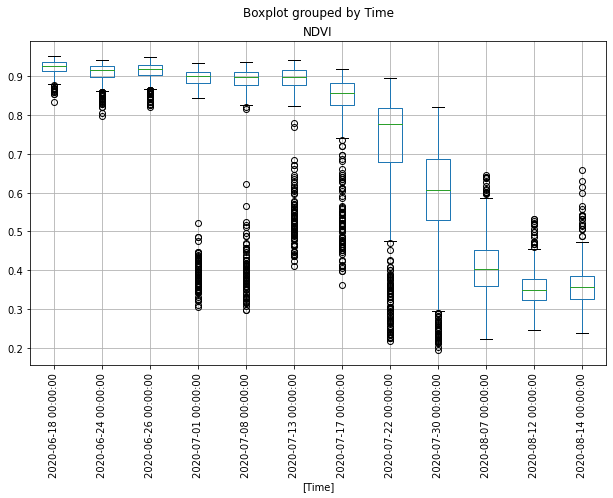

In [72]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','NDVI']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

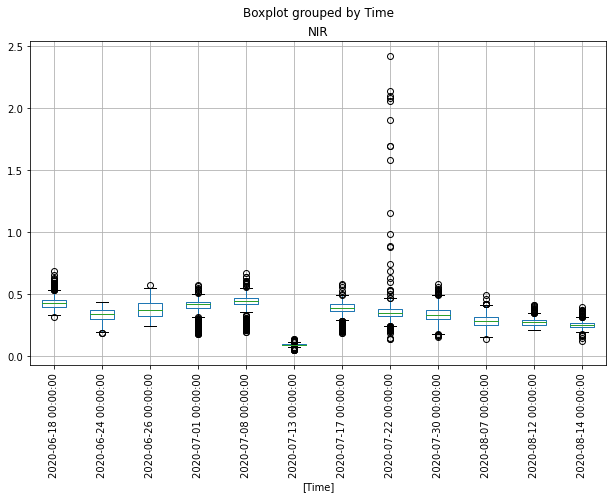

In [73]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','NIR']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

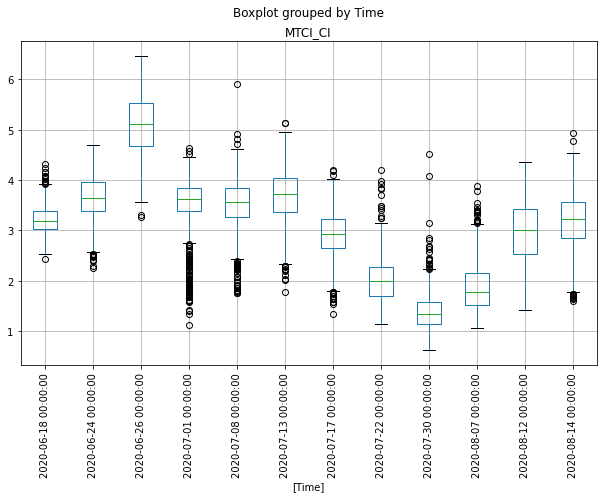

In [74]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','MTCI_CI']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

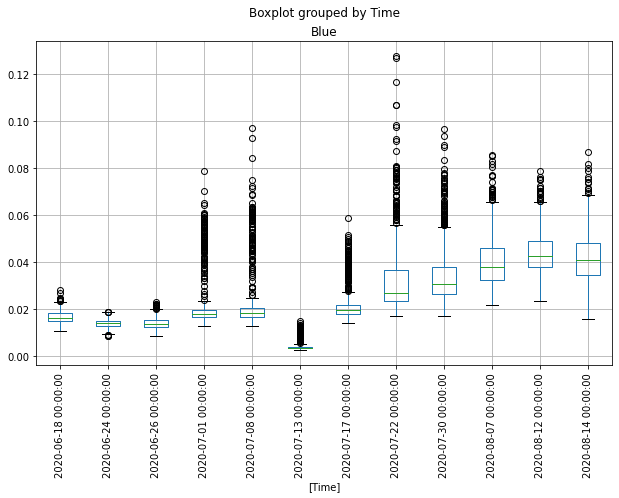

In [75]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','Blue']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

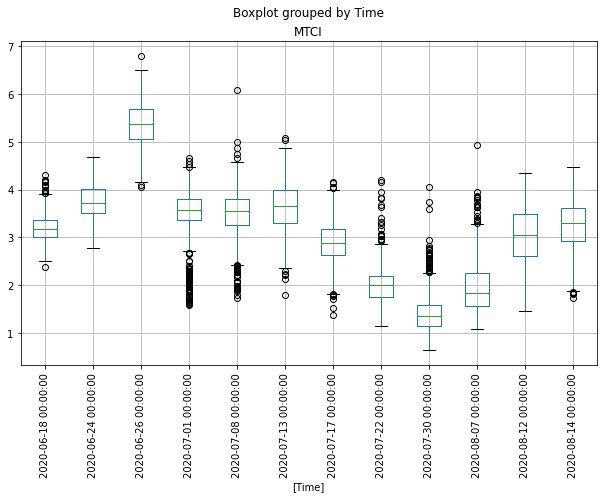

In [76]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','MTCI']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

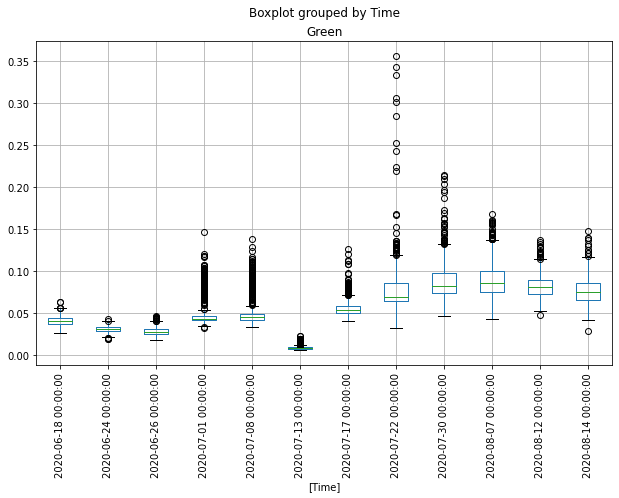

In [77]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','Green']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

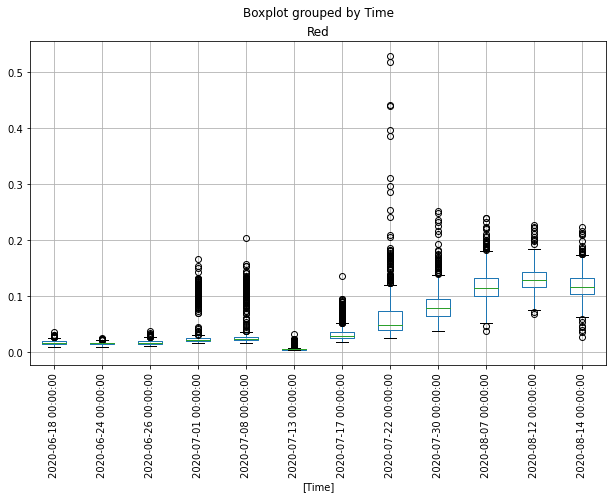

In [78]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','Red']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

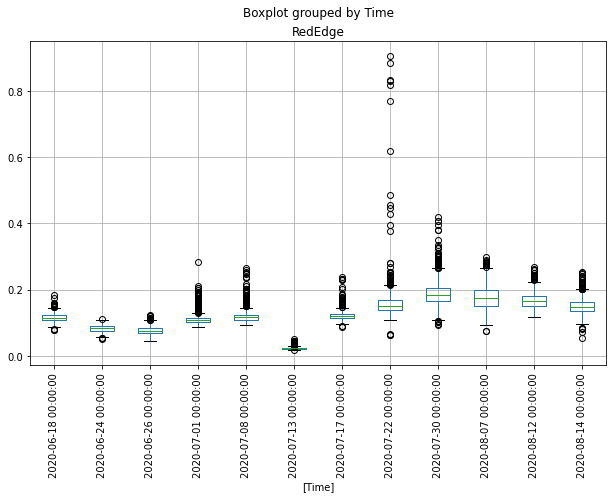

In [79]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','RedEdge']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

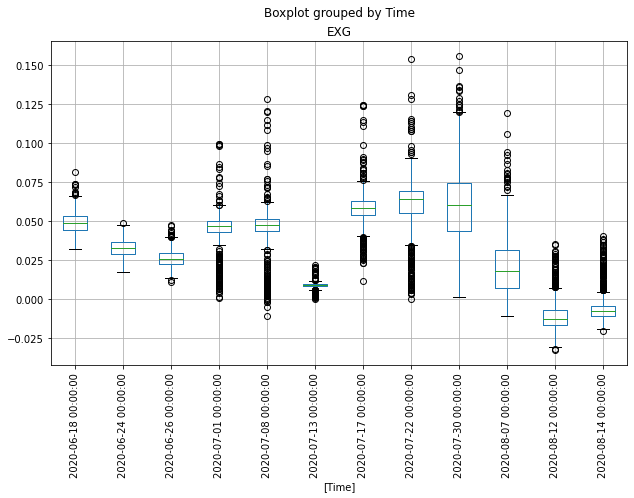

In [80]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','EXG']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

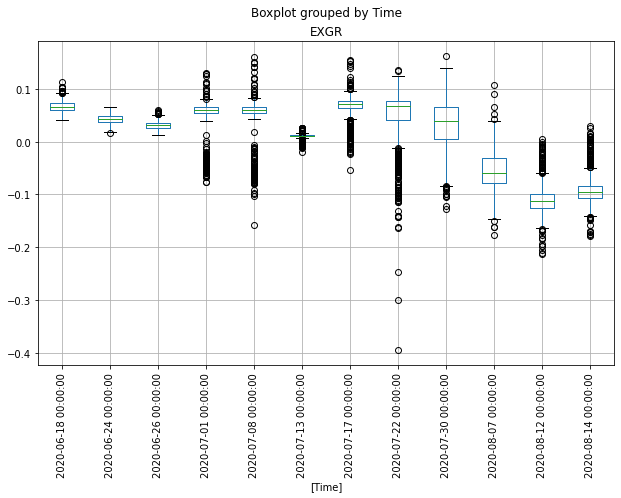

In [81]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','EXGR']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

In [82]:
Df=pd.read_excel('Masbasis_Mica_2020_all_dates_MEDIAN.xlsx')

['Unnamed: 0',
 'Blue',
 'DVI',
 'EVI',
 'EXG',
 'EXGR',
 'GARI',
 'GCI',
 'GDVI',
 'GLI',
 'GNDVI',
 'GOSAVI',
 'GRVI',
 'GSAVI',
 'Green',
 'MNLI',
 'MSAVI2',
 'MSR',
 'MTCI',
 'MTCI_CI',
 'NDRE',
 'NDVI',
 'NIR',
 'NLI',
 'OSAVI',
 'RDVI',
 'Red',
 'RedEdge',
 'SAVI',
 'SCCI',
 'SR',
 'TDVI',
 'TVI',
 'Time',
 'VARI',
 'WDRVI',
 'plot']